# Determine Fly Head Orientation


Goals:
- 90% accuracy in getting a fix
- attempt some CV methods in order to address this fix
- attempt a Neural Network that will address this issues

ToDo:
- could develop something where the best method is run when the fly angle algorithm fails... this would apply outside of the experiment...




TO DO : 6/5/2024
- First:
    - Finalize the method for dealing with template based approach for determining the proper fly orientation
    - For this template approach we will utilize a grayscale mask as the mean template...     
- Second:
    - Utilize DeepLabCut in order to address the issues concerning the fly orientation by developing a large dataset of labels and then using the expected positions from the DeepLabCut model to determine correct orientation.
    
- Third:
    - lightweight Classifer 




In [4]:
# Import Libraries
import sys
import os
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import cv2
import copy
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
# plot_dir = os.path.join(current_dir,'plotting')
sys.path.append(current_dir)
# print(sys.path)
from lib.plotting import polarplot as polarplt# polar plotting module
from lib.parsing import basic_sections as bsc_sec # basic data parsing methods
from lib.parsing.data_range import find_startdata, find_enddata # setting start and end of analysis region 
from lib.parsing.exact_exp_groups import sub_exp_group  # more dataparsing methods
from lib.led_convert import get_LED_angle_in_rad
from lib.plotting.flyviz import single_image_save,two_image_save_Otsu, two_image_save, get_contour_centroid, get_objectmask, get_fill_flymask, get_contour_centroid_adj, get_contour_rotated, contour_rot_matrix, contour_rot_matrix_shift, contour_hrz_matrix
# wrapping libraries:
from scipy import interpolate
from find_fly_angle.find_fly_anglev2 import *


c:\Users\lkrow\vscodeProjects\My-Repos-Warren-Lab\flyplot
Initialized Plotting Package
Initialized Parsing Package


In [5]:
file = '20240423102146_0531'
file_name = "imgs/" + file +".png"
img = cv2.imread(file_name,cv2.IMREAD_GRAYSCALE)
angle, angle_data = find_fly_angle(img, threshold=25)
print(angle_data['flipped'])



(1200, 1200)
Angle Test!
Angle Value: 64.93391018294211
My Angle Value: 309.8678203658842
570
True


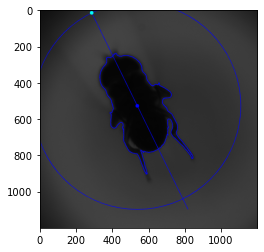

In [4]:
plt.imshow(angle_data['contour_image'])

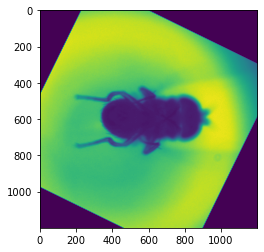

In [5]:
plt.imshow(angle_data['rotated_image'])

In [ ]:
single_image_save('imgs/20240408151332_5837.png',display=True)

In [ ]:
two_image_save_Otsu('imgs/20231121124749_0061.png','imgs/20231121124749_0071.png',"Female at 60s","Female at 71s", display=True)

In [ ]:
two_image_save('imgs/20231121124749_0061.png','imgs/20231121124749_0071.png',"Female at 60s","Female at 71s", display=True)

In [ ]:
two_image_save_Otsu('imgs/20231227131157_0007.png','imgs/20231227125957_0132.png',"Male","Female", display=True)

In [ ]:
two_image_save('imgs/20231227131157_0007.png','imgs/20231227125957_0132.png',"Male","Female",display=True)

Method 1: Comparing to a fixed width with a specified curve based on training data...
- Point by point difference using a fixed width...
- Look for the max on both ends

OTHER:
- 


METHOD: 10 up 10 down for a fly... develop algorithm 
- create the overlayed traces

1. Cut out section of the back that is large
2. interpoate edge of contour and get the curve of the back that is series of point
3. everytime new flip cut out smaller region aroud the contour for the centerline
4. Then we compute the cross correlation between the base case and the two test cases...
    - will then get the maximal product...

    - segments in the front will not fit the shape..


CROSS CORRELATION.... DOt product between points but need to project...

Step 1: Access contour for an image 

height 1200
Angle Test!
Angle Value: -150.81302529857444
My Angle Value: 238.3739494028511
(18, 272)
height 1200
Angle Test!
Angle Value: -150.89635672646585
My Angle Value: 238.2072865470683
mask radius 570
YO
<class 'numpy.ndarray'> (2, 3)
-150.89635672646585 240.89635672646585 330.89635672646585
float64 int32
(2060, 2) (2060, 1)
(2, 3) (2, 2) (2060, 2)
Unrotated
[[  95.60082458 -196.28164035]]

coords
(600.0, 463.2608569282518) (600.0, 520.4071437902093)

Applied
[[558 324]]
(19, 273) old body axis
(2, 2) (1, 2) [[-444]
 [-247]]
[[ 31]
 [787]] new body axis 0
(906, 767) old body axis 1
(2, 2) (1, 2) [[443]
 [247]]
[[894]
 [253]] new body axis 1
ANGLE: -2.6336382541407217 -150.89635672646585
Angle Test!
Angle Value: 90.0058695395041
My Angle Value: 0.011739079008179942
height 1200
Angle Test!
Angle Value: -150.89635672646585
My Angle Value: 238.2072865470683
mask radius 570
<class 'numpy.ndarray'> (2, 3)
-150.89635672646585 240.89635672646585 330.89635672646585
float64 int32
(2060, 2

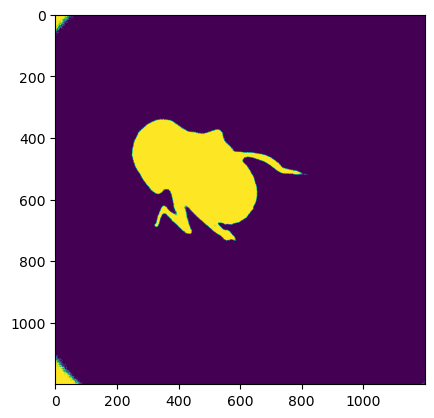

In [6]:
file ="20240415120905_0121"
file_name = "imgs/" + file +".png"
fly_mask, max_contour,centroid, body_axis_pt_0,body_axis_pt_1 = get_contour_centroid(file_name)
fly_mask_adj, max_contour_adj,centroid_adj, body_axis_pt_0_adj,body_axis_pt_1_adj,unrot_vec  = contour_rot_matrix(file_name)
fly_mask_adj2, max_contour_adj2,centroid_adj2, body_axis_pt_0_adj2,body_axis_pt_1_adj2,unrot_vec2 = contour_rot_matrix_shift(file_name)

fly_mask_orig, fly_mask_hrz,max_contour_hrz,centroid_hrz, body_axis_pt_0_hrz,body_axis_pt_1_hrz, angle_og, angle_rot = contour_hrz_matrix(file_name)

print(max_contour, centroid, body_axis_pt_0, body_axis_pt_1)
plt.imshow(fly_mask)

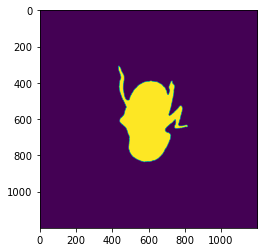

In [3]:
plt.imshow(fly_mask_hrz)

In [5]:
print(body_axis_pt_0)

(1162, 1329)


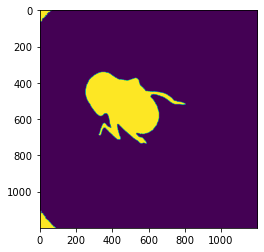

In [10]:
plt.imshow(fly_mask_adj)

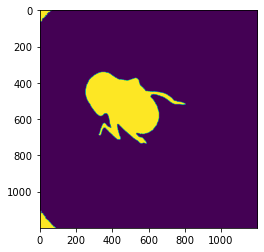

In [8]:
plt.imshow(fly_mask_adj)

In [3]:
unrot_vec

array([[[767, 381]],

       [[766, 381]],

       [[766, 382]],

       ...,

       [[769, 383]],

       [[769, 382]],

       [[768, 382]]])

In [3]:
max_contour

array([[[-130, -408]],

       [[-130, -407]],

       [[-130, -406]],

       ...,

       [[-127, -408]],

       [[-128, -408]],

       [[-129, -408]]], dtype=int32)

#### Step 2: Rotate the image so it is at least centered up down on the y axis

In [ ]:
## Get the Angle of Rotation


In [9]:
x1 = body_axis_pt_0[0]
x2 =body_axis_pt_1[0]
y1 = body_axis_pt_0[1]
y2 =body_axis_pt_1[1]
m = (y2 - y1)/(x2-x1)
print(m)
# y = mx+b
b = y1 - m*x1
print(b)

x = np.linspace(x1,x2+1, num = len(max_contour))
y = m*x + b
print(y)
points = []
for i in range(len(x)):
    points.append((int(x[i]),int(y[i])))
print(points)

0.5579302587176603
261.9572553430821
[272.         272.22499227 272.44998453 ... 768.10794573 768.33293799
 768.55793026]
[(18, 272), (18, 272), (18, 272), (19, 272), (19, 272), (20, 273), (20, 273), (20, 273), (21, 273), (21, 274), (22, 274), (22, 274), (22, 274), (23, 274), (23, 275), (24, 275), (24, 275), (24, 275), (25, 276), (25, 276), (26, 276), (26, 276), (26, 276), (27, 277), (27, 277), (28, 277), (28, 277), (28, 278), (29, 278), (29, 278), (30, 278), (30, 278), (30, 279), (31, 279), (31, 279), (32, 279), (32, 280), (32, 280), (33, 280), (33, 280), (34, 280), (34, 281), (34, 281), (35, 281), (35, 281), (36, 282), (36, 282), (36, 282), (37, 282), (37, 283), (38, 283), (38, 283), (38, 283), (39, 283), (39, 284), (40, 284), (40, 284), (40, 284), (41, 285), (41, 285), (42, 285), (42, 285), (43, 285), (43, 286), (43, 286), (44, 286), (44, 286), (45, 287), (45, 287), (45, 287), (46, 287), (46, 287), (47, 288), (47, 288), (47, 288), (48, 288), (48, 289), (49, 289), (49, 289), (49, 289

In [17]:
len(np.ones((max_contour.shape[0],1)))

3062

In [18]:
print(x2,x1)
print(y2,y1)

178 1162
149 1329


In [19]:
type(body_axis_pt_0)

tuple

In [6]:
print(max_contour.shape, len(max_contour))
print(len(max_contour.reshape(-1,2)))
a = max_contour.reshape(-1,2)
print(a.shape)
print(np.ones((a.shape[0],2)).shape)

(2984, 1, 2) 2984
2984
(2984, 2)
(2984, 2)


In [10]:
import copy
intersect_orig = []
for p in range(len(points)):
    for v in range(len(max_contour)):
        # print(points[p], tuple(max_contour[v][0]))
        if points[p] == tuple(max_contour[v][0]):
            print("True")
            intersect_orig.append((p,v))
print(intersect_orig)
intersect = copy.deepcopy(intersect_orig)
for val in range(1, len(intersect_orig)):
    if np.abs(intersect_orig[val][0] - intersect_orig[val-1][0]) < 20:
        # if the difference is less than 20 then drop the second one
        intersect.remove(intersect_orig[val])
        print(intersect, intersect_orig)
print(intersect)

True
True
True
True
[(675, 218), (676, 218), (1745, 1628), (1746, 1628)]
[(675, 218), (1745, 1628), (1746, 1628)] [(675, 218), (676, 218), (1745, 1628), (1746, 1628)]
[(675, 218), (1745, 1628)] [(675, 218), (676, 218), (1745, 1628), (1746, 1628)]
[(675, 218), (1745, 1628)]


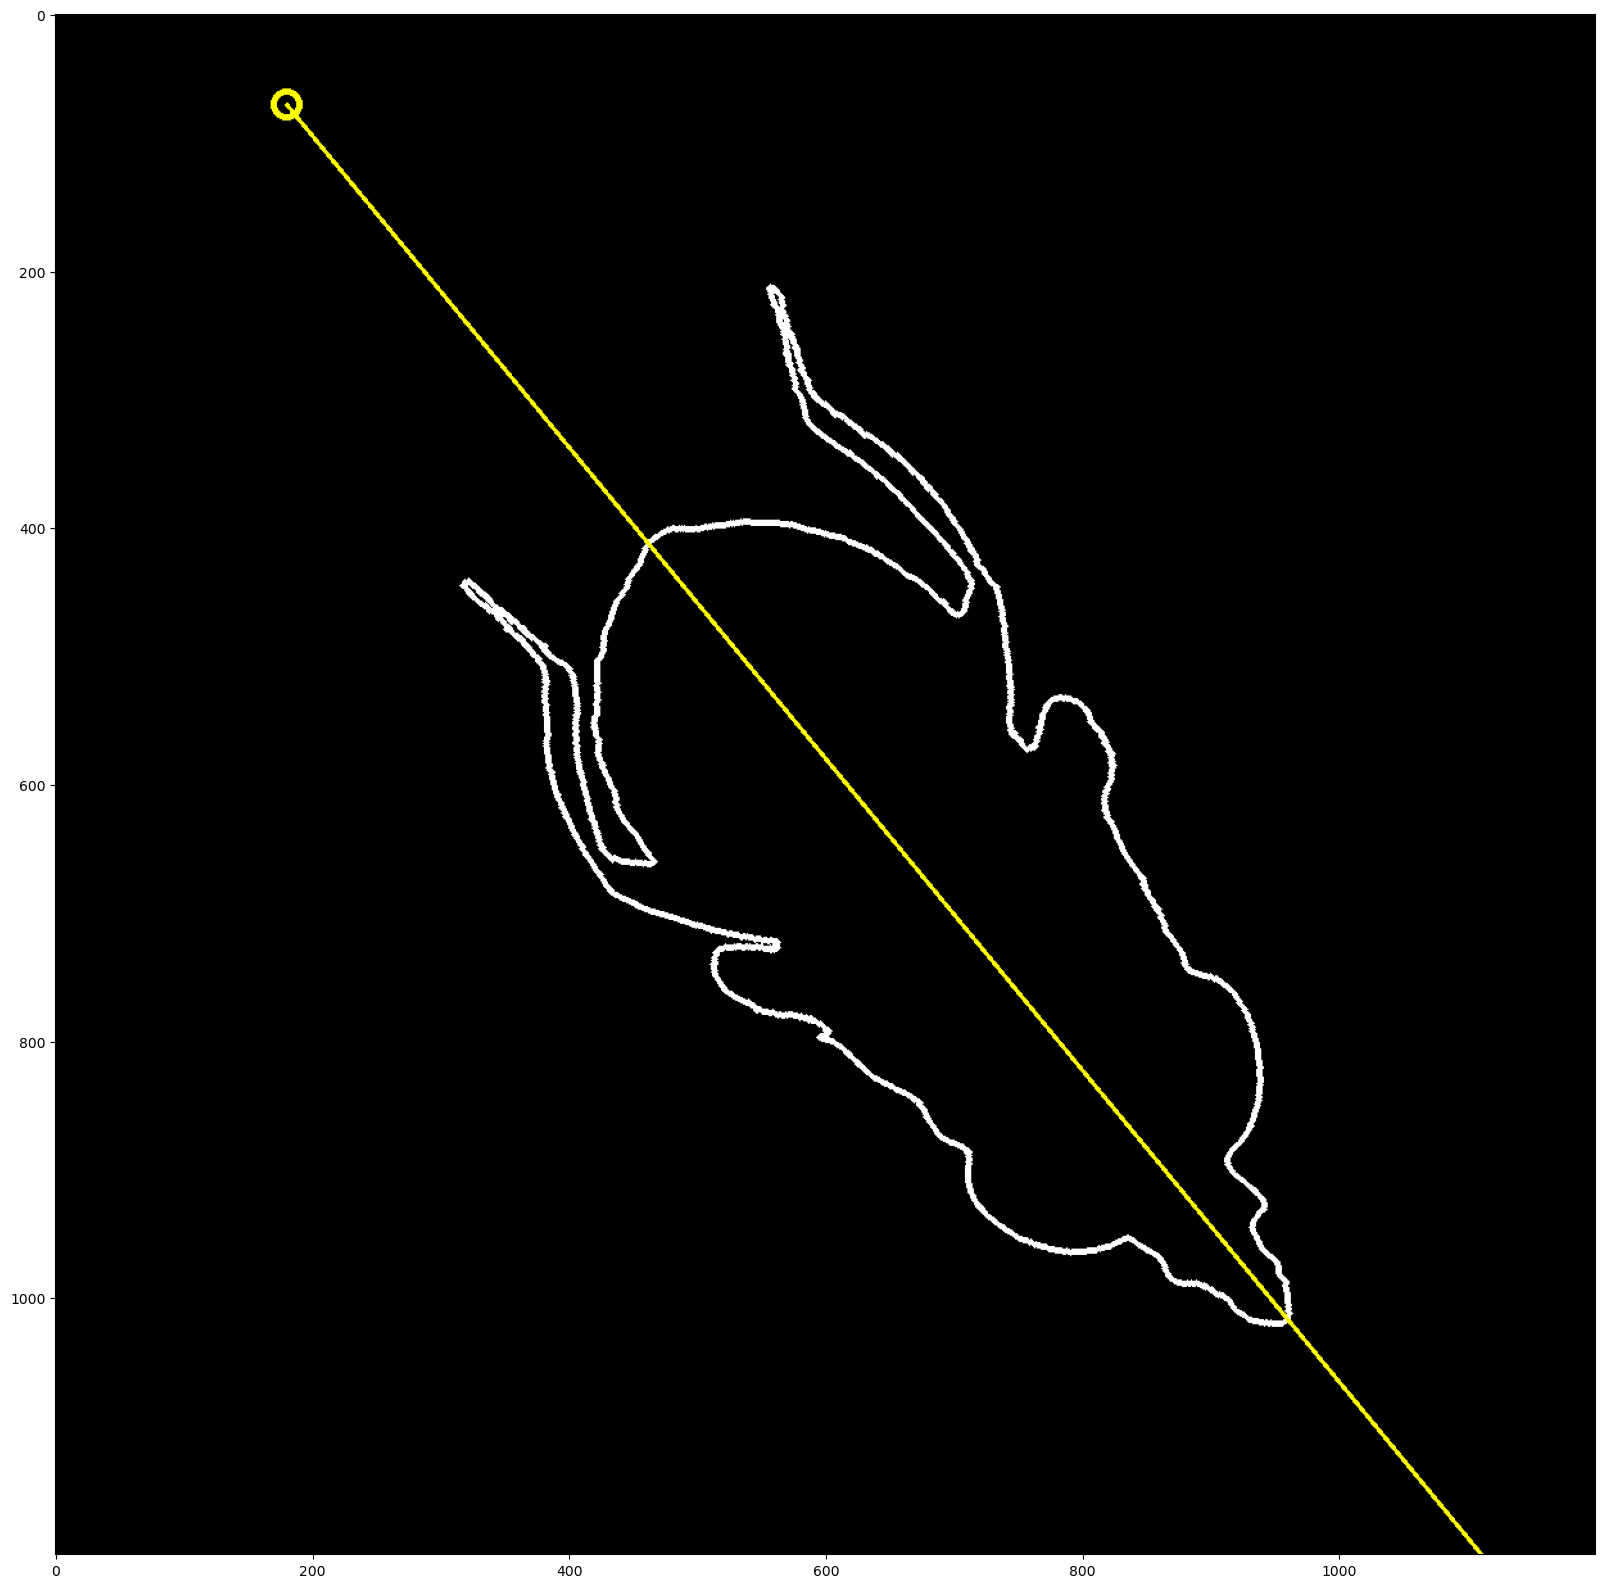

In [128]:
plt.figure(figsize=(20,20))
mask_fly = get_objectmask(fly_mask,max_contour)

cv2.circle(mask_fly,(body_axis_pt_0),10, color = (255,255,0),thickness =3)
cv2.circle(mask_fly,(body_axis_pt_1),10, color = (255,255,0),thickness =3)
cv2.line(mask_fly,body_axis_pt_0,body_axis_pt_1,color = (255,255,0), thickness = 2)
# for p in points:
#     cv2.circle(mask_fly,(p),10, color = (255,255,255),thickness =1)

# cv2.circle(mask_fly,(max_contour[intersect[0][1]][0]),10, color = (0,255,255),thickness =3 )

# cv2.circle(mask_fly,(max_contour[intersect[1][1]][0]),10, color = (0,255,255),thickness =3 )
plt.imshow(mask_fly)

In [6]:
tuple(body_axis_pt_0_adj.reshape(1,2)[0])

(1425, 738)

In [4]:
tuple(body_axis_pt_1_adj.reshape(1,2)[0])

(-83, 738)

## Method 2a: Working Version - Analysis of Image
- This method allows for an analysis of the image and defining various lines for the purpose of visualizing the differences in the fly shape
- This method may be used in the future in constructing lighter weight detectors....

What is being performed:
- Generates the midline
- Creates buffer line
- and parallel lines on the buffer with respect to the midline
- finds the intersection points of the parallel lines on the buffer to the contour...
- Finds the range of points in the contour
- Has an undefined line representing centerline that is in line with the y-axis
- able to access the contours and ext.

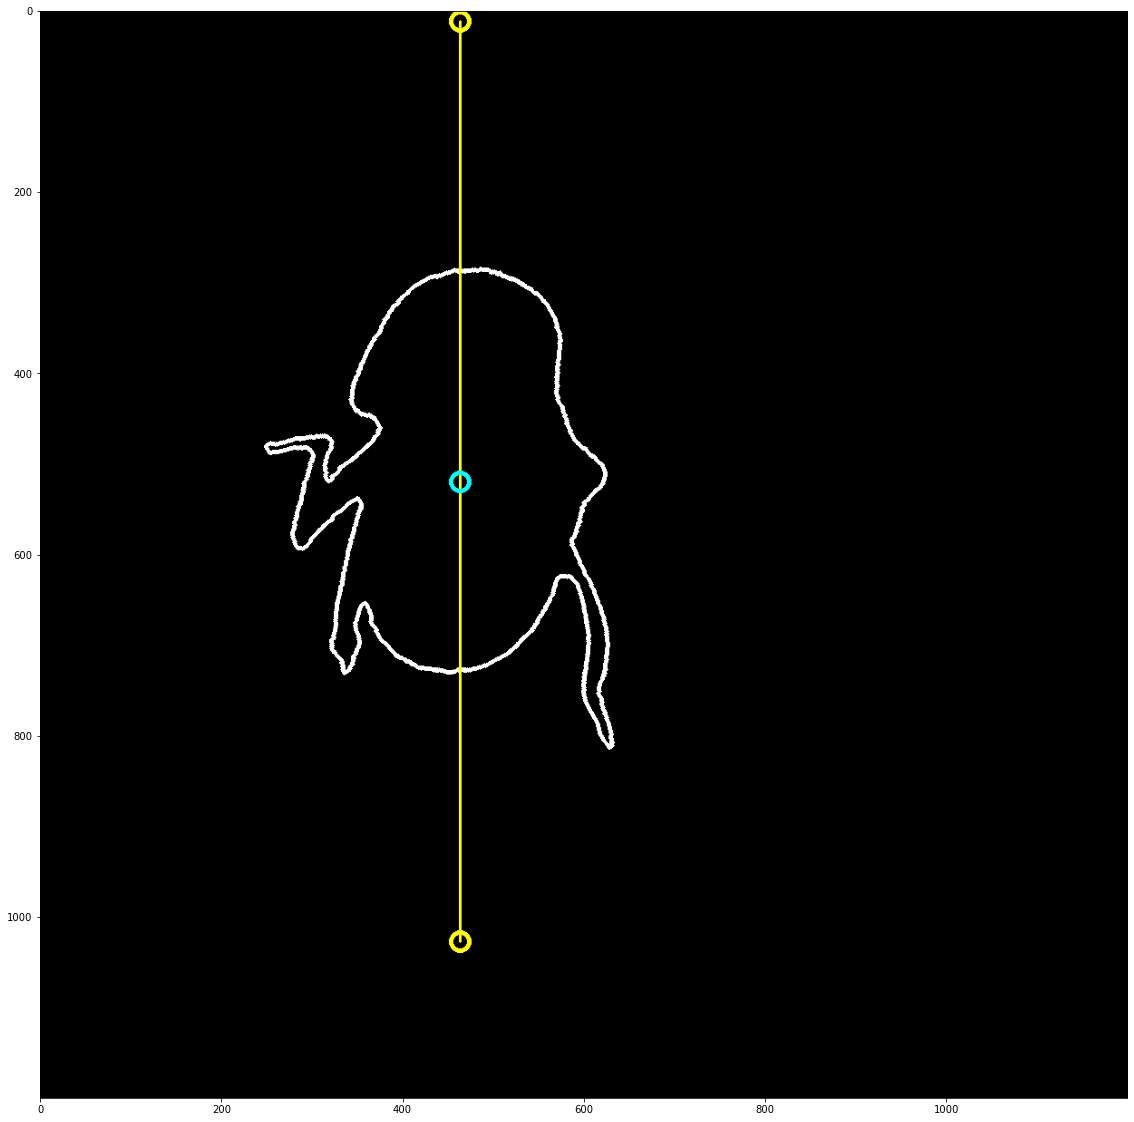

In [6]:
plt.figure(figsize=(20,20))
mask_fly = get_objectmask(fly_mask_adj,unrot_vec)

cv2.circle(mask_fly,body_axis_pt_0_adj,10, color = (255,255,0),thickness =3)
cv2.circle(mask_fly,body_axis_pt_1_adj,10, color = (255,255,0),thickness =3)
cv2.line(mask_fly,body_axis_pt_0_adj,body_axis_pt_1_adj,color = (255,255,0), thickness = 2)
# for p in points:
#     cv2.circle(mask_fly,(p),10, color = (255,255,255),thickness =1)

# cv2.circle(mask_fly,(max_contour[intersect[0][1]]),10, color = (0,255,255),thickness =3 )

# cv2.circle(mask_fly,(max_contour[intersect[1][1]][0]),10, color = (0,255,255),thickness =3 )
cv2.circle(mask_fly,centroid_adj,10,color = (0,255,255),thickness=3)
plt.imshow(mask_fly)

### Draw the Buffer Line

- [`X`] Draw a line of fixed width X across the centroid 

- [   ] Using this line also draw lines that are parallel to the centerline up and down

- [   ] Then plot the points at which it intersects on the fly

- [   ] After this point We will be able to get contour sections from top and bottom. 

- [   ] These will then be plotted in two different orientations.

- [   ] In this method after we have plotted in two different orientations then the user will deciede which is top and which is bottom. In the future we will utilize.


#### Checked if the centerline is undefined

In [11]:
x1 = body_axis_pt_0_adj[0]
x2 = body_axis_pt_1_adj[0]
y1 = body_axis_pt_0_adj[1]
y2 =body_axis_pt_1_adj[1]

print(x1,x2)
if (x2-x1 ) == 0:
    print("undefined")
elif (y2-y1) == 0 :
    print(f"Horizontal line at y = {y1}")
else:
    print(x2-x1)
    print(y2-y1)
    m = (y2 - y1)/(x2-x1)
    print(m)
    print(f"centroid {centroid_adj}")

463 463
undefined


#### 1. Draw Line of Fixed width across centroid

Fixed Width will start with 100px


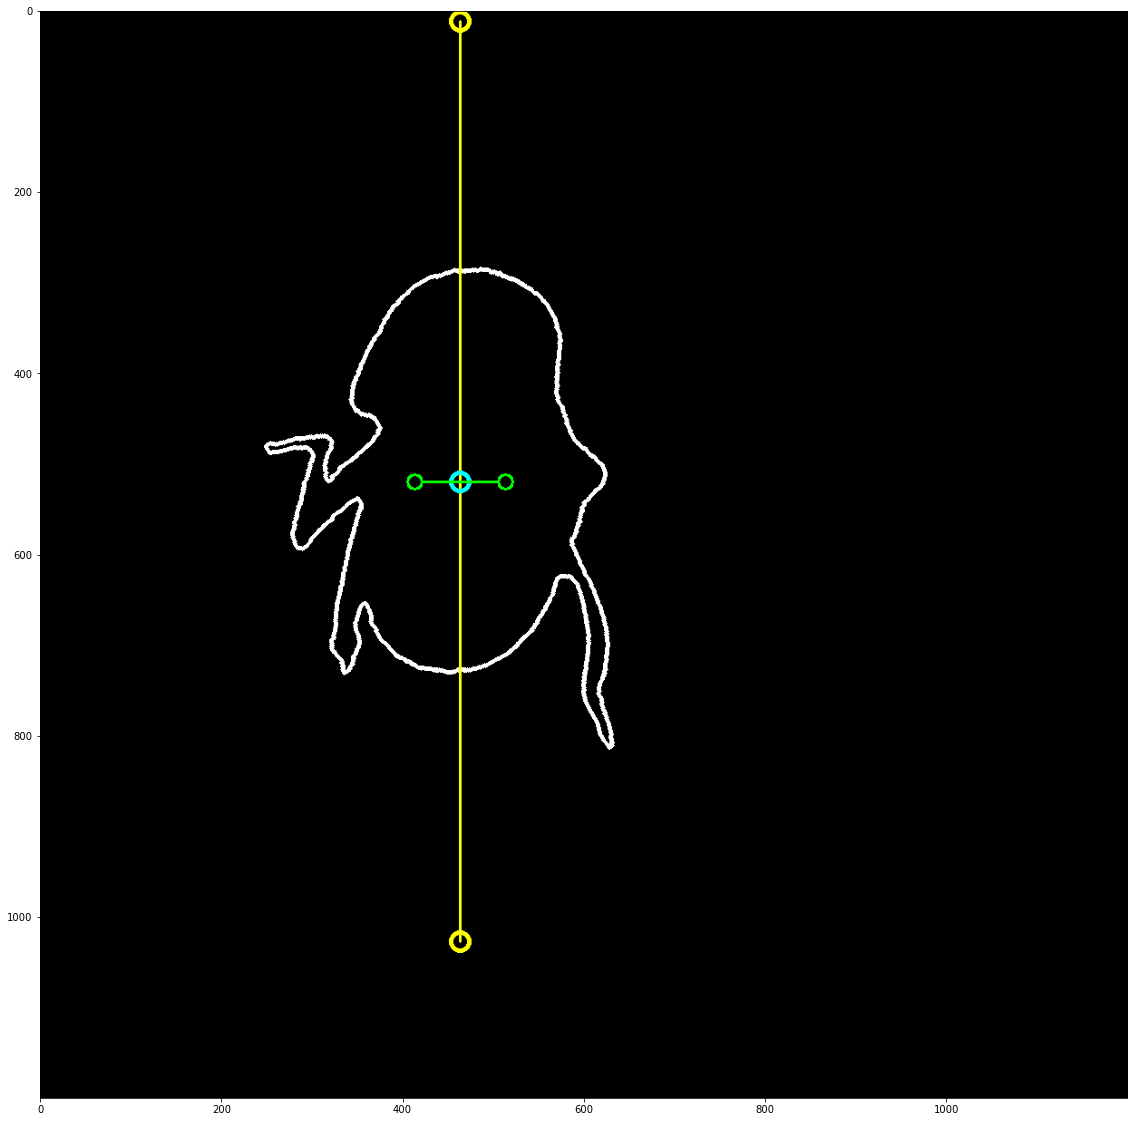

In [12]:
plt.figure(figsize=(20,20))
mask_fly1 = copy.deepcopy(mask_fly)
## Point 1: 50 points to right
p1 = (centroid_adj[0] + 50, centroid_adj[1])
## Point 2: 50 points to left
p2 = (centroid_adj[0] - 50,centroid_adj[1])
cv2.circle(mask_fly1,p1,8, color = (0,255,0),thickness =2)
cv2.circle(mask_fly1,p2,8, color = (0,255,0),thickness =2)
# cv2.circle(mask_fly1,(800,500),8,color = (0,255,255),thickness =2) # test
cv2.line(mask_fly1,(p1[0]-8,p1[1]),(p2[0]+8,p2[1]),color = (0,255,0), thickness = 2)
plt.imshow(mask_fly1)

#### 2. Draw Parallel Lines From p1 and p2 until intersection with top and bottom of object contour

In [13]:
## 
def parallel_lines(point1,point2,centroid,body_axis_pt_0,body_axis_pt_1,max_contour,width = 50):
    """
    Using two points and centroid determine two lines that are parallel 
    to the centroid's centerline. Returns a tuple of two arrays describing the parallel
    lines.

    Parameters:
    -----------
    point1 : tuple
        describes the x,y pixel location of a point located 50px to right of centroid
    point2 : tuple
        describes the x,y pixel location of a point located 50px to the left of centroid
    
    Returns:
    --------
    par1 : array
        array of points for parallel line interesecting point 1
    par2 : array
        array of points for parallel line intersecting point 2
    """
    # get the range of points needed
    len_list = len(max_contour)

    # point 1: left of centroid
    ## y1 and y2 for point 1 ... X width from body_axis_pt_0
    print(body_axis_pt_0[0])
    point1_y1 = body_axis_pt_0[1] 
    point1_y2 = body_axis_pt_1[1] 
    
    # Point 2: right of centroid 
    ## y1 and y2 for point 2 ... X width to the right of the centroid
    point2_y1 = body_axis_pt_0[1]
    point2_y2 = body_axis_pt_1[1] 

    # Point 1 and Point 2 - y values
    ## X values for these points will remain the same
    point1_x_u = np.full(1200,p1[0])
    point1_x_d = np.full(1200,p1[0])
    point2_x_u= np.full(1200,p2[0])
    point2_x_d= np.full(1200,p2[0])

    # get the array for point 1
    
    yvalu1 = np.linspace(min([point1_y1,point1_y2,0]),centroid[1]+1,num = 1200)
    up1 = np.column_stack((point1_x_u,yvalu1)).astype(int)
    yvald1 = np.linspace(centroid[1],max(point1_y1,point1_y2)+1,num = 1200)
    down1 = np.column_stack((point1_x_d,yvald1)).astype(int)
    # arr_1 = np.concatenate(a1,b1)
    # get the array for point 2
    yvalu2 = np.linspace(min([point2_y1,point2_y2,0]),centroid[1]+1,num = 1200)
    up2 = np.column_stack((point2_x_u,yvalu2)).astype(int)
    yvald2 = np.linspace(centroid[1],max(point2_y1,point2_y2)+1,num =1200)
    down2= np.column_stack((point2_x_d,yvald2)).astype(int)
    # arr_2 = np.concatenate(a2,b2)

    return  yvalu1, up1,down1,up2,down2

def intersect_up(arr_min,max_contour):
    """
    Takes array ordered from min y value

    Returns:
    -------
    inter_up : list
        list of the point or points where the max contour intersections with the array...
    """
    ## Starts from end of array aka centroid and goes in looking at intersections...
    ### This is to avoid any initial intersections at the start..
    inter_up = [ ]
    ## Reverse the array
    arr_min = arr_min[::-1] # so will go from the centroid now until the end
    for p in range(len(arr_min)):
        for v in range(len(max_contour)):
            # print(arr_min[p], tuple(max_contour[v][0])[1])
            # print(tuple(arr_min[p]),tuple(max_contour[v][0]))

            if tuple(arr_min[p]) == tuple(max_contour[v][0]):
                # print("True")
                inter_up.append((p,v))

    # for p in range(len(points)):
    #     for v in range(len(max_contour)):
    #         # print(points[p], tuple(max_contour[v][0]))
    #         if points[p] == tuple(max_contour[v][0]):
    #             print("True")
    #             intersect_orig.append((p,v))
    # print(inter_up)
    intersect = copy.deepcopy(inter_up)
    for val in range(1, len(inter_up)):
        if np.abs(inter_up[val][1] - inter_up[val-1][1]) < 20:
            # if the difference is less than 20 then drop the second one
            intersect.remove(inter_up[val])
            print(intersect, inter_up)
    # print(intersect)
    print("point from array")
    print(arr_min[intersect[0][0]])
    print("point from contour:")
    print(max_contour[0][0][1])
    ## Return the point to plot from array...should be same regardless just need the coordinates...
    return arr_min[intersect[0][0]]
    ## check on if captured two intersections at same location..
    ### gets rid of second one
def intersect_down(arr_max, max_contour):
    """
    Takes array ordered from centroid to max...

    Returns:
    -------
    inter_up : list
        list of the point or points where the max contour intersections with the array...
    """
    ## Starts from end of array aka centroid and goes in looking at intersections...
    ### This is to avoid any initial intersections at the start..
    inter_up = [ ]
    ## Reverse the array
    for p in range(len(arr_max)):
        for v in range(len(max_contour)):
            # print(arr_min[p], tuple(max_contour[v][0])[1])
            # print(tuple(arr_min[p]),tuple(max_contour[v][0]))

            if tuple(arr_max[p]) == tuple(max_contour[v][0]):
                # print("True")
                inter_up.append((p,v))

    # for p in range(len(points)):
    #     for v in range(len(max_contour)):
    #         # print(points[p], tuple(max_contour[v][0]))
    #         if points[p] == tuple(max_contour[v][0]):
    #             print("True")
    #             intersect_orig.append((p,v))
    # print(inter_up)
    intersect = copy.deepcopy(inter_up)
    for val in range(1, len(inter_up)):
        if np.abs(inter_up[val][1] - inter_up[val-1][1]) < 20:
            # if the difference is less than 20 then drop the second one
            intersect.remove(inter_up[val])
            print(intersect, inter_up)
    # print(intersect)
    print("point from array")
    print(arr_max[intersect[0][0]])
    print("point from contour:")
    print(max_contour[0][0][1])
    ## Return the point to plot from array...should be same regardless just need the coordinates...
    return arr_max[intersect[0][0]]
     

def find_intersection(arr1,arr2,maxcontour):
    """
    With two arrays of points compare with the points of the contour to detemrine the locations of intersection

    First find intersections going in opposite direction...

    Then find intersections going

    """
    intersect_up = []


    intersect_down = []
    pass
yvalu1, up1,down1,up2,down2 = parallel_lines(p1,p2,centroid_adj,body_axis_pt_0_adj,body_axis_pt_1_adj,unrot_vec)
# print(up1[::-1])
# print(up1)
inter_up_pnt1 = intersect_up(up1,unrot_vec)
inter_down_pnt1 = intersect_down(down1, unrot_vec)

# print(up2)
inter_up_pnt2 = intersect_up(up2,unrot_vec)

inter_down_pnt2 = intersect_down(down2,unrot_vec)

# xvals = [unrot_vec[i][0][0] for i in range(len(unrot_vec))]
# print(xvals)

# a = np.where(np.array(xvals) == 624)



    
    


463
[(521, 51), (523, 52), (524, 52)] [(521, 51), (522, 51), (523, 52), (524, 52)]
[(521, 51), (524, 52)] [(521, 51), (522, 51), (523, 52), (524, 52)]
[(521, 51)] [(521, 51), (522, 51), (523, 52), (524, 52)]
point from array
[513 294]
point from contour:
324
[(451, 1238), (453, 1238)] [(451, 1238), (452, 1238), (453, 1238)]
[(451, 1238)] [(451, 1238), (452, 1238), (453, 1238)]
point from array
[513 711]
point from contour:
324
[(498, 156)] [(498, 156), (499, 156)]
point from array
[413 304]
point from contour:
324
[(477, 1139), (479, 1139)] [(477, 1139), (478, 1139), (479, 1139)]
[(477, 1139)] [(477, 1139), (478, 1139), (479, 1139)]
point from array
[413 722]
point from contour:
324


In [9]:
# take the 30 contour points to the lefts and right of the two intersections and plot
# adj_intersect = [(intersect[0][1]+50,intersect[0][1]-50),(intersect[1][1]+50,intersect[1][1]-50)]
print(adj_intersect)

NameError: name 'intersect' is not defined

In [69]:
max_contour_adj[0][0]

array([-116, -454], dtype=int32)

0

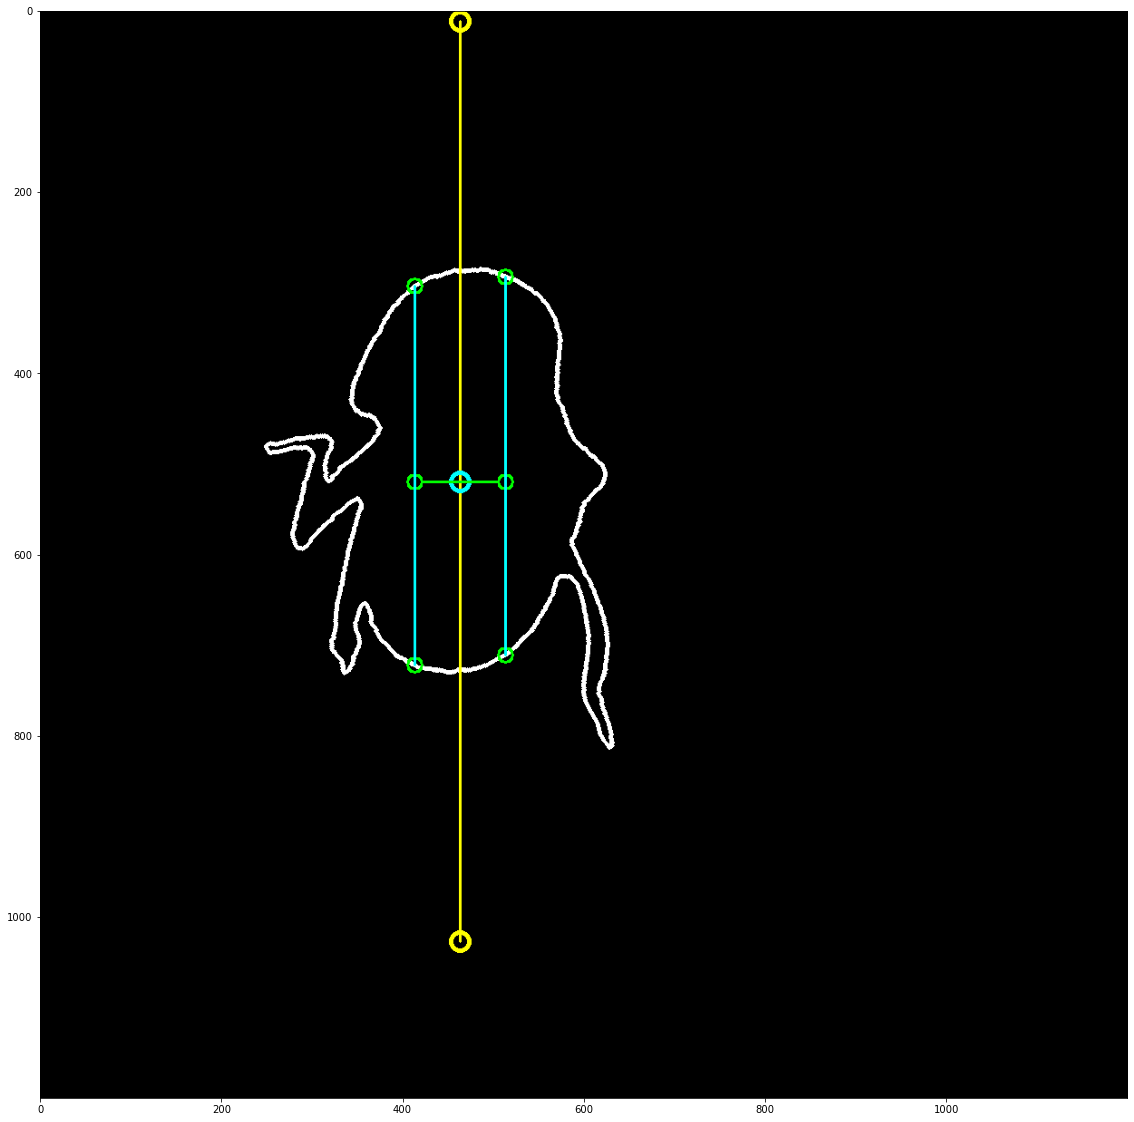

In [14]:
plt.figure(figsize=(20,20))
mask_fly2 = copy.deepcopy(mask_fly1)
# Point 1 lines
cv2.circle(mask_fly2,tuple(inter_up_pnt1),8, color = (0,255,0),thickness =2)
cv2.circle(mask_fly2,tuple(inter_down_pnt1),8, color = (0,255,0),thickness =2)
cv2.line(mask_fly2,tuple(inter_up_pnt1),tuple(inter_down_pnt1),color = (0,255,255), thickness = 2)
# Point 2 Lines
cv2.circle(mask_fly2,tuple(inter_up_pnt2),8, color = (0,255,0),thickness =2)
cv2.circle(mask_fly2,tuple(inter_down_pnt2),8, color = (0,255,0),thickness =2)
# cv2.circle(mask_fly2,unrot_vec[490][0],8, color = (0,255,0),thickness =2)
# cv2.circle(mask_fly2,unrot_vec[2146][0],8, color = (0,255,0),thickness =2)
cv2.line(mask_fly2,inter_up_pnt2,tuple(inter_down_pnt2),color = (0,255,255), thickness = 2)

plt.imshow(mask_fly2)




In [8]:
li = ["y","n","y","y","y","n","n"]
li.count("y")

4

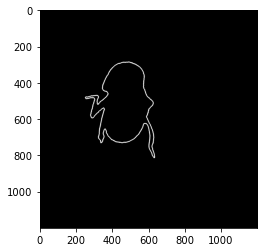

In [15]:
mask_fly = get_objectmask(fly_mask_adj,unrot_vec)
plt.imshow(mask_fly)

# Method 3: Mean Mask Method
- First label images front and back
Then what we will do and then we can see if they face the front
- First orient all the images so they face the front...
- Second we will take the mean mask and ensure that it is oriented in the center so all masks need to be centered in the image
-

Will then use the average/mean mask as a template. With this template we should be able to compare to the original images and then determine the orientation.

Then will examine effectivness on test dataset..


### Generate a test image of fly flipped horizontally
The reason for doing this is to ensure that the fly is centered within the image

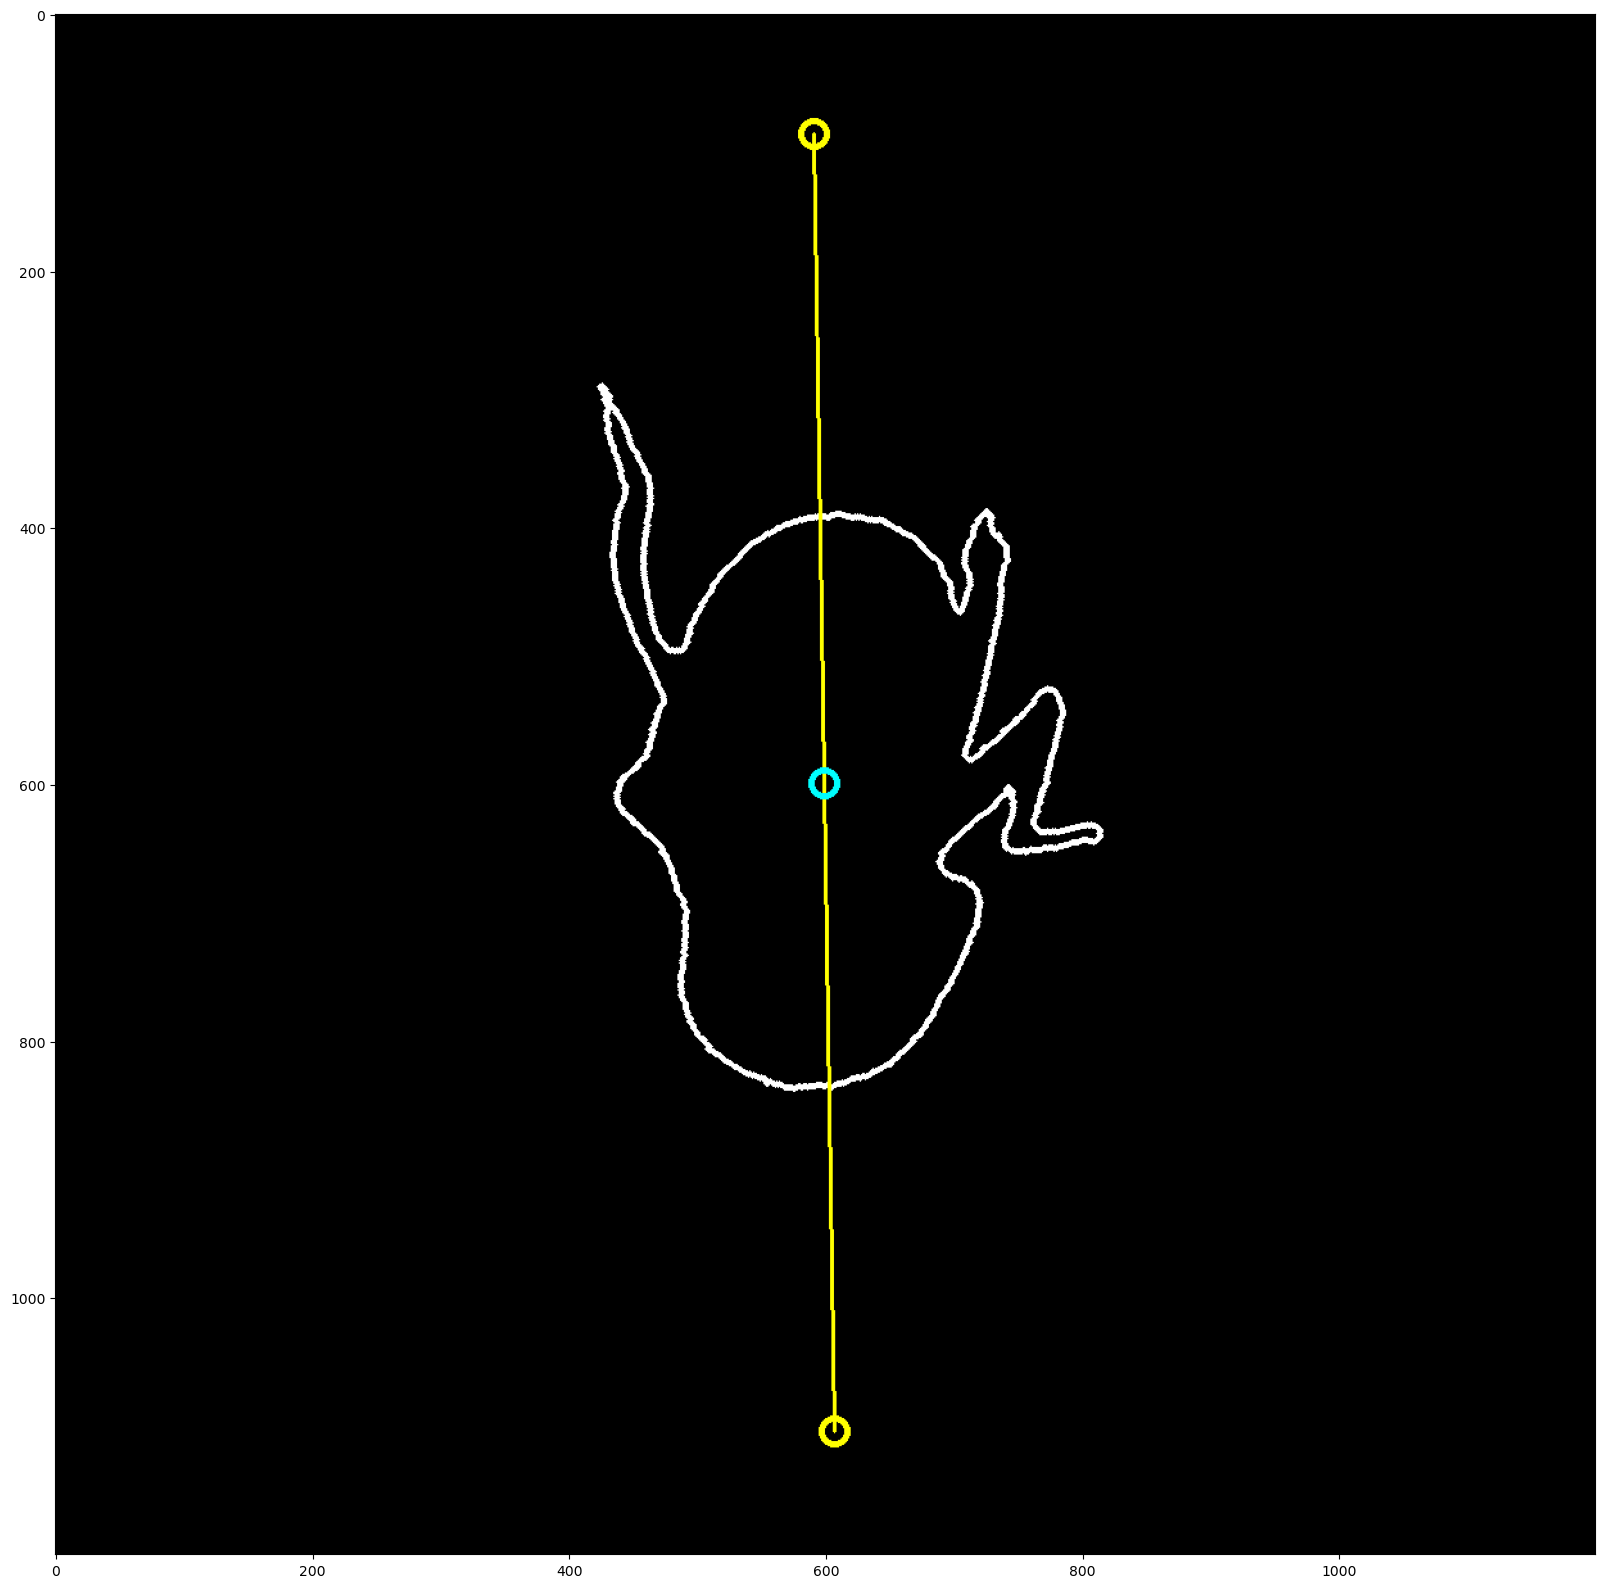

In [7]:

plt.figure(figsize=(20,20))
mask_fly = get_objectmask(fly_mask_hrz,max_contour_hrz)

cv2.circle(mask_fly,body_axis_pt_0_hrz,10, color = (255,255,0),thickness =3)
cv2.circle(mask_fly,body_axis_pt_1_hrz,10, color = (255,255,0),thickness =3)
cv2.line(mask_fly,body_axis_pt_0_hrz,body_axis_pt_1_hrz,color = (255,255,0), thickness = 2)
# for p in points:
#     cv2.circle(mask_fly,(p),10, color = (255,255,255),thickness =1)

# cv2.circle(mask_fly,(max_contour[intersect[0][1]]),10, color = (0,255,255),thickness =3 )

# cv2.circle(mask_fly,(max_contour[intersect[1][1]][0]),10, color = (0,255,255),thickness =3 )
cv2.circle(mask_fly,centroid_hrz,10,color = (0,255,255),thickness=3)
plt.imshow(mask_fly)

### Method for generating the labels for the images

['C:/Users/lkrow/Desktop/20240502125110\\20240502125110_1934.png', 'C:/Users/lkrow/Desktop/20240502125110\\20240502125110_2132.png', 'C:/Users/lkrow/Desktop/20240502125110\\20240502125110_3911.png', 'C:/Users/lkrow/Desktop/20240502125110\\20240502125110_2618.png', 'C:/Users/lkrow/Desktop/20240502125110\\20240502125110_1926.png', 'C:/Users/lkrow/Desktop/20240502125110\\20240502125110_4044.png', 'C:/Users/lkrow/Desktop/20240502125110\\20240502125110_7601.png', 'C:/Users/lkrow/Desktop/20240502125110\\20240502125110_6208.png', 'C:/Users/lkrow/Desktop/20240502125110\\20240502125110_8711.png', 'C:/Users/lkrow/Desktop/20240502125110\\20240502125110_4366.png', 'C:/Users/lkrow/Desktop/20240502125110\\20240502125110_2160.png', 'C:/Users/lkrow/Desktop/20240502125110\\20240502125110_0534.png', 'C:/Users/lkrow/Desktop/20240502125110\\20240502125110_6380.png', 'C:/Users/lkrow/Desktop/20240502125110\\20240502125110_8516.png', 'C:/Users/lkrow/Desktop/20240502125110\\20240502125110_6802.png', 'C:/Users

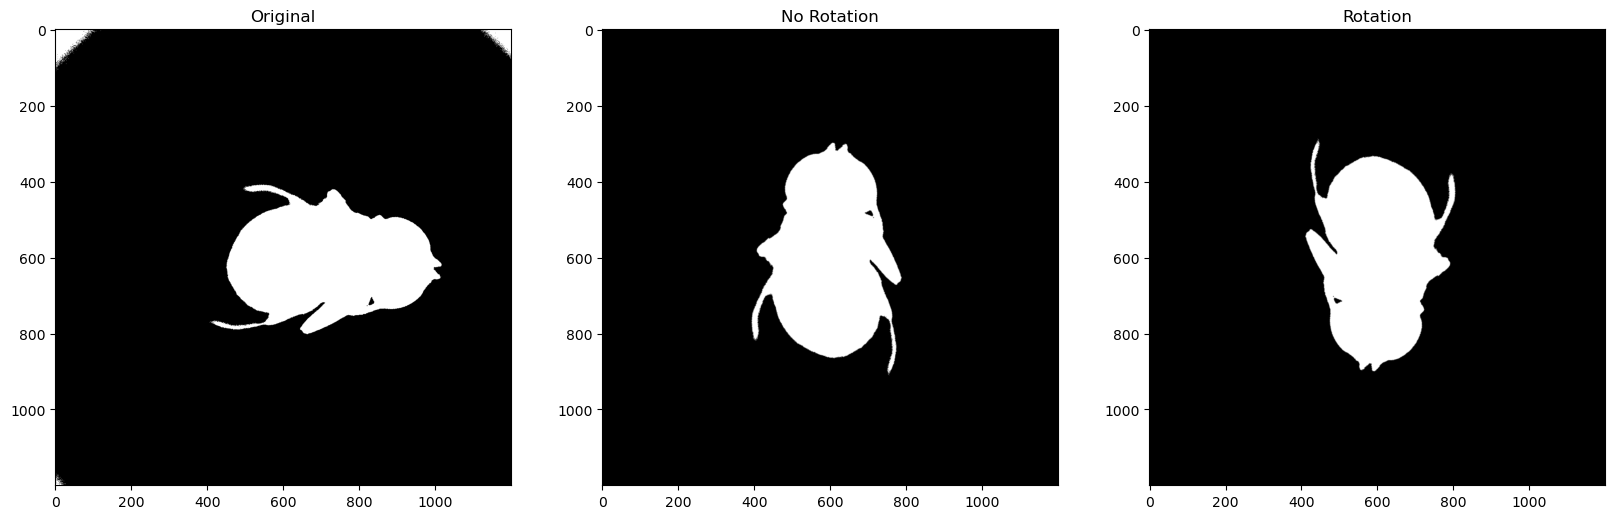

KeyError: ''

In [16]:
## This dictionary contains the proper rotation, image file name, and the image mask (filled in)
### 
imgs = {}
import time
import glob
import random
def img_label(filename):
    """
    For each image we will need to ensure that the proper rotation is performed such that it is in the 
    top down rotation
    
    """
    fly_mask_orig, fly_mask_hrz,max_contour_hrz,centroid_hrz, body_axis_pt_0_hrz,body_axis_pt_1_hrz,angle_og,angle_rot= contour_hrz_matrix(filename)
# mask_fly_norot = get_objectmask(fly_mask_hrz,max_contour_hrz)
    mask_fly_rot = cv2.rotate(copy.deepcopy(fly_mask_hrz),cv2.ROTATE_180)
    dict_img ={
        "No Rot": fly_mask_hrz,
        "Rot":mask_fly_rot
    }
#     for i in range(1):
    ## test various rotations (0 or 180)
    fig = plt.figure(figsize=(20,20))
    plt.subplot(1,3,1)
    plt.title("Original")
    plt.imshow(fly_mask_orig,cmap='gray')
    print(f"<< Original Angle: {np.rad2deg(angle_og)} >>")
    plt.subplot(1,3,2)
    plt.title("No Rotation")
    # print("No Rotation Angle:",np.rad2deg(angle))
    print(f"<< No Rotation Angle: {np.rad2deg(angle_og)} >>")
    plt.imshow(fly_mask_hrz,cmap='gray')
    plt.subplot(1,3,3)
    plt.title("Rotation")
    print(f"<< Rotation Angle: {np.rad2deg(angle_og)-180} >>")
    plt.imshow(mask_fly_rot,cmap='gray')
    plt.show()
    
    fly_up = input("Input the name of No Rotation or Rotation depending on which one display fly pointed up. ")
    mask_fly = dict_img[fly_up]
    
    return mask_fly

# get all of the files in the folder
# shuffled_list = sorted(glob.glob('/media/flyranch/T7 Shield/flyflipimgs/20240502125110/*.png'), key=lambda x: random.random())
shuffled_list = sorted(glob.glob('C:/Users/lkrow/Desktop/20240502125110/*.png'), key=lambda x: random.random())
print(shuffled_list)
for file in shuffled_list[:20]:
    name = file.split('/')[-1].strip('.png')
    mask_fly = img_label(file)
    imgs[name] = mask_fly
    # execute function and then add these images and etc to the dictionary
# imgs
# img_label("imgs/20240416133324_7778.png")

In [27]:
list(imgs.keys())[-4]
# glob.glob('C:/Users/lkrow/Desktop/20240502125110/*.png')

'20240502125110\\20240502125110_1332'

In [10]:
l = glob.glob('C:/Users/lkrow/Desktop/20240502125110/*.png')
for f in range(len(l)):

# np.where(file.split('/')[-1].strip('.png') == 20240502125110_5669')
    if l[f].split('/')[-1].split('\\')[-1].strip('.png') == '20240502125110_1332':
        print(f)

1331


height 1200
Angle Test!
Angle Value: 111.91906262073725
My Angle Value: 43.8381252414745
(290, 1332)


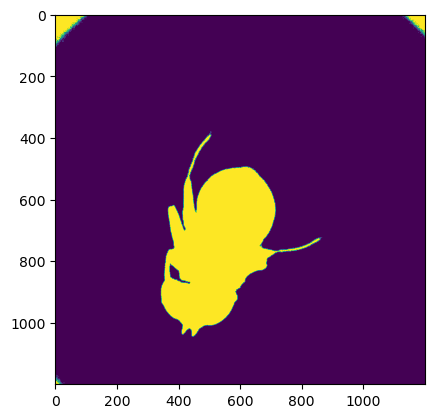

: 

In [29]:
fly_mask, max_contour,centroid, body_axis_pt_0,body_axis_pt_1 = get_contour_centroid(l[1331])
plt.imshow(fly_mask)

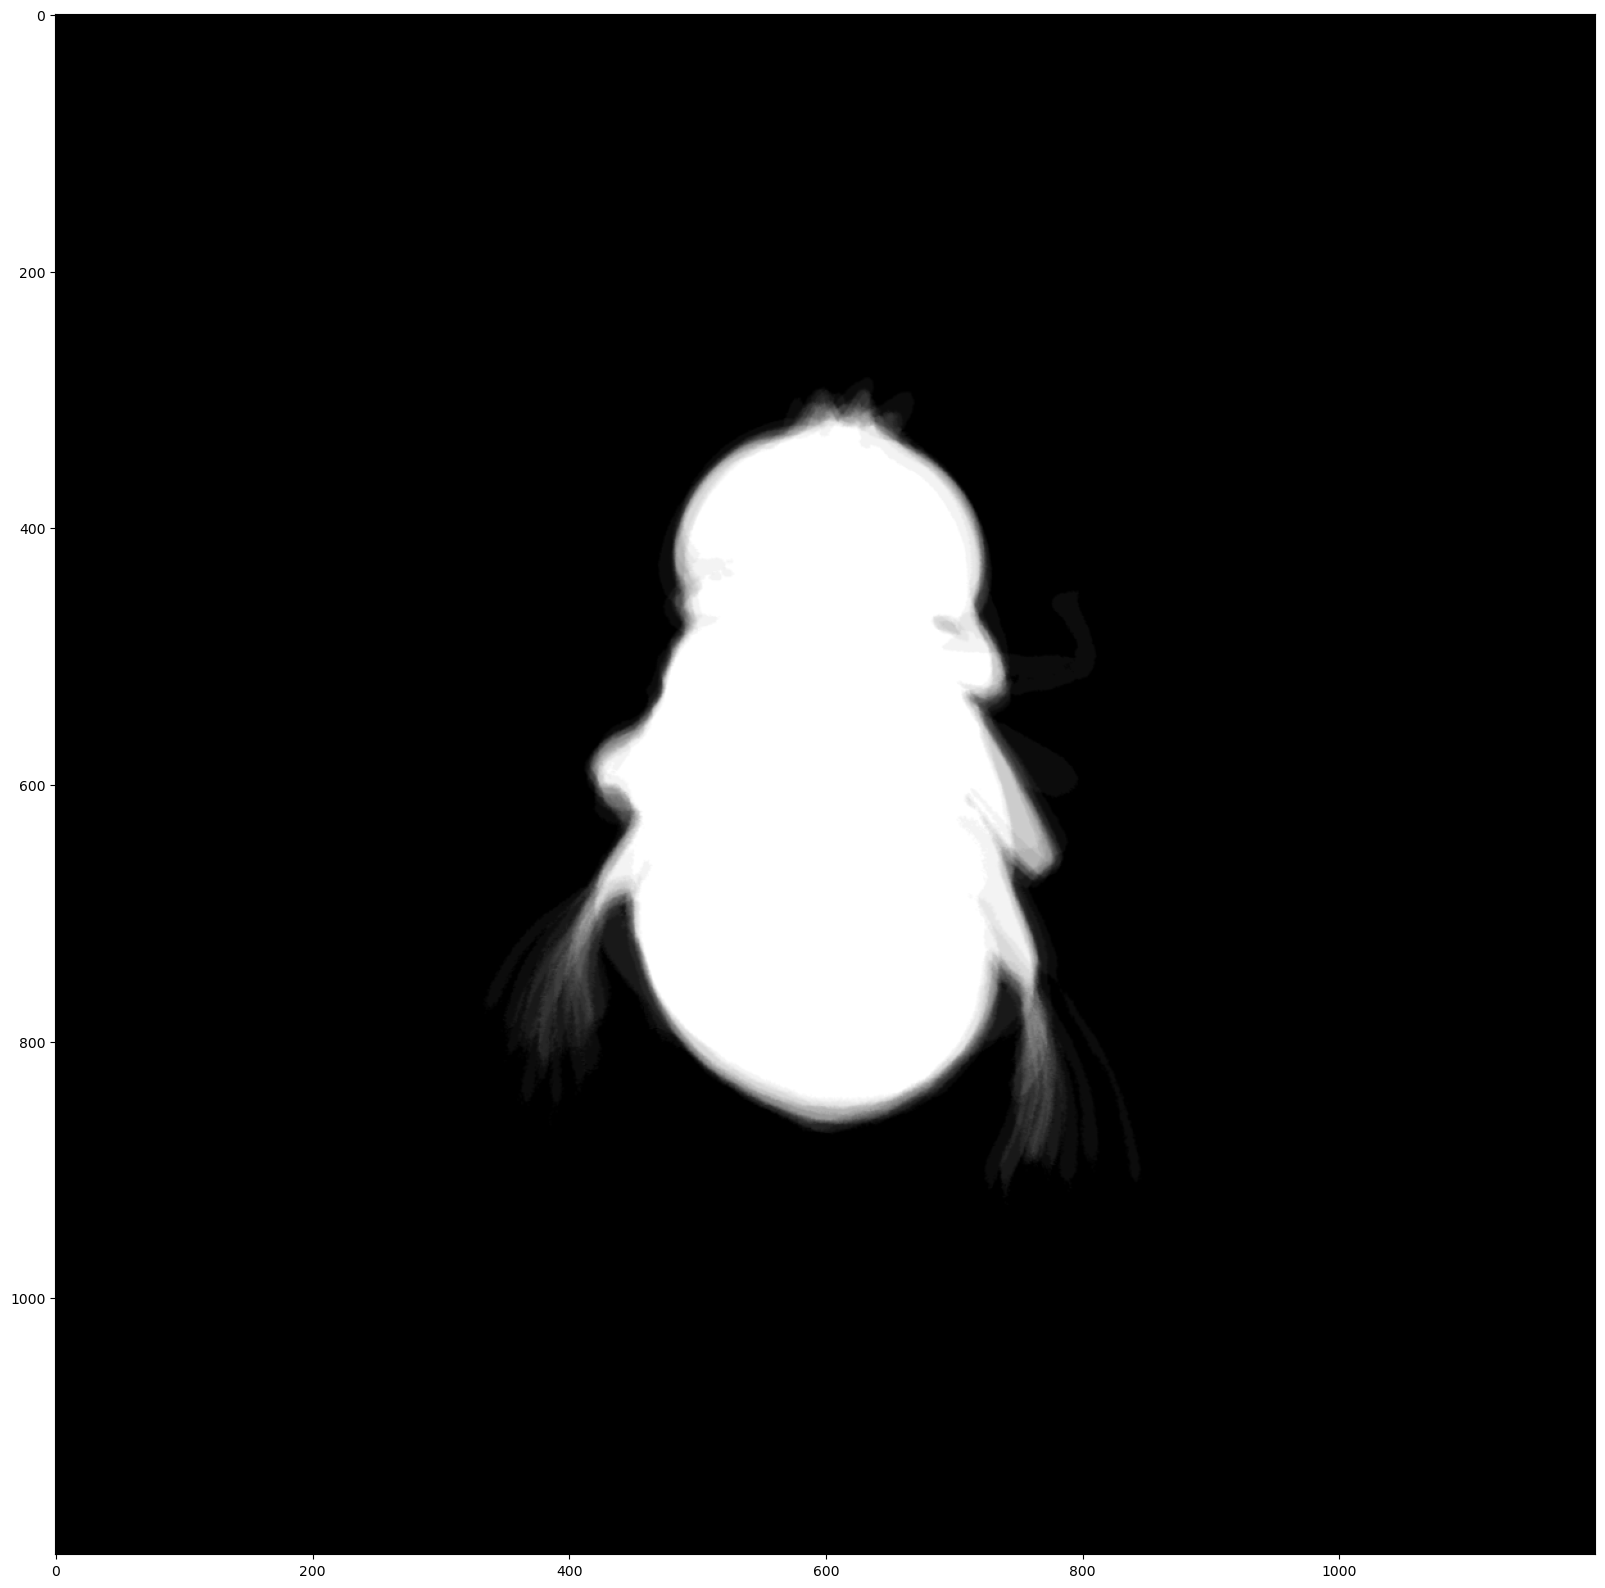

In [11]:
### Now with all the images we will create a mean tempate mask
#### HOWEVER FIRST FOR EACH MASK IT NEEDS TO BE FILLED IN USING OUR FILL METHOD...
final = []
for img in imgs.keys():
    final.append(imgs[img])
# print(final)
stacked = np.stack(final,axis=-1)
avg_mask = np.mean(stacked, axis = -1)
plt.figure(figsize=(20,20))
plt.imshow(avg_mask,cmap = 'gray')

[0. 0. 0. ... 0. 0. 0.]


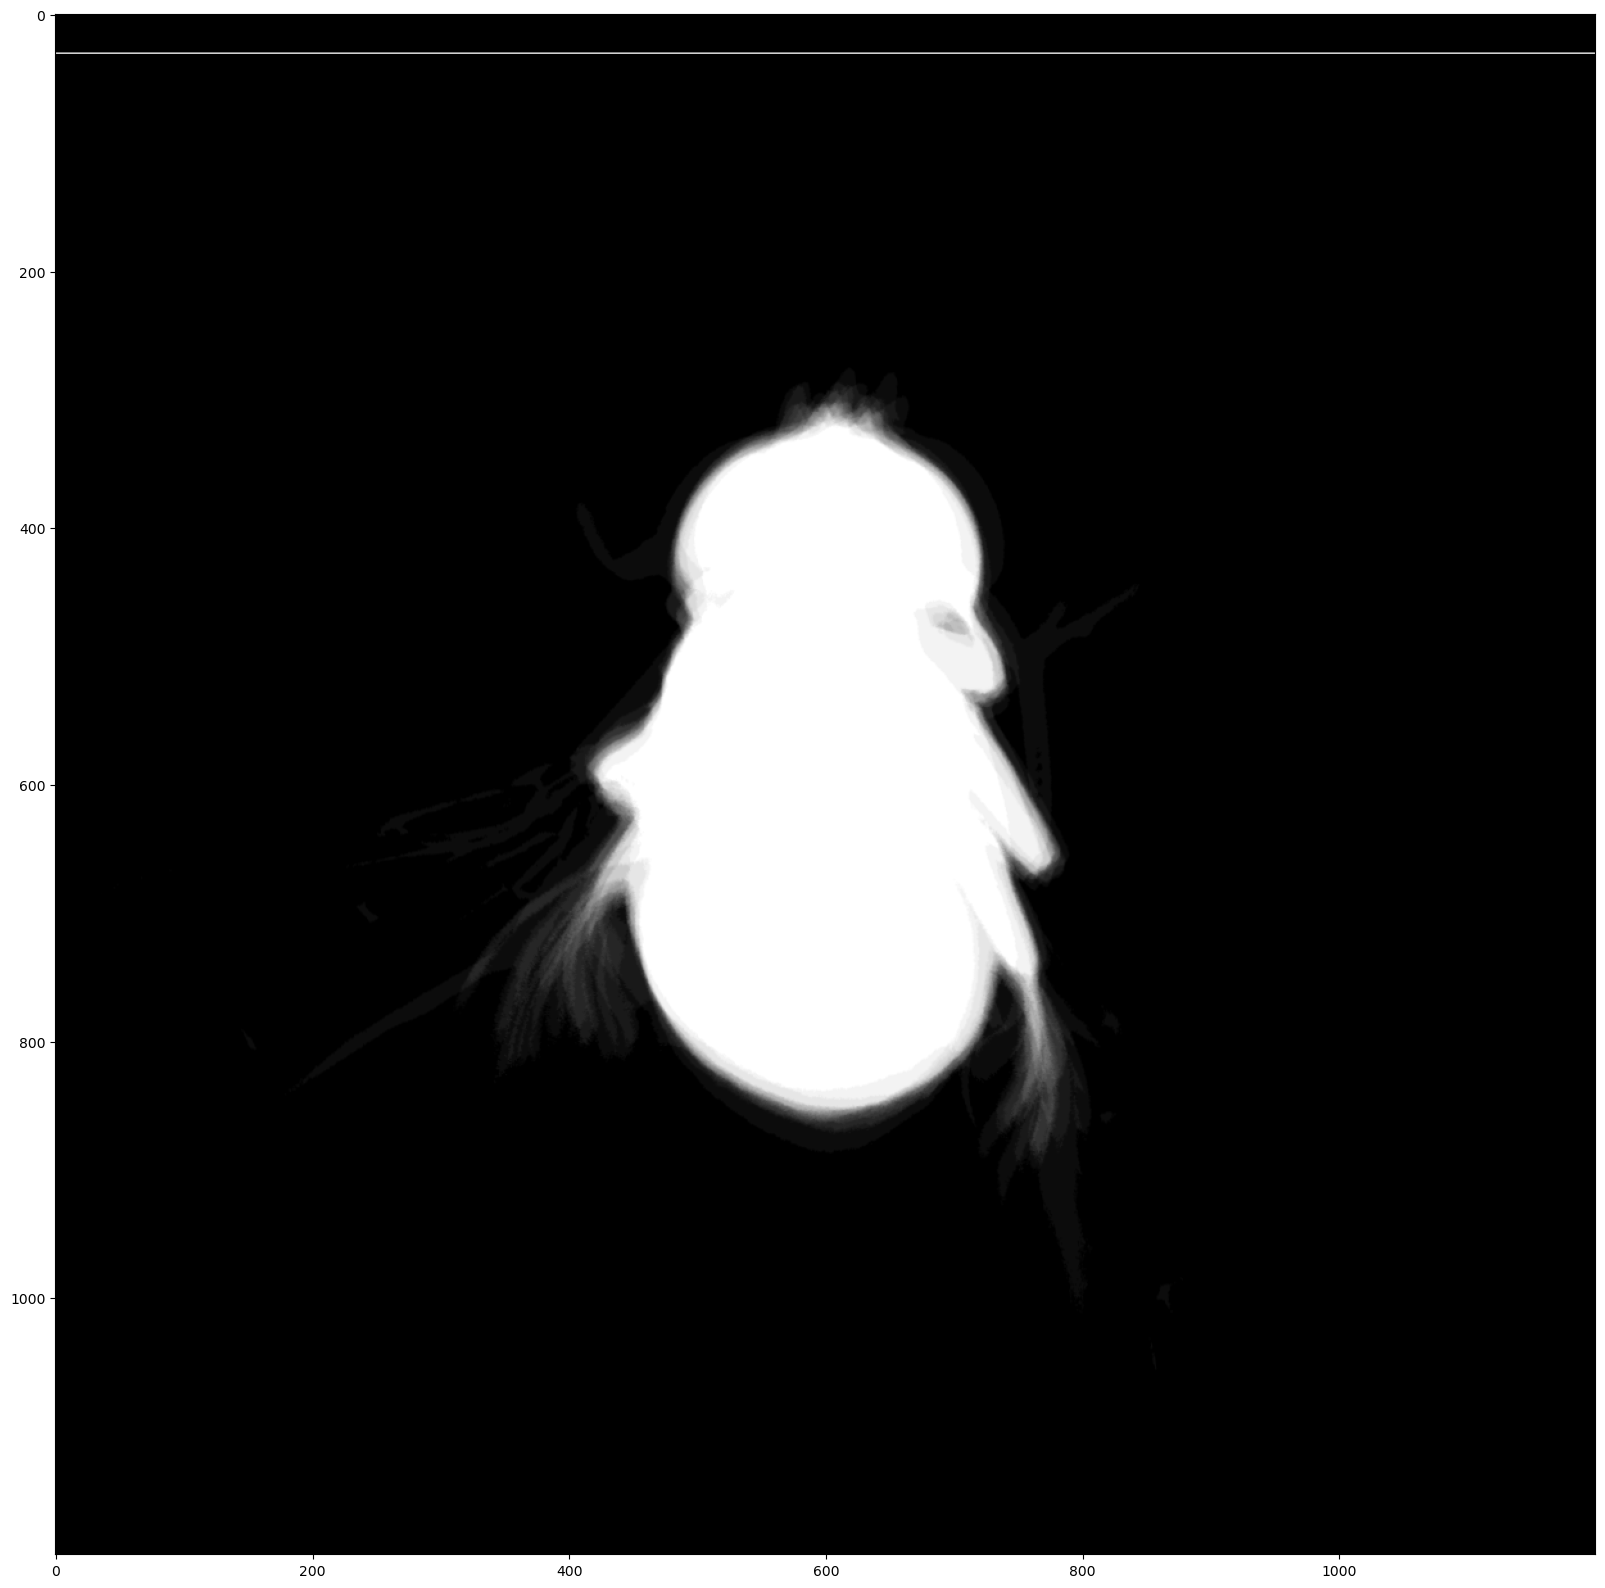

In [9]:
# testing
plt.figure(figsize=(20,20))
print(avg_mask[0])
avg_mask[30] = 255*np.ones(len(avg_mask[30]))
plt.imshow(avg_mask,cmap ='gray')

In [123]:
avg_mask.dtype

dtype('float64')

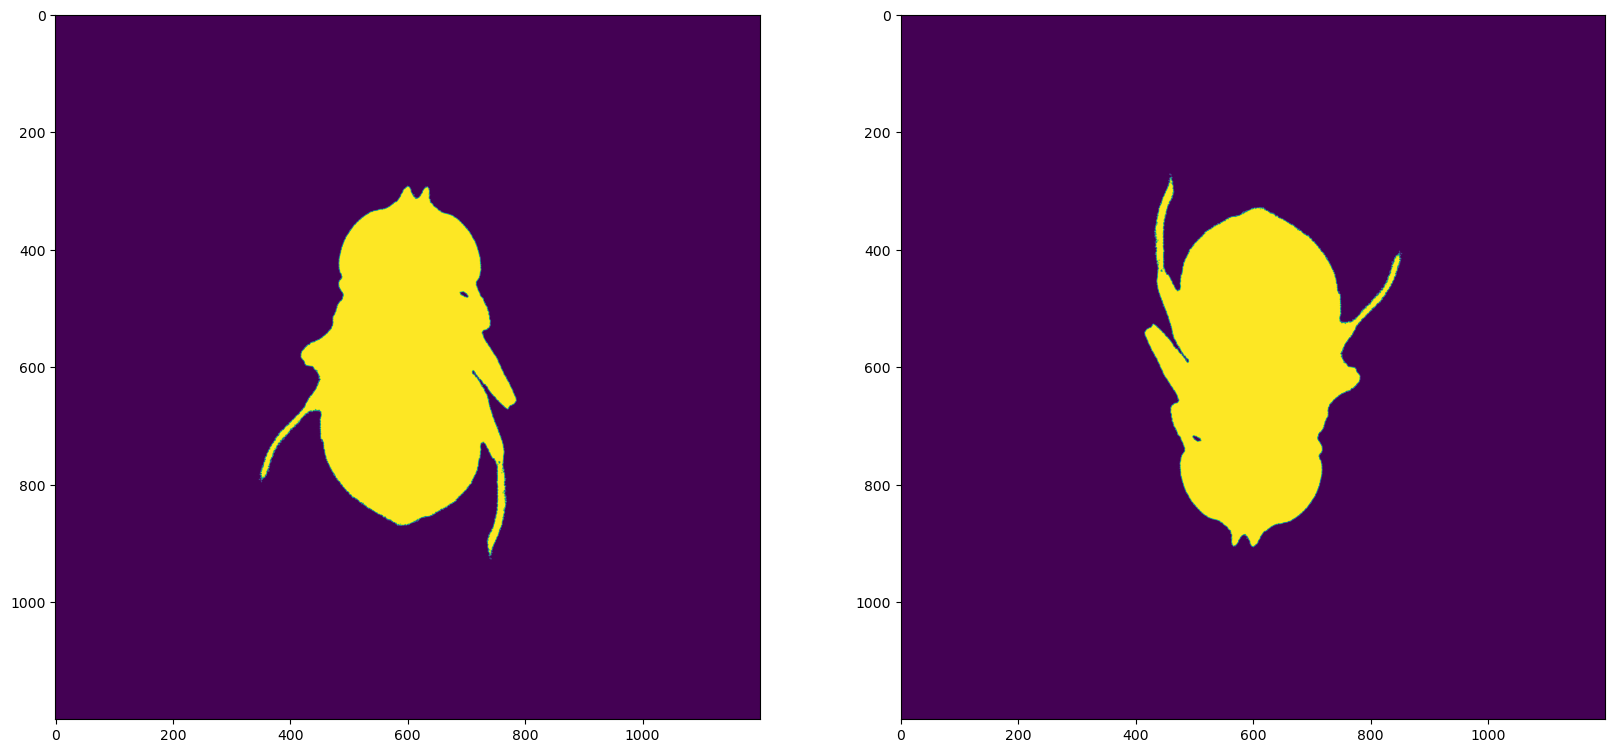

In [12]:
avg_mask.dtype
imgs[list(imgs.keys())[0]].dtype
img1 = imgs[list(imgs.keys())[18]].astype('float64')
# img2 = cv2.rotate(cv2.ROTATE_180
avg_mask.dtype
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(img1)
plt.subplot(122)
plt.imshow(cv2.rotate(img1,cv2.ROTATE_180))

In [13]:
## Comparison between two images
def mse(img1, img2):
    area_px = img1.shape[0]*img1.shape[1]
    px_diff = cv2.subtract(img1, img2)
    sum_err = np.sum(px_diff**2)
    mse = sum_err/(float(area_px))
    return mse
error = mse(avg_mask,img1)
error2 = mse(avg_mask,cv2.rotate(img1,cv2.ROTATE_180))
print("No rotation:",error)
print("Rotation:",error2)

No rotation: 289.55360000694435
Rotation: 1196.0565777152779


#### Test Images

In [3]:
# Generate fly plot MSE 1 to MSE 2
## MSE 1 is the HEad, MSE 2 is the back
img_list = glob.glob('C:/Users/lkrow/Desktop/20240502125110/*.png')




## Development of classification basd on this plot generated by the user..

In [2]:
## Generate file correction...
## No data in cluster for given fly... see the variability...

In [ ]:
## Generate a video from data that is clearly misaligned

## Then recreate the video where the fly is head aligned

## 

In [ ]:
## Need to look at plot and then from 

height 1200
Angle Test!
Angle Value: -169.51803649791472
My Angle Value: 200.96392700417059
mask radius 570
Angle Test!
Angle Value: 91.40212478541605
My Angle Value: 2.8042495708320985


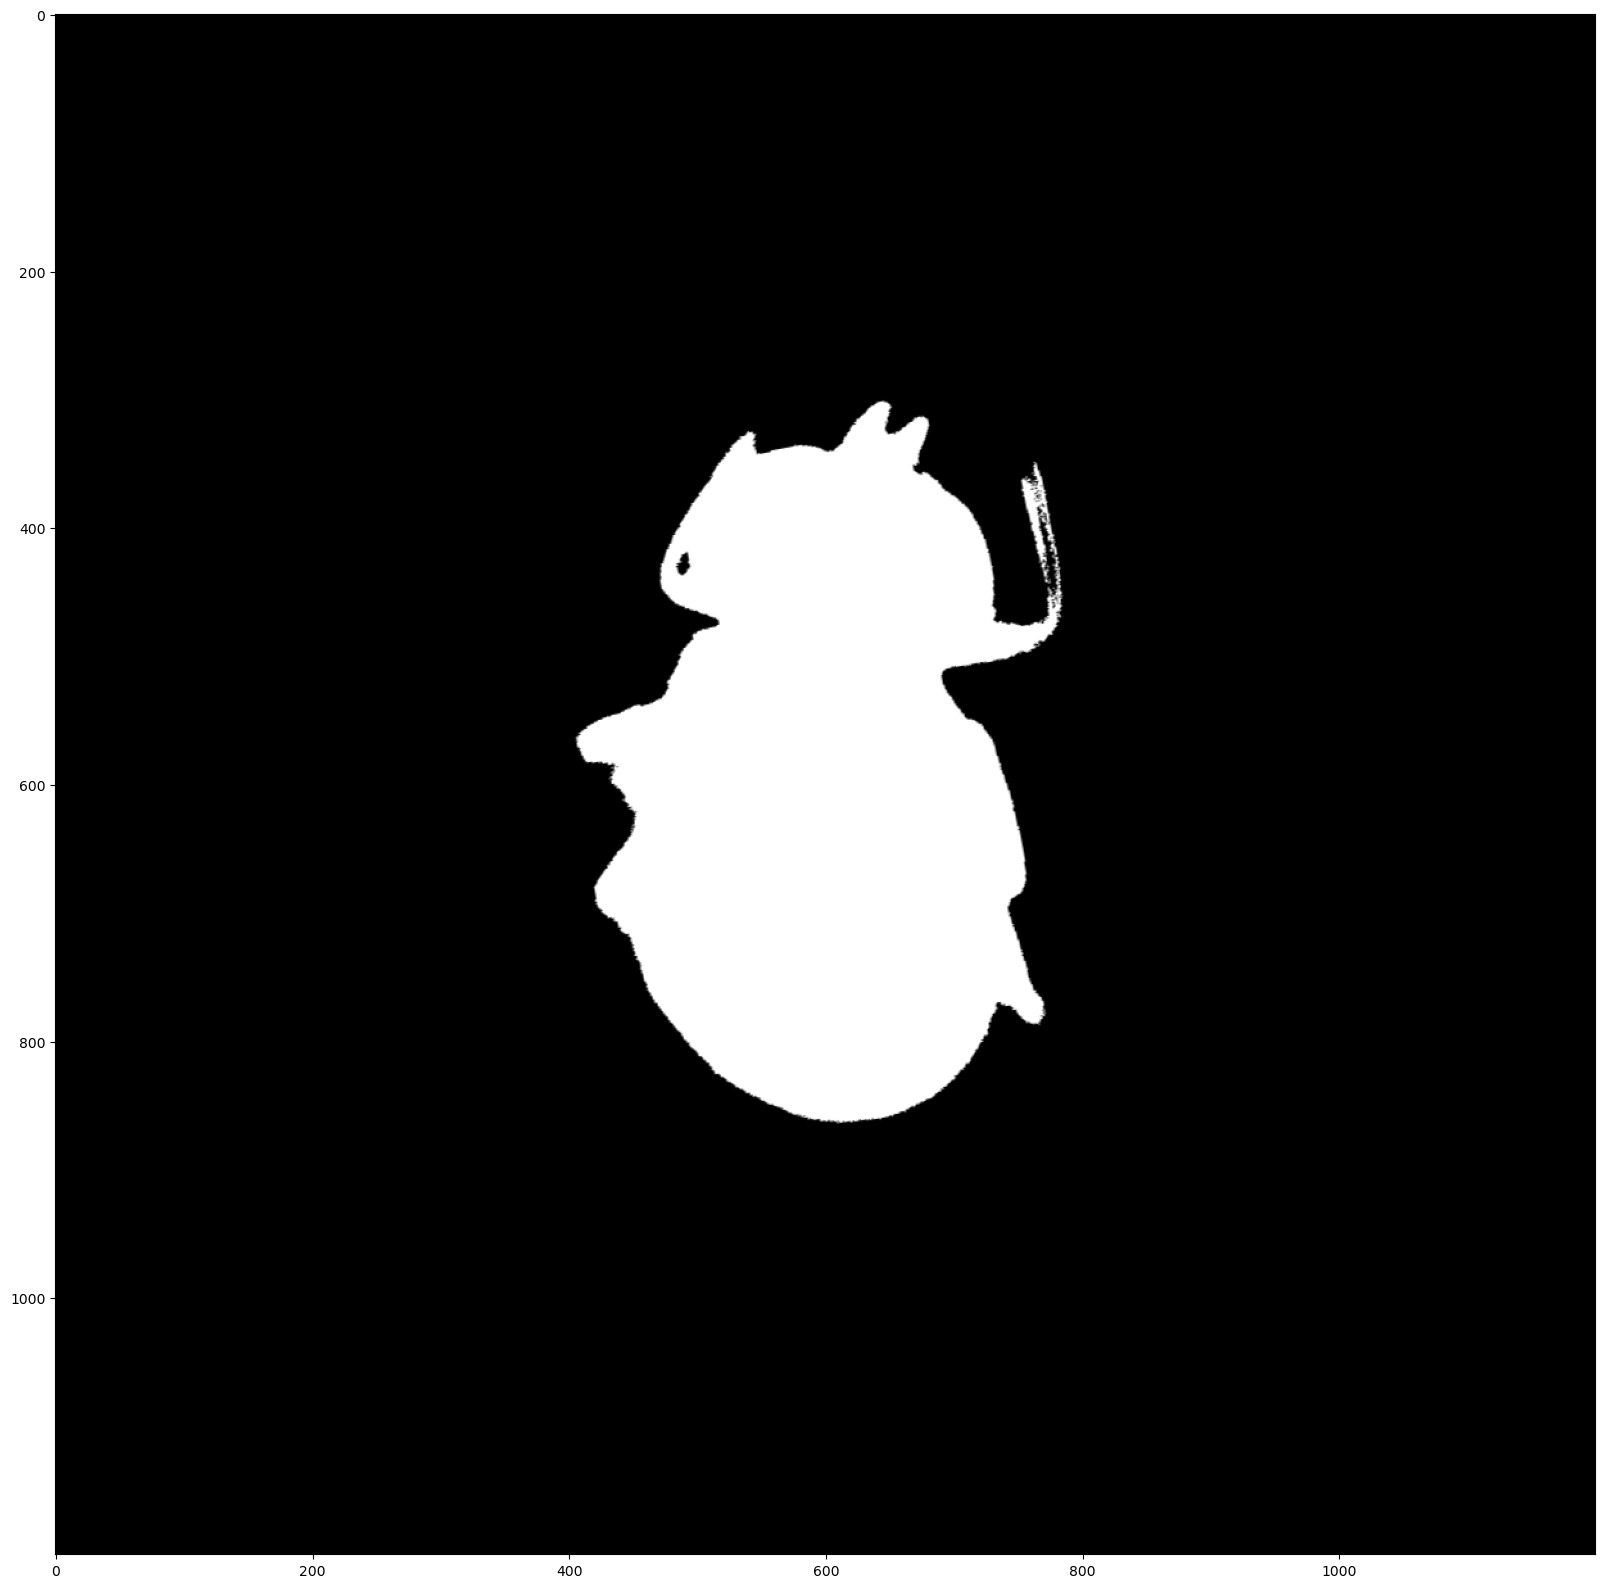

In [23]:
fly_mask_hrz,max_contour_hrz,centroid_hrz, body_axis_pt_0_hrz,body_axis_pt_1_hrz, angle=contour_hrz_matrix('imgs/20240502125110_0007.png')
plt.figure(figsize=(20,20))
plt.imshow(fly_mask_hrz,cmap='gray')

In [16]:
fly_mask_hrz = fly_mask_hrz.astype('float64')
error = mse(avg_mask,fly_mask_hrz)
error2 = mse(avg_mask,cv2.rotate(fly_mask_hrz,cv2.ROTATE_180))
print("No rotation:",error)
print("Rotation:",error2)

No rotation: 601.9849431892361
Rotation: 1262.3099090225694


In [ ]:
## Method for iterating over a whole bunch of images
### Determine whether og image or flip is better...

## Image List


## Determine Rotation vs No Rotation MSE


## LOW MSE -> That is the correct rotation


## Map the location of the head... 

Blah = intersect_up(arr_min,max_contour)



## Method: Moments

658
900


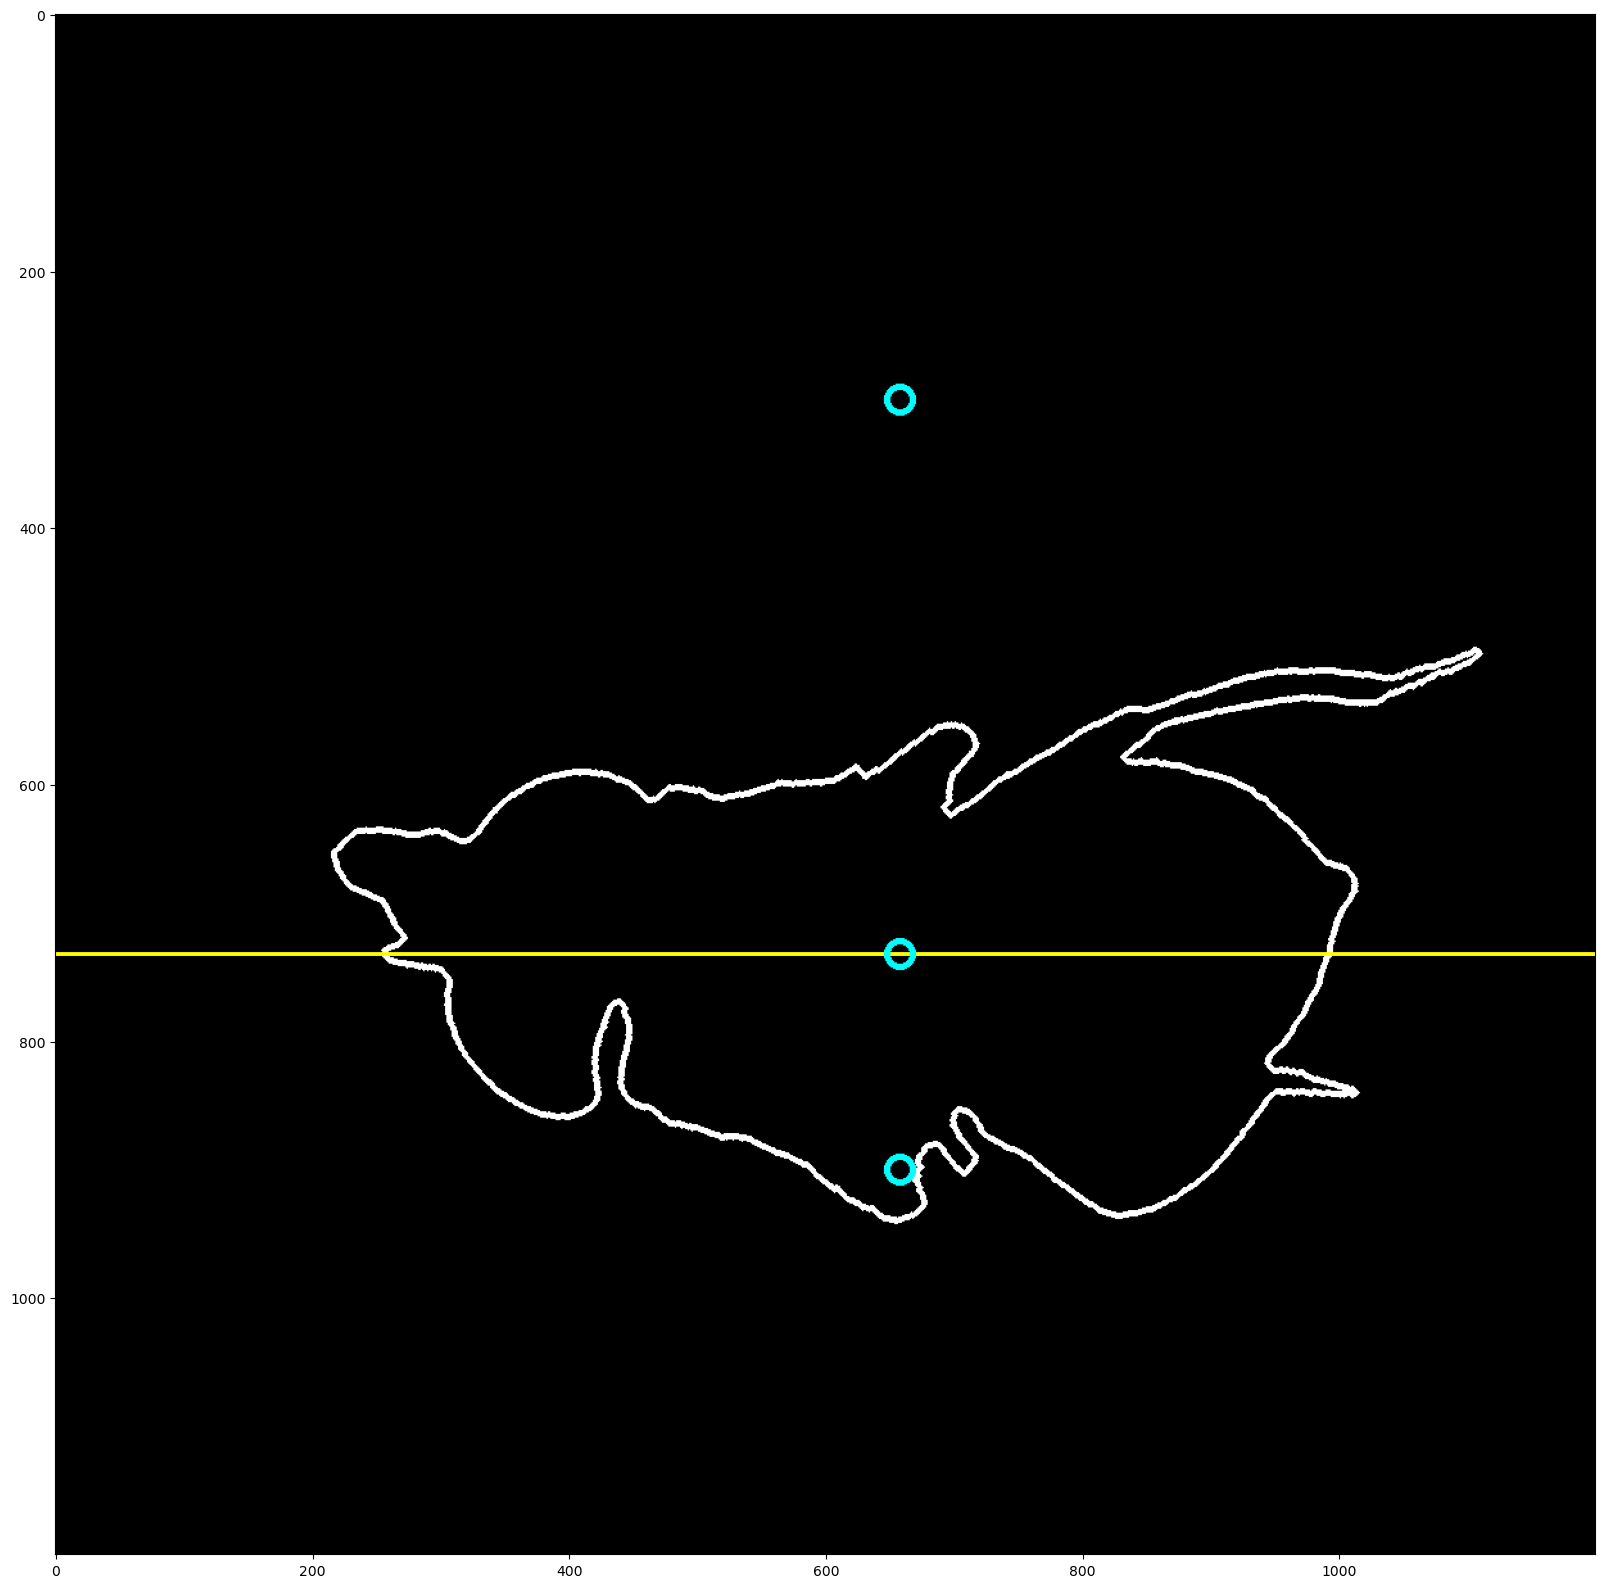

In [3]:
plt.figure(figsize=(20,20))
mask_fly = get_objectmask(fly_mask_adj,unrot_vec)

cv2.circle(mask_fly,body_axis_pt_0_adj,10, color = (255,255,0),thickness =3)
cv2.circle(mask_fly,body_axis_pt_1_adj,10, color = (255,255,0),thickness =3)
cv2.line(mask_fly,body_axis_pt_0_adj,body_axis_pt_1_adj,color = (255,255,0), thickness = 2)
# for p in points:
#     cv2.circle(mask_fly,(p),10, color = (255,255,255),thickness =1)
# First Quarter
quart1_x, quart1_y = int(centroid_adj[0]), int(0.25*mask_fly.shape[1]) # First Quarter...
cv2.circle(mask_fly,(quart1_x, quart1_y),10, color = (0,255,255),thickness =3 )
print(quart1_x)
# Last Quarter
quart3_x, quart3_y = int(centroid_adj[0]), int(.75* mask_fly.shape[1]) 
cv2.circle(mask_fly,(quart3_x, quart3_y),10, color = (0,255,255),thickness =3)
print(quart3_y)
# cv2.circle(mask_fly,(max_contour[intersect[1][1]][0]),10, color = (0,255,255),thickness =3 )
cv2.circle(mask_fly,centroid_adj,10,color = (0,255,255),thickness=3)
plt.imshow(mask_fly)

(1200, 1200)


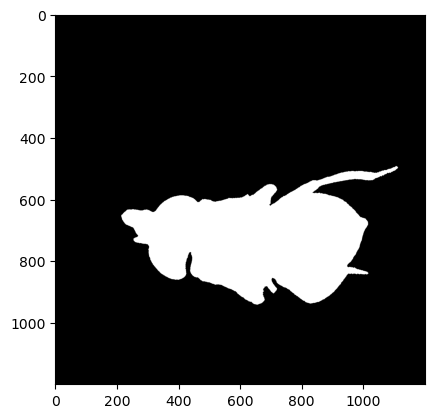

In [6]:
mask_fly = get_fill_flymask(fly_mask_adj,unrot_vec)
print(mask_fly.shape)
# img_fly = cv2.cvtColor(mask_fly, cv2.COLOR_BGR2GRAY)
# print(img_fly.shape)
plt.imshow(mask_fly, cmap ='gray')

height 1200
Angle Test!
Angle Value: 144.78860513457386
My Angle Value: 109.57721026914768
mask radius 570
YO
<class 'numpy.ndarray'> (2, 3)
144.78860513457386 -54.78860513457386 35.21139486542614
float64 int32
(2245, 2) (2245, 1)
(2, 3) (2, 2) (2245, 2)
Unrotated
[[-247.09676579  110.79796178]]

coords
(600.0, 705.8212718945031) (600.0, 571.1794797456831)

Applied
[[458 681]]
(215, 917) old body axis
(2, 2) (1, 2) [[-490]
 [ 346]]
[[905]
 [  5]] new body axis 0
(1195, 225) old body axis 1
(2, 2) (1, 2) [[ 490]
 [-346]]
[[ 504]
 [1136]] new body axis 1
ANGLE: 2.5270378789682812 144.78860513457386
Angle Test!
Angle Value: -179.99540538347065
My Angle Value: 180.00918923305872
(1200, 1200)


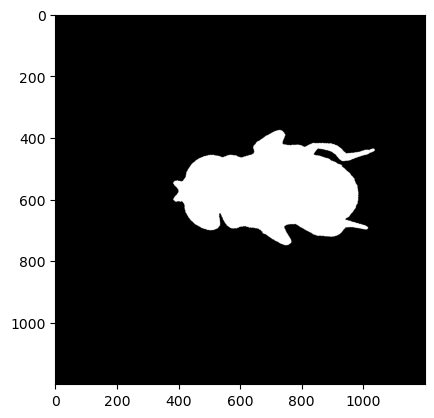

In [7]:
file ="20240423102146_8500"
file_name = "imgs/" + file +".png"
# fly_mask, max_contour,centroid, body_axis_pt_0,body_axis_pt_1 = get_contour_centroid(file_name)
fly_mask_adj, max_contour_adj,centroid_adj, body_axis_pt_0_adj,body_axis_pt_1_adj,unrot_vec  = contour_rot_matrix(file_name)
mask_fly = get_fill_flymask(fly_mask_adj,unrot_vec)
print(mask_fly.shape)
# img_fly = cv2.cvtColor(mask_fly, cv2.COLOR_BGR2GRAY)
# print(img_fly.shape)
plt.imshow(mask_fly, cmap ='gray')


In [8]:



## Get moment
def get_moment(image,k=2):
    data = image.sum(axis=0)
    weighted_data = data*np.arange(data.shape[0])**k
    return  weighted_data.sum()

# Moment for first 1/4
quart1_x, quart1_y = int(centroid_adj[0]), int(0.25*mask_fly.shape[1]) # First Quarter...
image_0 = np.array(mask_fly)
image_0[:,int(quart1_y)-1:] = 0
image_0 = image_0[:,:int(quart1_y)+1]
moment_0 = get_moment(image_0,2)


# Moment for last 1/4
# Last Quarter
quart3_x, quart3_y = int(centroid_adj[0]), int(.75* mask_fly.shape[1]) 
image_1= np.array(mask_fly)
image_1[:,:int(quart3_y)] = 0
image_1 = np.fliplr(image_1)
image_1 = image_1[:,int(quart3_y):]
moment_1 = get_moment(image_1,2)


# Compute descriminant and flip flag
discrim = (moment_0 - moment_1)/(moment_0 + moment_1)
if discrim < 0:
    ok = False
    print(ok)
else:
    ok = True 
    print(ok)

True


C:\Users\lkrow\AppData\Local\Temp\ipykernel_11632\528346281.py:26: RuntimeWarning: invalid value encountered in longlong_scalars
  discrim = (moment_0 - moment_1)/(moment_0 + moment_1)


In [41]:
def get_cv_moment(image):
    moments = cv2.moments(image, binaryImage=True)
    # Example: Returning the spatial moment m00 (which is the sum of all pixel values)
    return moments['m00']

img_fly = cv2.cvtColor(mask_fly, cv2.COLOR_BGR2GRAY)
# Compute moments using OpenCV moments
moment_0_cv = get_cv_moment(image_0)
moment_1_cv = get_cv_moment(image_1)

error: OpenCV(4.9.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x59191d0d::Set<1,-1,-1>,struct cv::impl::A0x59191d0d::Set<0,2,5>,4>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


## Method 3: NOT Working Version...NEED TO FIND FIX TO CENTER FLY IN IMAGE??? -> Maybe just apply everything to image and then execute a rotation...
Essentailly the past two methods did not center the fly in the image
This method does that centering as well as adjustment to align the centerline on the y axis and do the rotation. It does this for the contours as well as 
the body axis line as well..

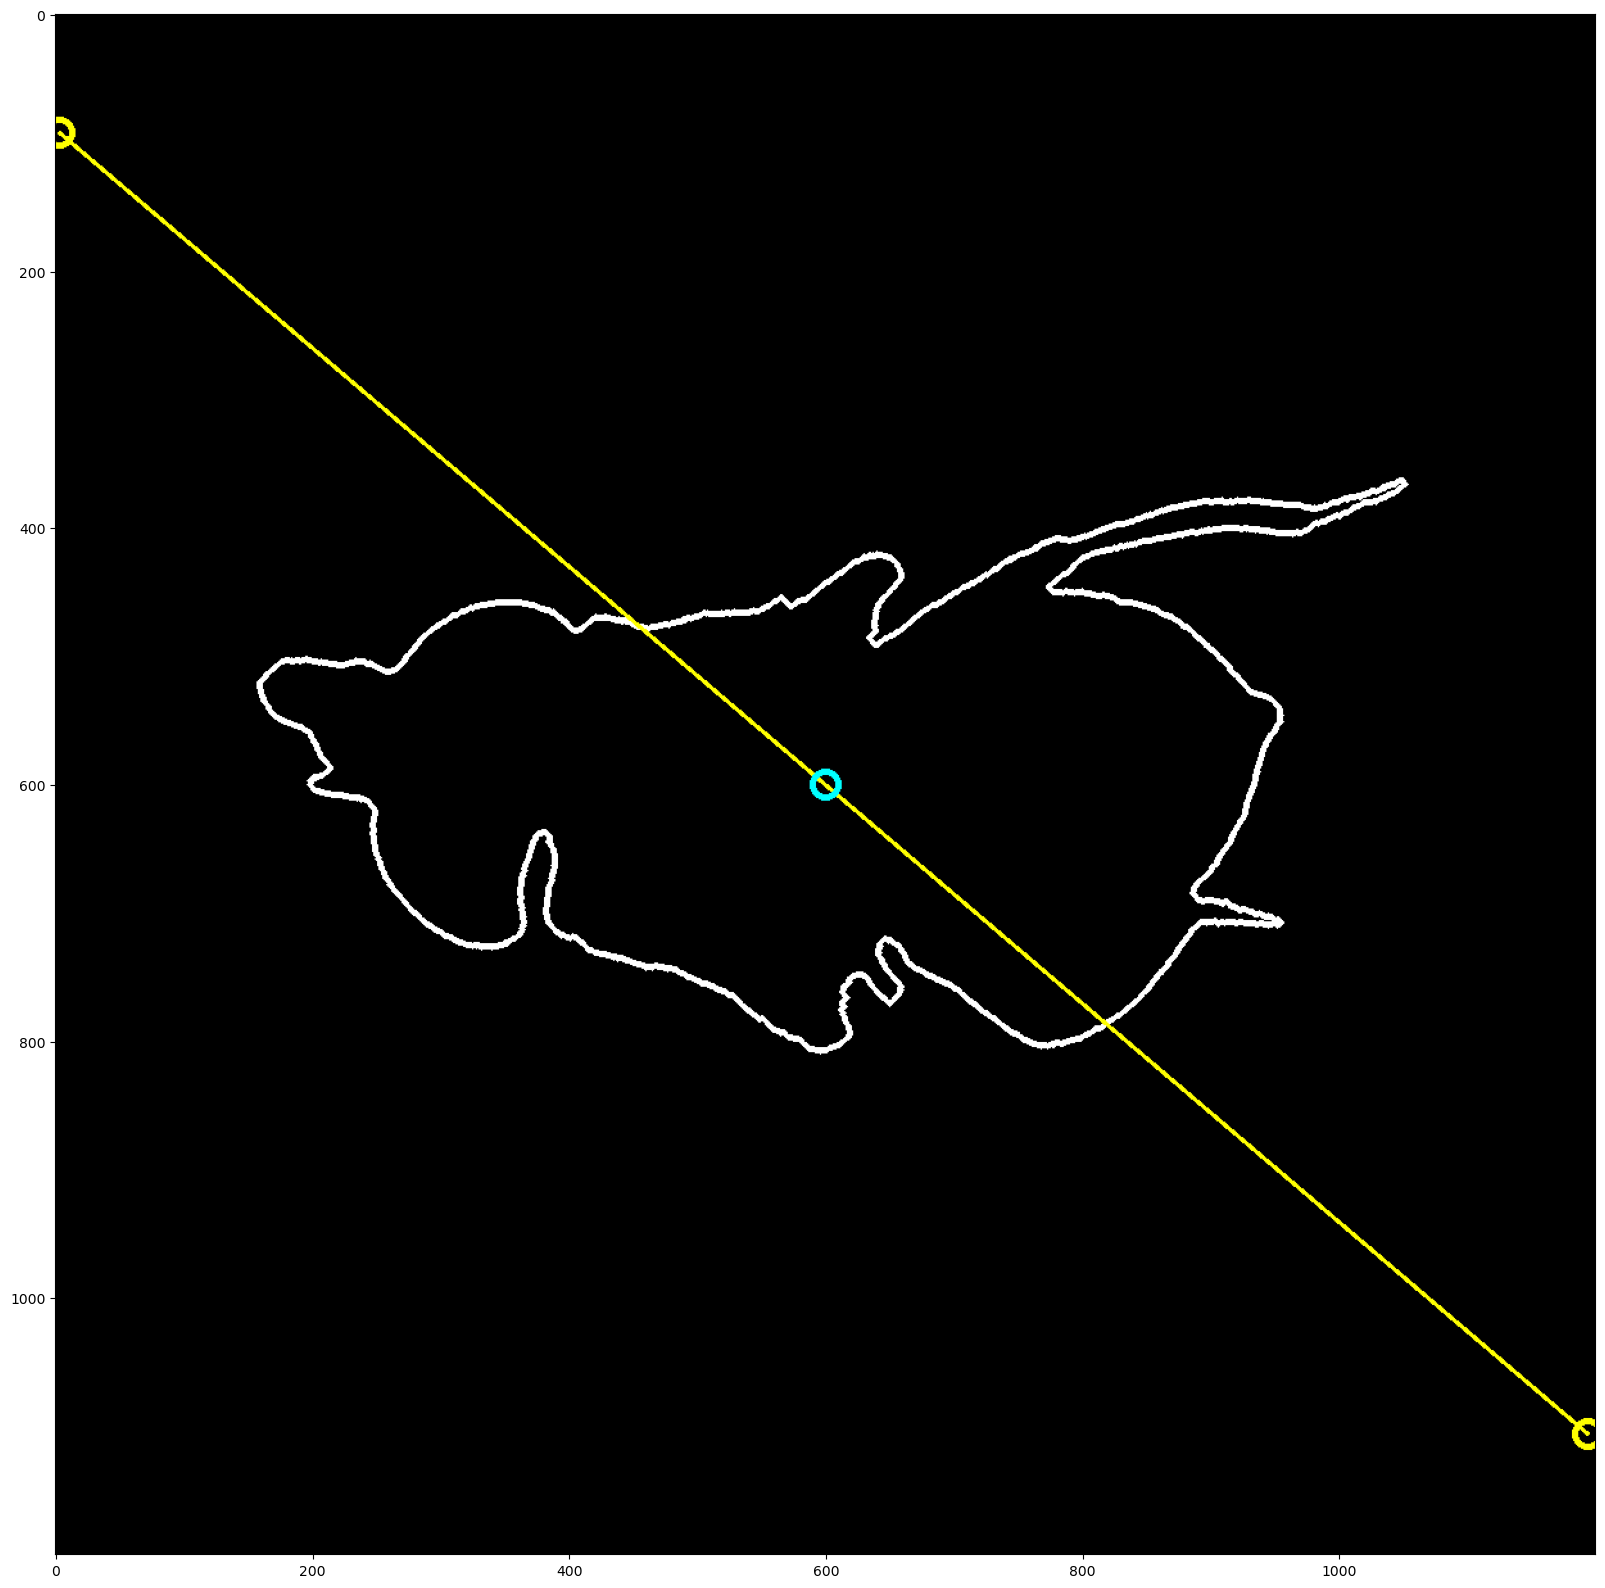

In [3]:
plt.figure(figsize=(20,20))
mask_fly2 = get_objectmask(fly_mask_adj2,unrot_vec2)

cv2.circle(mask_fly2,body_axis_pt_0_adj2,10, color = (255,255,0),thickness =3)
cv2.circle(mask_fly2,body_axis_pt_1_adj2,10, color = (255,255,0),thickness =3)
cv2.line(mask_fly2,body_axis_pt_0_adj2,body_axis_pt_1_adj2,color = (255,255,0), thickness = 2)
# for p in points:
#     cv2.circle(mask_fly,(p),10, color = (255,255,255),thickness =1)

# cv2.circle(mask_fly,(max_contour[intersect[0][1]]),10, color = (0,255,255),thickness =3 )

# cv2.circle(mask_fly,(max_contour[intersect[1][1]][0]),10, color = (0,255,255),thickness =3 )
cv2.circle(mask_fly2,centroid_adj2,10,color = (0,255,255),thickness=3)
plt.imshow(mask_fly2)

### Draw the Buffer Line

- [`X`] Draw a line of fixed width X across the centroid 

- [   ] Using this line also draw lines that are parallel to the centerline up and down

- [   ] Then plot the points at which it intersects on the fly

- [   ] After this point We will be able to get contour sections from top and bottom. 

- [   ] These will then be plotted in two different orientations.

- [   ] In this method after we have plotted in two different orientations then the user will deciede which is top and which is bottom. In the future we will utilize.


#### 1. Draw Line of Fixed width across centroid

Fixed Width will start with 100px


In [5]:
plt.figure(figsize=(20,20))
mask_fly3 = copy.deepcopy(mask_fly2)
## Point 1: 50 points to right
p1 = (centroid_adj2[0] + 50, centroid_adj2[1])
## Point 2: 50 points to left
p2 = (centroid_adj2[0] - 50,centroid_adj2[1])
cv2.circle(mask_fly3,p1,8, color = (0,255,0),thickness =2)
cv2.circle(mask_fly3,p2,8, color = (0,255,0),thickness =2)
cv2.line(mask_fly3,(p1[0]-8,p1[1]),(p2[0]+8,p2[1]),color = (0,255,0), thickness = 2)
plt.imshow(mask_fly3)

NameError: name 'copy' is not defined

<Figure size 2000x2000 with 0 Axes>

In [6]:
x1 = body_axis_pt_0_adj2[1]
x2 = body_axis_pt_1_adj2[0]
y1 = body_axis_pt_0_adj2[1]
y2 =body_axis_pt_1_adj2[1]
print(x1,x2)
if (x2-x1 ) == 0:
    print("undefined")
else:
    print(x2-x1)
    m = (y2 - y1)/(x2-x1)
    print(m)

# # y = mx+b
# b = y1 - m*x1
# print(b)

# x = np.linspace(x1,x2+1, num = len(max_contour))
# y = m*x + b
# print(y)
# points = []
# for i in range(len(x)):
#     points.append((int(x[i]),int(y[i])))
# print(points)

1188 116
-1072
1.0979477611940298


#### 2. Draw Parallel Lines From p1 and p2 until intersection with top and bottom of object contour

Created the Line first, and then considered the possible intersection points on the contour with this line..

In [ ]:
## 
def parallel_lines(point1,point2,centroid):
    """
    Using two points and centroid determine two lines that are parallel 
    to the centroid's centerline. Returns a tuple of two arrays describing the parallel
    lines.

    Parameters:
    -----------
    point1 : tuple
        describes the x,y pixel location of a point located 50px to right of centroid
    point2 : tuple
        describes the x,y pixel location of a point located 50px to the left of centroid
    
    Returns:
    --------
    par1 : array
        array of points for parallel line interesecting point 1
    par2 : array
        array of points for parallel line intersecting point 2
    """
    


In [ ]:
plt.figure(figsize=(20,20))
mask_fly4 = copy.deepcopy(mask_fly3)


## OLD METHODS : USE AS REFERENCE
These methods below used a non aligned contour..

In [24]:
# take the 30 contour points to the lefts and right of the two intersections and plot
adj_intersect = [(intersect[0][1]+50,intersect[0][1]-50),(intersect[1][1]+50,intersect[1][1]-50)]
print(adj_intersect)

[(2165, 2065), (545, 445)]


In [5]:
np.array(body_axis_pt_0)

array([1162, 1329])

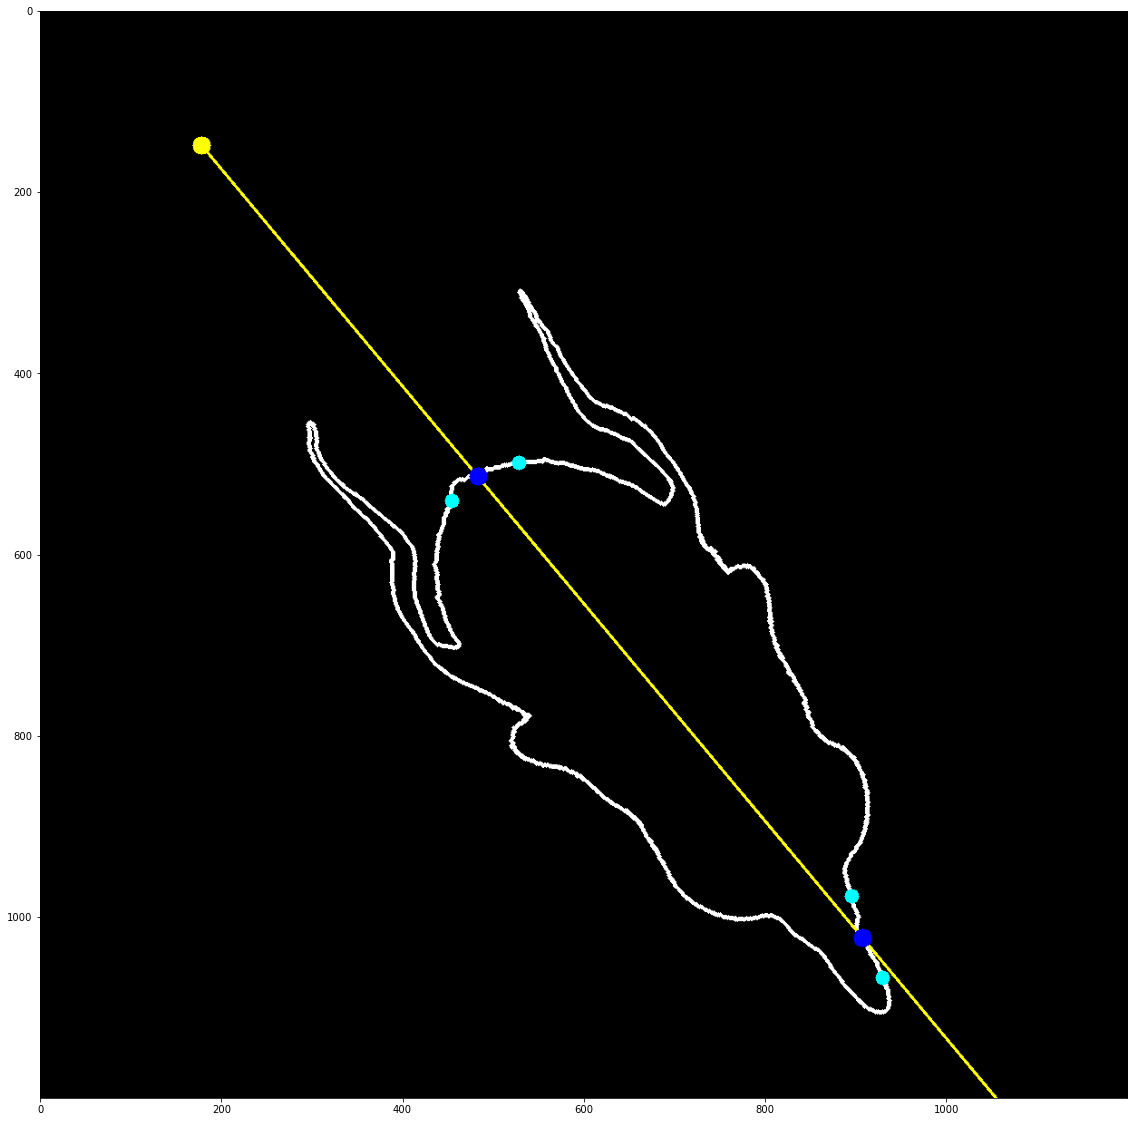

In [25]:
plt.figure(figsize=(20,20))
mask_fly = get_objectmask(fly_mask,max_contour)
cv2.circle(mask_fly,(body_axis_pt_0),10, color = (255,255,0),thickness =-3)
cv2.circle(mask_fly,(body_axis_pt_1),10, color = (255,255,0),thickness =-3)
cv2.line(mask_fly,body_axis_pt_0,body_axis_pt_1,color = (255,255,0), thickness = 2)
# for p in points:
#     cv2.circle(mask_fly,(p),10, color = (255,255,255),thickness =1)
# front 
cv2.circle(mask_fly,(max_contour[intersect[0][1]][0]),10, color = (0,0,255),thickness =-1 )
cv2.circle(mask_fly,(max_contour[adj_intersect[0][1]][0]),8, color = (0,255,255),thickness =-1 )
cv2.circle(mask_fly,(max_contour[adj_intersect[0][0]][0]),8, color = (0,255,255),thickness =-1 )


# cv2.circle(mask_fly,(max_contour[adj_intersect[0][0]+8][0]),10, color = (0,255,255),thickness =-1 )
# cv2.circle(mask_fly,(max_contour[adj_intersect[0][0]+16][0]),10, color = (0,255,255),thickness =-1 )
# cv2.circle(mask_fly,(max_contour[-1][0]),10, color = (0,0,255),thickness =-1 )

# back
cv2.circle(mask_fly,(max_contour[intersect[1][1]][0]),10, color = (0,0,255),thickness =-1 )
cv2.circle(mask_fly,(max_contour[adj_intersect[1][0]][0]),8, color = (0,255,255),thickness =-1 )
cv2.circle(mask_fly,(max_contour[adj_intersect[1][1]][0]),8, color = (0,255,255),thickness =-1 )
# cv2.circle(mask_fly, max_contour[2474][0] ,8,color = (0,255,255),thickness =4 )
plt.imshow(mask_fly)

In [12]:
len(max_contour)

2749

In [73]:
max_contour[2474]

array([[727, 427]], dtype=int32)

array([[544, 215]], dtype=int32)

In [77]:
# Here we get the range of contours for the two sides
# First check if value is negative.. if negative then add the length of the list
def isnegative(points):
    """checks if current value is negative and if so adds length of contour to it and returns new value"""
    for tple in range(len(points)):
        for val in range(len(points[tple])):
            points[tple]  = list(points[tple])
            if points[tple][val] < 0:
                # convert to mutable list
                points[tple][val] +=len(max_contour)
    return points

adj_intersect = isnegative(adj_intersect)

def get_contour_points():
    """
    Currently we are not getting the points in between...
    
    Will generate two contour lists that will contain the ranges of the back and front contours

    Ex: 
    82.... 1548 

    Contours Drawn Counter Clockwise...
    """
    ## test getting the ranges based on the adj_intersect
    contours_1 = max_contour[min(adj_intersect[0]):max(adj_intersect[0])+1]
    contours_2 = max_contour[min(adj_intersect[1]):max(adj_intersect[1])+1]

    ## check that the length of these are the same (at 101)
    if len(contours_1) == len(contours_2) and len(contours_2) == 101:
        print("True")
    
    ## if this is not the case then need to determine which case is not 101
    else:
        print(len(contours_1),len(contours_2))
        if len(contours_1) != 101:
            ## issue is that there is a case where we are going over the endpoint
            ## solution: create to lists... 
            # List 1: 0 to min idx value +1
            # List 2: max idx value to the len of list -1
            list1 = max_contour[:min(adj_intersect[0])+1]

            list2 = max_contour[max(adj_intersect[0]):len(max_contour)]
  
            contours_1 = np.concatenate((list2,list1),axis =0)
        elif len(contours_2) != 101:
            list1 = max_contour[:min(adj_intersect[1])+1]
            list2 = max_contour[max(adj_intersect[1]):len(max_contour)]
            contours_2 = np.concatenate((list2,list1),axis =0)
    
        ## check that the length of these are the same (at 101)
    if len(contours_1) == len(contours_2) and len(contours_2) == 101:
        print("Adjusted True")
        print(len(contours_1),len(contours_2))
    

    return contours_1, contours_2

    
        



    
    ## first find where last contour point is located


    ## Perform a check... both lists should be equal number of points
contours_1, contours_2 = get_contour_points()
print(contours_1)
# print(contours_2)
## Find the minimum val 
# print(min(adj_intersect[0])) # 32 -30
# print(max(adj_intersect[0])+1) # 32 +30 +1
# contours_1 = max_contour[min(adj_intersect[0]):max(adj_intersect[0])+1] # Front
# print(len(contours_1))
# print(min(adj_intersect[1])) # 897 -30
# print(max(adj_intersect[1])+1) # 897 +30 +1
# contours_2 = max_contour[min(adj_intersect[1]):max(adj_intersect[1])+1] # Back
# print(len(contours_2))


True
Adjusted True
101 101
[[[549 914]]

 [[550 915]]

 [[551 915]]

 [[552 916]]

 [[552 917]]

 [[553 917]]

 [[554 918]]

 [[555 919]]

 [[556 919]]

 [[557 920]]

 [[558 920]]

 [[559 920]]

 [[560 921]]

 [[561 921]]

 [[562 922]]

 [[563 922]]

 [[564 923]]

 [[565 923]]

 [[566 923]]

 [[567 924]]

 [[568 925]]

 [[569 926]]

 [[570 926]]

 [[571 927]]

 [[572 928]]

 [[573 928]]

 [[574 929]]

 [[575 929]]

 [[576 930]]

 [[577 931]]

 [[578 931]]

 [[579 931]]

 [[580 932]]

 [[581 932]]

 [[582 932]]

 [[583 932]]

 [[584 932]]

 [[585 932]]

 [[586 933]]

 [[587 933]]

 [[588 933]]

 [[589 934]]

 [[590 934]]

 [[591 934]]

 [[592 934]]

 [[593 935]]

 [[594 935]]

 [[595 935]]

 [[596 936]]

 [[597 936]]

 [[598 937]]

 [[599 937]]

 [[600 937]]

 [[601 938]]

 [[602 938]]

 [[603 938]]

 [[604 938]]

 [[605 939]]

 [[606 939]]

 [[607 940]]

 [[608 940]]

 [[609 940]]

 [[610 940]]

 [[611 940]]

 [[612 940]]

 [[613 940]]

 [[614 941]]

 [[615 941]]

 [[616 941]]

 [[617 

In [78]:
# With the ranges of contours we can now start to analyze the shapes of the contours
def extract_contour_dat(cont_dat):
    """Extract the contour data into useable x y format"""
    x = []
    y = []
    for cont in cont_dat:
        x.append(cont[0][0])
        y.append(cont[0][1])
    return x,y

cont_1_x, cont_1_y = extract_contour_dat(contours_1)
cont_2_x, cont_2_y = extract_contour_dat(contours_2)

In [21]:
np.array(cont_1_y)*-1

array([-905, -905, -906, -907, -907, -908, -908, -908, -909, -909, -910,
       -911, -911, -912, -912, -913, -914, -914, -915, -915, -916, -917,
       -918, -918, -918, -919, -919, -920, -920, -920, -920, -920, -920,
       -921, -921, -921, -921, -922, -922, -923, -923, -923, -924, -924,
       -924, -925, -925, -926, -926, -926, -927, -927, -927, -928, -928,
       -928, -928, -928, -928, -929, -929, -929, -929, -929, -930, -931,
       -931, -931, -931, -932, -932, -932, -933, -934, -934, -934, -934,
       -935, -935, -936, -936, -937, -937, -938, -938, -939, -940, -940,
       -941, -942, -942, -943, -944, -944, -945, -945, -946, -946, -946,
       -946, -946], dtype=int32)

### 007

In [48]:
import diptest
###

# only the dip statistic
dip = diptest.dipstat(np.array(cont_1_y))
    
# both the dip statistic and p-value
dip, pval = diptest.diptest(np.array(cont_1_y))
print(dip,pval)

# only the dip statistic
dip = diptest.dipstat(np.array(cont_2_y))
    
# both the dip statistic and p-value
dip, pval = diptest.diptest(np.array(cont_2_y))
print(dip,pval)

0.03094059405940594 0.7350230399831448
0.0297029702970297 0.7982759484834434


In [13]:
# only the dip statistic
dip = diptest.dipstat(np.array(cont_1_y)*-1)
    
# both the dip statistic and p-value
dip, pval = diptest.diptest(np.array(cont_1_y)*-1)
print(dip,pval)

# only the dip statistic
dip = diptest.dipstat(np.array(cont_2_y)*-1)
    
# both the dip statistic and p-value
dip, pval = diptest.diptest(np.array(cont_2_y)*-1)
print(dip,pval)

0.014615747289014634 1.0
0.06229372937293729 0.004564078590054033


#### 6762

In [16]:
import diptest
# only the dip statistic
dip = diptest.dipstat(np.array(cont_1_y))
    
# both the dip statistic and p-value
dip, pval = diptest.diptest(np.array(cont_1_y))
print(dip,pval)

# only the dip statistic
dip = diptest.dipstat(np.array(cont_2_y))
    
# both the dip statistic and p-value
dip, pval = diptest.diptest(np.array(cont_2_y))
print(dip,pval)

0.014615747289014616 1.0
0.062293729372937305 0.004564078590054033


In [17]:
# only the dip statistic
dip = diptest.dipstat(np.array(cont_1_y)*-1)
    
# both the dip statistic and p-value
dip, pval = diptest.diptest(np.array(cont_1_y)*-1)
print(dip,pval)

# only the dip statistic
dip = diptest.dipstat(np.array(cont_2_y)*-1)
    
# both the dip statistic and p-value
dip, pval = diptest.diptest(np.array(cont_2_y)*-1)
print(dip,pval)

0.014615747289014634 1.0
0.06229372937293729 0.004564078590054033


c:\Users\lkrow\anaconda3\envs\Warren_Lab\lib\site-packages\numpy\lib\function_base.py:1084: RuntimeWarning: divide by zero encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\lkrow\anaconda3\envs\Warren_Lab\lib\site-packages\numpy\lib\function_base.py:1085: RuntimeWarning: divide by zero encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\lkrow\anaconda3\envs\Warren_Lab\lib\site-packages\numpy\lib\function_base.py:1086: RuntimeWarning: divide by zero encountered in true_divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\lkrow\anaconda3\envs\Warren_Lab\lib\site-packages\numpy\lib\function_base.py:1092: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
c:\Users\lkrow\anaconda3\envs\Warren_Lab\lib\site-packages\numpy\lib\function_base.py:1084: RuntimeWarning: invalid value encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\lkrow\anaconda3\envs\Warren_Lab

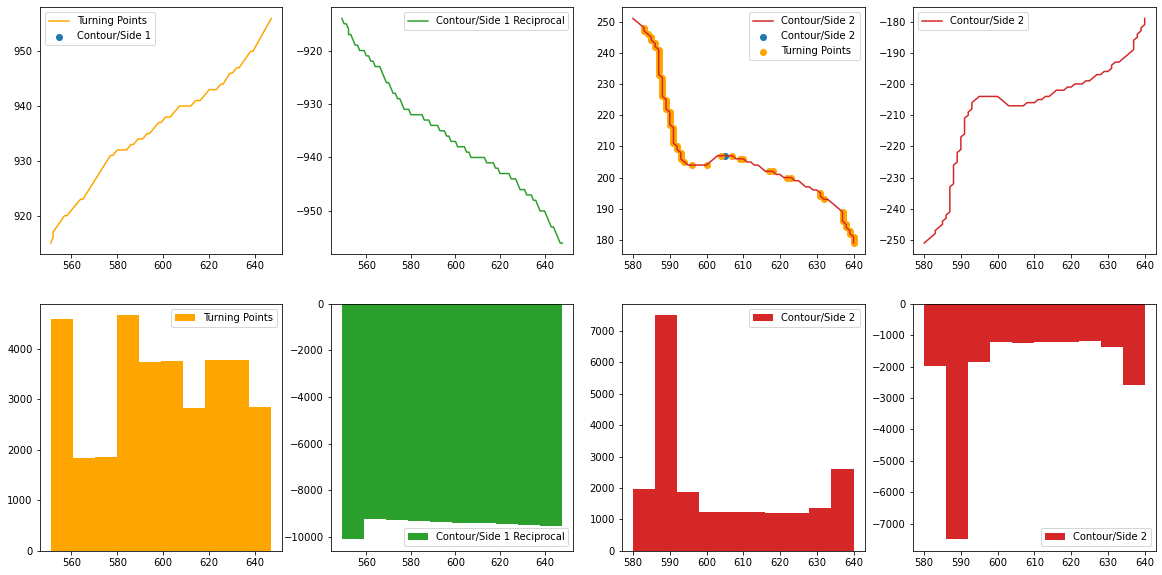

In [79]:
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
peaks_cont_1y, _ = find_peaks(np.array(cont_1_y))
dy = np.gradient(np.array(cont_1_y),np.array(cont_1_x))
zero_crossings = np.where(np.diff(np.sign(dy)))[0]
peaks_cont_2y, _ = find_peaks(np.array(cont_2_y))
dy2 = np.gradient(np.array(cont_2_y),np.array(cont_2_x))
zero_crossings2 = np.where(np.diff(np.sign(dy2)))[0]
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
# plt.plot(np.array(cont_1_x),np.array(cont_1_y), color = 'tab:green', label = "Contour/Side 1")
# plt.scatter(np.array(cont_1_x)[peaks_cont_1y],np.array(cont_1_y)[peaks_cont_1y], color = 'tab:blue', label = "Contour/Side 1")
plt.plot(np.array(cont_1_x)[zero_crossings], np.array(cont_1_y)[zero_crossings],label="Turning Points", color="orange")
peaks_cont_1y, _ = find_peaks(np.array(cont_1_y)[zero_crossings])
plt.scatter(np.array(cont_1_x)[peaks_cont_1y],np.array(cont_1_y)[peaks_cont_1y], color = 'tab:blue', label = "Contour/Side 1")
plt.legend()
plt.subplot(2,4,2)
plt.plot(np.array(cont_1_x),np.array(cont_1_y)*-1, color = 'tab:green', label = "Contour/Side 1 Reciprocal")
plt.legend()
plt.subplot(2,4,3)
plt.plot(cont_2_x,cont_2_y, color = 'tab:red',label = "Contour/Side 2")
plt.scatter(np.array(cont_2_x)[peaks_cont_2y],np.array(cont_2_y)[peaks_cont_2y], color = 'tab:blue', label = "Contour/Side 2")
plt.scatter(np.array(cont_2_x)[zero_crossings2], np.array(cont_2_y)[zero_crossings2],label="Turning Points", color="orange")
plt.legend()
plt.subplot(2,4,4)
plt.plot(np.array(cont_2_x),np.array(cont_2_y)*-1, color = 'tab:red',label = "Contour/Side 2")
plt.legend()

# HISTOGRAMS
plt.subplot(2,4,5)
plt.hist(x = np.array(cont_1_x)[zero_crossings], weights = np.array(cont_1_y)[zero_crossings], label="Turning Points", color="orange")
peaks_cont_1y, _ = find_peaks(np.array(cont_1_y)[zero_crossings])
# plt.scatter(np.array(cont_1_x)[peaks_cont_1y],np.array(cont_1_y)[peaks_cont_1y], color = 'tab:blue', label = "Contour/Side 1")
plt.legend()
plt.subplot(2,4,6)
plt.hist(x = np.array(cont_1_x),weights = np.array(cont_1_y)*-1, color = 'tab:green', label = "Contour/Side 1 Reciprocal")
plt.legend()
plt.subplot(2,4,7)
plt.hist(x = cont_2_x,weights = cont_2_y, color = 'tab:red',label = "Contour/Side 2")
# plt.scatter(np.array(cont_2_x)[peaks_cont_2y],np.array(cont_2_y)[peaks_cont_2y], color = 'tab:blue', label = "Contour/Side 2")
# plt.scatter(np.array(cont_2_x)[zero_crossings2], np.array(cont_2_y)[zero_crossings2],label="Turning Points", color="orange")
plt.legend()
plt.subplot(2,4,8)
plt.hist(x = np.array(cont_2_x),weights = np.array(cont_2_y)*-1, color = 'tab:red',label = "Contour/Side 2")
plt.legend()

plt.show()

c:\Users\lkrow\anaconda3\envs\Warren_Lab\lib\site-packages\seaborn\distributions.py:416: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)
c:\Users\lkrow\anaconda3\envs\Warren_Lab\lib\site-packages\seaborn\distributions.py:416: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Count'>

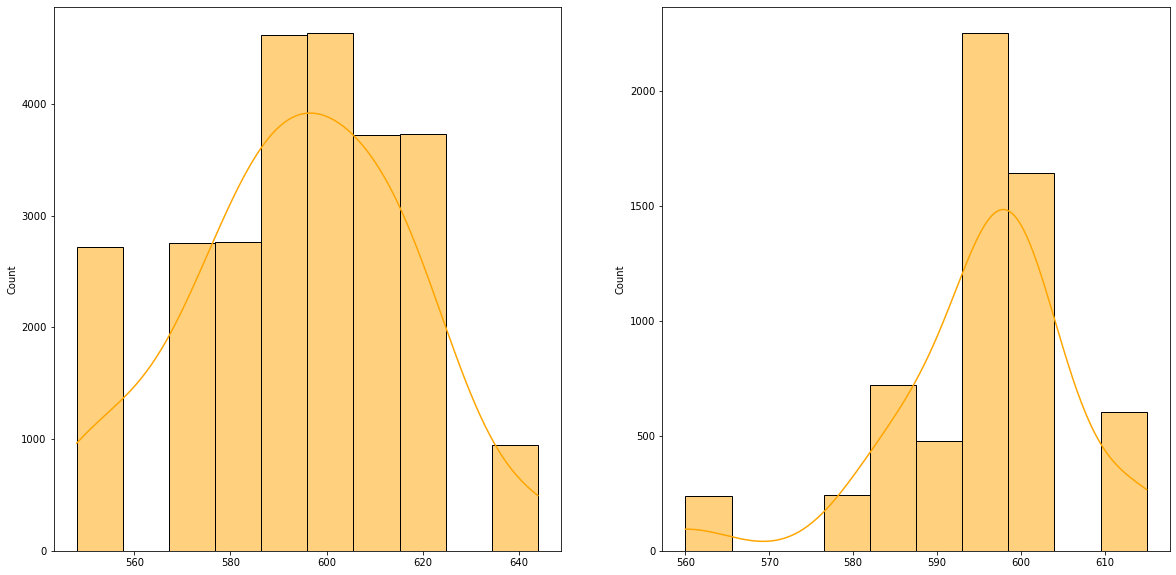

In [25]:
import seaborn as sns
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.histplot(x = np.array(cont_1_x)[zero_crossings], weights = np.array(cont_1_y)[zero_crossings], label="Turning Points", color="orange",kde = True)
plt.subplot(1,2,2)
sns.histplot(x = np.array(cont_2_x)[zero_crossings], weights = np.array(cont_2_y)[zero_crossings],label="Turning Points", color="orange", kde = True )

## Attempt Gaussian Mixture Modelling

In [26]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Example data
data = np.concatenate([np.array(cont_2_x)[zero_crossings], np.array(cont_2_y)[zero_crossings]])

# Fit a Gaussian Mixture Model with two components
gmm = GaussianMixture(n_components=2).fit(data.reshape(-1, 1))

# Predict component membership for each data point
labels = gmm.predict(data.reshape(-1, 1))

# Check how many unique components there are
num_components = len(np.unique(labels))
print("Number of components:", num_components)

Number of components: 2


# Matrix Algebra


Mean contour method:
- generate training dataset this way as well


Dot product method looking at one side and then looking at the peaks where it indicates the direction towards the back...


Light weight NN method 

In [1]:
# Import Libraries
import sys
import os
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import cv2
import copy
import glob
import tkinter as tk
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
# plot_dir = os.path.join(current_dir,'plotting')
sys.path.append(current_dir)
# print(sys.path)
from lib.plotting import polarplot as polarplt# polar plotting module
from lib.parsing import basic_sections as bsc_sec # basic data parsing methods
from lib.parsing.data_range import find_startdata, find_enddata # setting start and end of analysis region 
from lib.parsing.exact_exp_groups import sub_exp_group  # more dataparsing methods
from lib.led_convert import get_LED_angle_in_rad
from lib.plotting.flyviz import get_contour_centroid, get_objectmask, get_fill_flymask, contour_hrz_matrix
from scipy import interpolate
from find_fly_angle.find_fly_anglev2 import *

/home/flyranch/pythonpackages/flyplot
Initialized Plotting Package
Initialized Parsing Package


In [2]:
# Path to Image Dataset
data = glob.glob('/media/flyranch/T7 Shield/magnotether_images/20240620/fly1m/20240620144524/*.png')

In [5]:
for f in range(len(data)):
# np.where(file.split('/')[-1].strip('.png') == 20240502125110_5669')
    if data[f].split('/')[-1].split('\\')[-1].strip('.png') == '20240620144524_9208':
        print(f)

7999


In [7]:
imgs = {}
import time
import glob
import random
def img_label(filename):
    """
    For each image we will need to ensure that the proper rotation is performed such that it is in the 
    top down rotation
    
    """
    fly_mask_orig, fly_mask_hrz,max_contour_hrz,centroid_hrz, body_axis_pt_0_hrz,body_axis_pt_1_hrz,angle_og,angle_rot= contour_hrz_matrix(filename)
# mask_fly_norot = get_objectmask(fly_mask_hrz,max_contour_hrz)
    mask_fly_rot = cv2.rotate(copy.deepcopy(fly_mask_hrz),cv2.ROTATE_180)
    dict_img ={
        "n": fly_mask_hrz,
        "r":mask_fly_rot
    }
#     for i in range(1):
    ## test various rotations (0 or 180)
    fig = plt.figure(figsize=(20,20))
    plt.subplot(1,3,1)
    plt.title("Original")
    plt.imshow(fly_mask_orig,cmap='gray')
    print(f"<< Original Angle: {np.rad2deg(angle_og)} >>")
    plt.subplot(1,3,2)
    plt.title("No Rotation")
    # print("No Rotation Angle:",np.rad2deg(angle))
    print(f"<< No Rotation Angle: {np.rad2deg(angle_og)} >>")
    plt.imshow(fly_mask_hrz,cmap='gray')
    plt.subplot(1,3,3)
    plt.title("Rotation")
    print(f"<< Rotation Angle: {np.rad2deg(angle_og)-180} >>")
    plt.imshow(mask_fly_rot,cmap='gray')
    plt.show()
    
    fly_up = input("Input the name of No Rotation or Rotation depending on which one display fly pointed up. ")
    mask_fly = dict_img[fly_up]
    
    return mask_fly

['/media/flyranch/T7 Shield/magnotether_images/20240620/fly1m/20240620144524/20240620144524_7547.png', '/media/flyranch/T7 Shield/magnotether_images/20240620/fly1m/20240620144524/20240620144524_7441.png', '/media/flyranch/T7 Shield/magnotether_images/20240620/fly1m/20240620144524/20240620144524_8808.png', '/media/flyranch/T7 Shield/magnotether_images/20240620/fly1m/20240620144524/20240620144524_8407.png', '/media/flyranch/T7 Shield/magnotether_images/20240620/fly1m/20240620144524/20240620144524_9020.png', '/media/flyranch/T7 Shield/magnotether_images/20240620/fly1m/20240620144524/20240620144524_8721.png', '/media/flyranch/T7 Shield/magnotether_images/20240620/fly1m/20240620144524/20240620144524_5965.png', '/media/flyranch/T7 Shield/magnotether_images/20240620/fly1m/20240620144524/20240620144524_4605.png', '/media/flyranch/T7 Shield/magnotether_images/20240620/fly1m/20240620144524/20240620144524_5380.png', '/media/flyranch/T7 Shield/magnotether_images/20240620/fly1m/20240620144524/20240

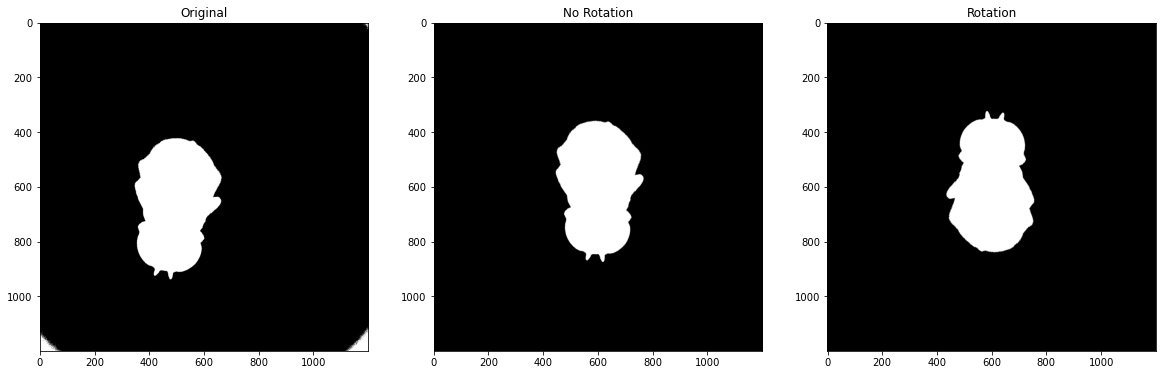

Input the name of No Rotation or Rotation depending on which one display fly pointed up. r
Angle Test!
Angle Value: 101.41024717270683
My Angle Value: 22.820494345413664
Angle Test!
Angle Value: 90.03532042490454
My Angle Value: 0.07064084980908092
<< Original Angle: 101.4102471727068 >>
<< No Rotation Angle: 101.4102471727068 >>
<< Rotation Angle: -78.5897528272932 >>


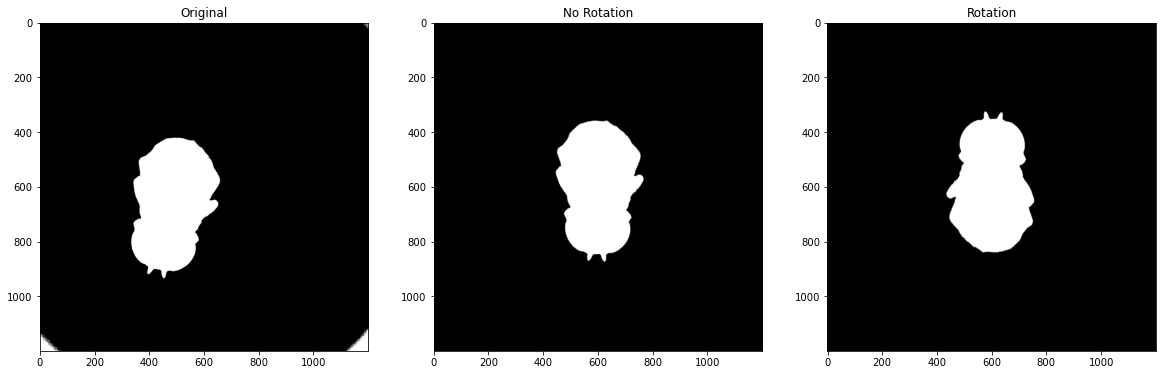

Input the name of No Rotation or Rotation depending on which one display fly pointed up. r
Angle Test!
Angle Value: 119.94886641511421
My Angle Value: 59.897732830228406
Angle Test!
Angle Value: 89.95988926124582
My Angle Value: 359.91977852249164
<< Original Angle: 119.94886641511421 >>
<< No Rotation Angle: 119.94886641511421 >>
<< Rotation Angle: -60.05113358488579 >>


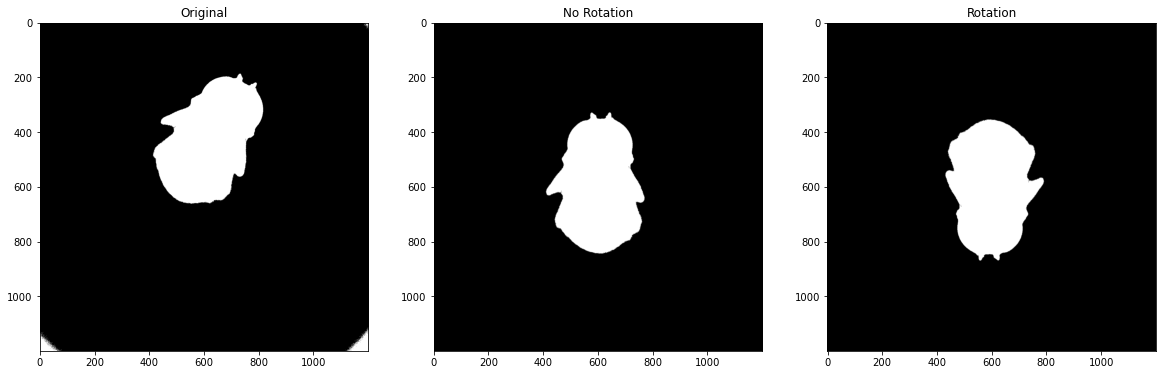

Input the name of No Rotation or Rotation depending on which one display fly pointed up. n
Angle Test!
Angle Value: 71.4988348932363
My Angle Value: 322.9976697864726
Angle Test!
Angle Value: 90.04925248602798
My Angle Value: 0.09850497205593456
<< Original Angle: 71.49883489323629 >>
<< No Rotation Angle: 71.49883489323629 >>
<< Rotation Angle: -108.50116510676371 >>


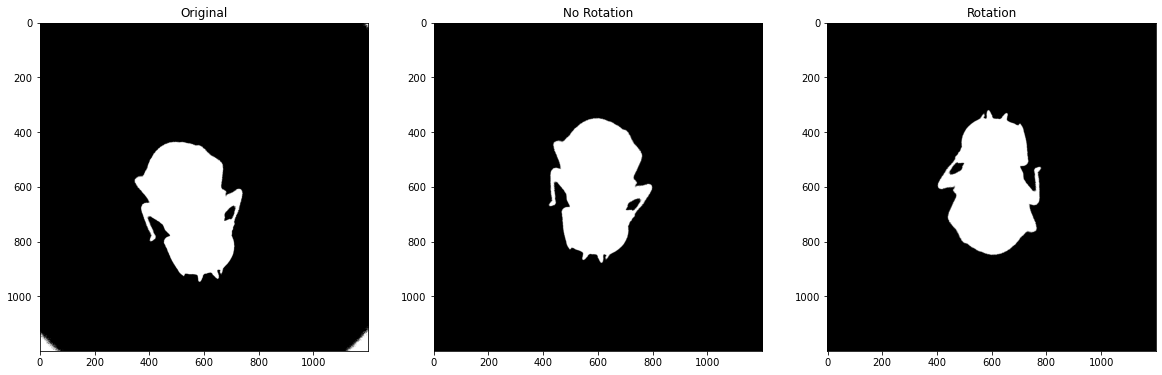

Input the name of No Rotation or Rotation depending on which one display fly pointed up. r
Angle Test!
Angle Value: 128.41318449229718
My Angle Value: 76.82636898459431
Angle Test!
Angle Value: 89.97453750381096
My Angle Value: 359.9490750076219
<< Original Angle: 128.41318449229718 >>
<< No Rotation Angle: 128.41318449229718 >>
<< Rotation Angle: -51.58681550770282 >>


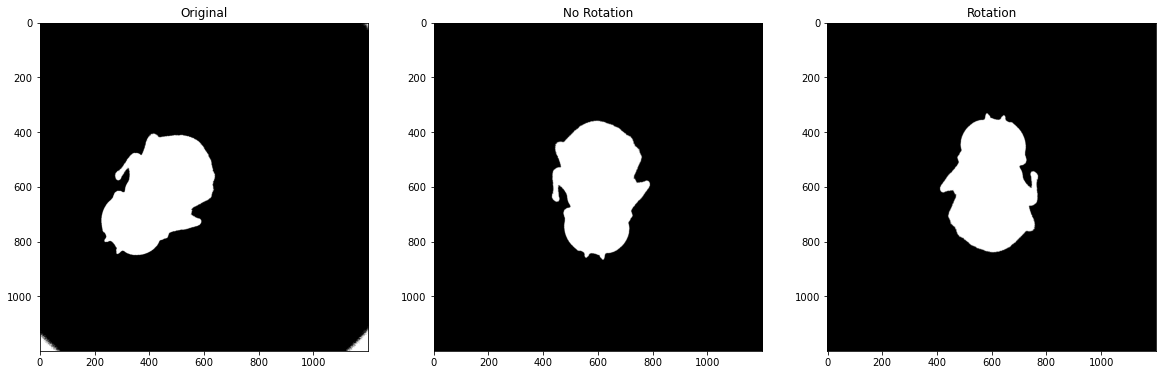

Input the name of No Rotation or Rotation depending on which one display fly pointed up. r
Angle Test!
Angle Value: 73.24026945617278
My Angle Value: 326.48053891234554
Angle Test!
Angle Value: 89.98603376427484
My Angle Value: 359.9720675285497
<< Original Angle: 73.24026945617281 >>
<< No Rotation Angle: 73.24026945617281 >>
<< Rotation Angle: -106.75973054382719 >>


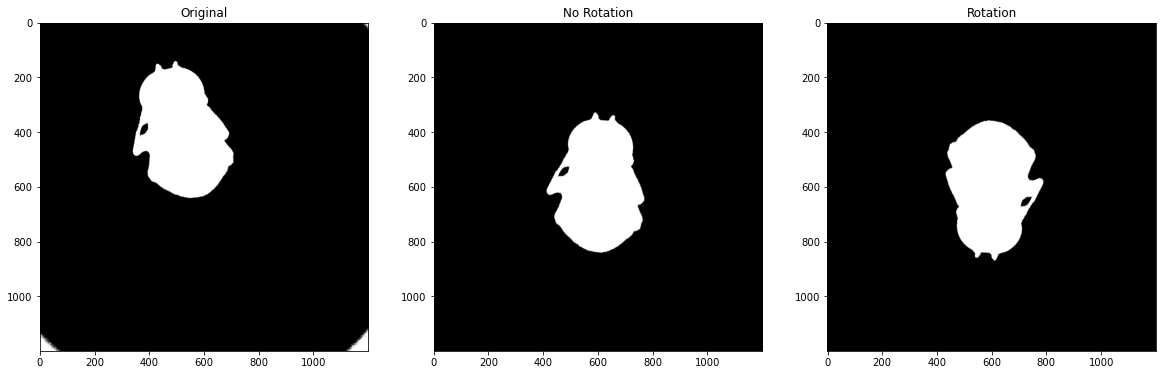

Input the name of No Rotation or Rotation depending on which one display fly pointed up. n
Angle Test!
Angle Value: 117.14001441402684
My Angle Value: 54.280028828053716
Angle Test!
Angle Value: 90.00335569656443
My Angle Value: 0.006711393128824739
<< Original Angle: 117.14001441402684 >>
<< No Rotation Angle: 117.14001441402684 >>
<< Rotation Angle: -62.85998558597316 >>


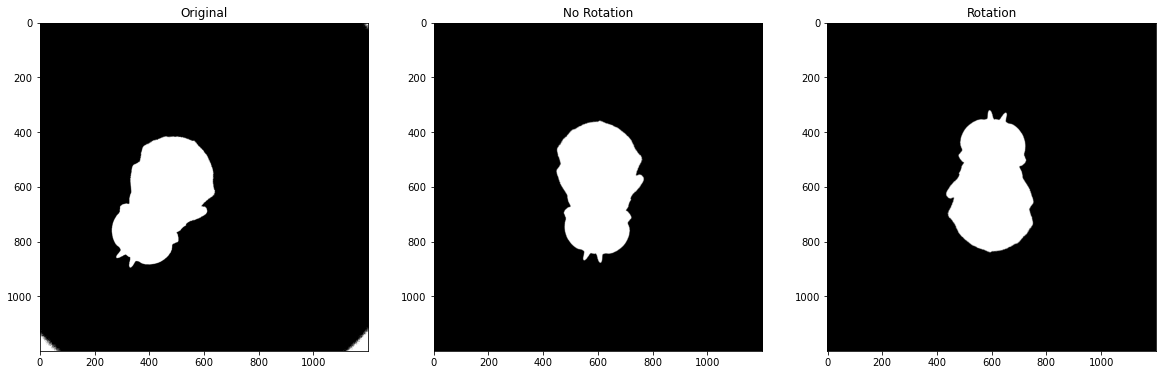

Input the name of No Rotation or Rotation depending on which one display fly pointed up. r
Angle Test!
Angle Value: 94.29893724052879
My Angle Value: 8.597874481057545
Angle Test!
Angle Value: 90.06398371603471
My Angle Value: 0.1279674320694255
<< Original Angle: 94.29893724052879 >>
<< No Rotation Angle: 94.29893724052879 >>
<< Rotation Angle: -85.70106275947121 >>


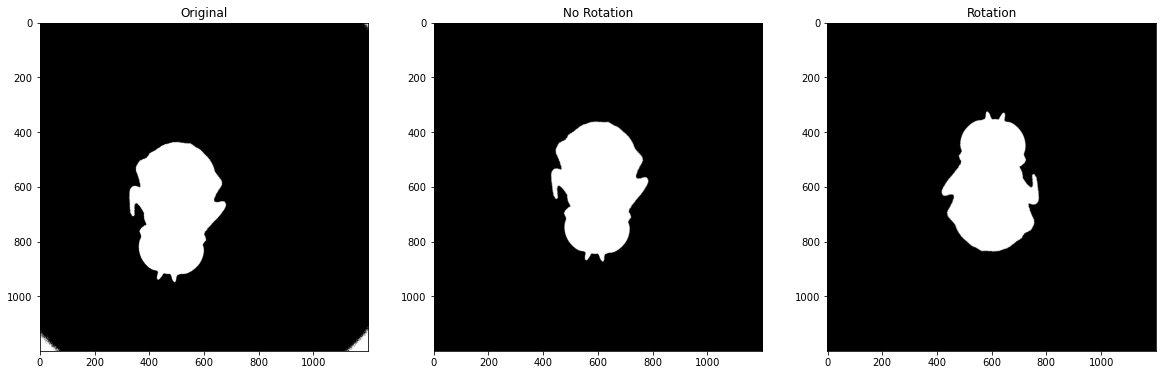

Input the name of No Rotation or Rotation depending on which one display fly pointed up. r
Angle Test!
Angle Value: 142.39740010234638
My Angle Value: 104.79480020469272
Angle Test!
Angle Value: 89.98487936544464
My Angle Value: 359.9697587308893
<< Original Angle: 142.39740010234638 >>
<< No Rotation Angle: 142.39740010234638 >>
<< Rotation Angle: -37.60259989765362 >>


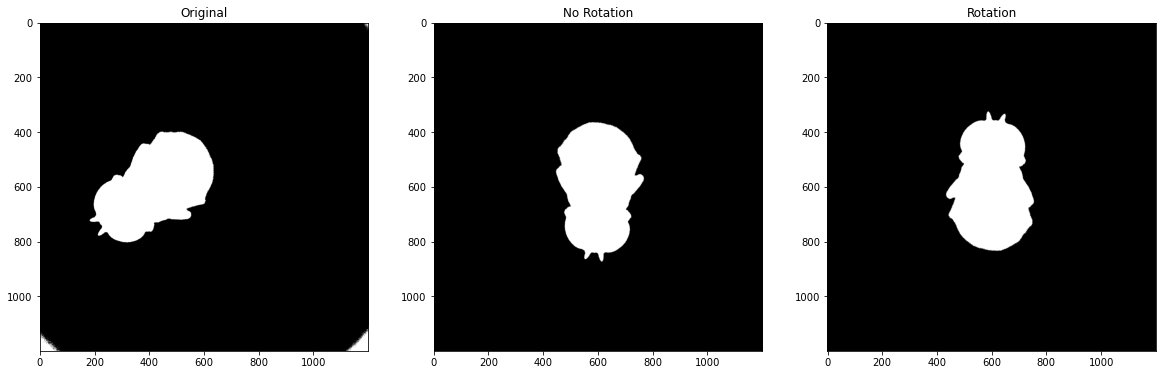

Input the name of No Rotation or Rotation depending on which one display fly pointed up. r
Angle Test!
Angle Value: 93.28922691974421
My Angle Value: 6.578453839488418
Angle Test!
Angle Value: 90.0298672811162
My Angle Value: 0.05973456223239282
<< Original Angle: 93.2892269197442 >>
<< No Rotation Angle: 93.2892269197442 >>
<< Rotation Angle: -86.7107730802558 >>


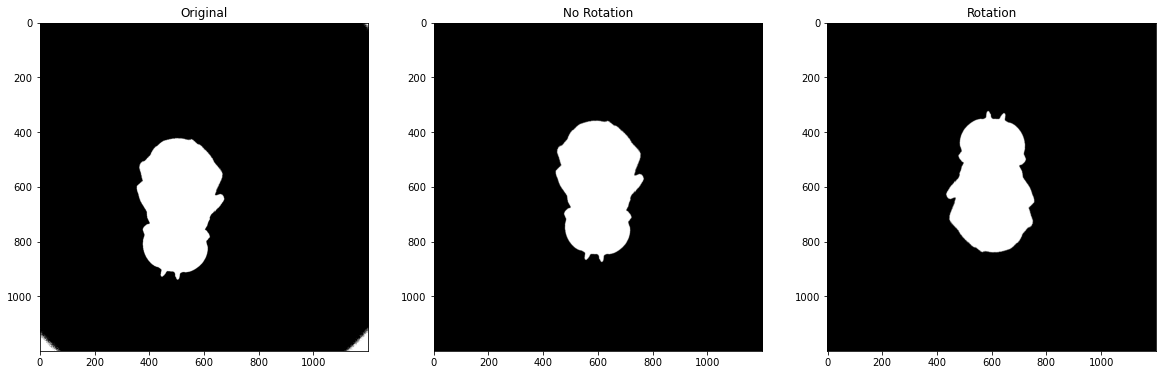

Input the name of No Rotation or Rotation depending on which one display fly pointed up. r
Angle Test!
Angle Value: 95.67642173087162
My Angle Value: 11.352843461743248
Angle Test!
Angle Value: 90.01565076474368
My Angle Value: 0.031301529487336666
<< Original Angle: 95.67642173087164 >>
<< No Rotation Angle: 95.67642173087164 >>
<< Rotation Angle: -84.32357826912836 >>


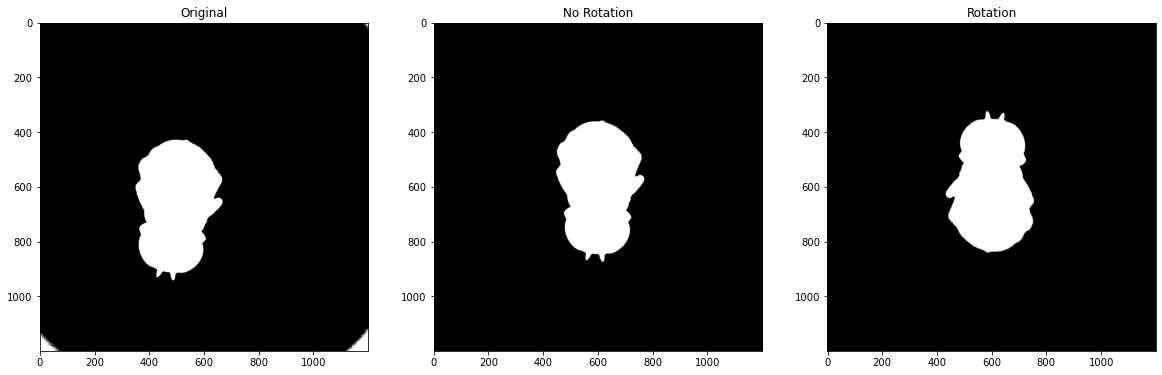

Input the name of No Rotation or Rotation depending on which one display fly pointed up. r
Angle Test!
Angle Value: 90.53649222853508
My Angle Value: 1.072984457070163
Angle Test!
Angle Value: 89.99720524834996
My Angle Value: 359.9944104966999
<< Original Angle: 90.53649222853505 >>
<< No Rotation Angle: 90.53649222853505 >>
<< Rotation Angle: -89.46350777146495 >>


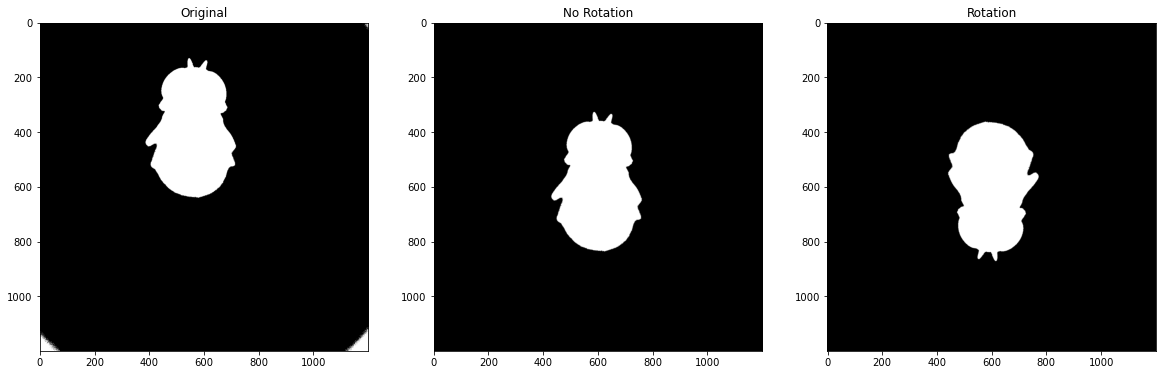

Input the name of No Rotation or Rotation depending on which one display fly pointed up. n
Angle Test!
Angle Value: 101.03291198178798
My Angle Value: 22.065823963575923
Angle Test!
Angle Value: 89.9311308591299
My Angle Value: 359.8622617182598
<< Original Angle: 101.03291198178798 >>
<< No Rotation Angle: 101.03291198178798 >>
<< Rotation Angle: -78.96708801821202 >>


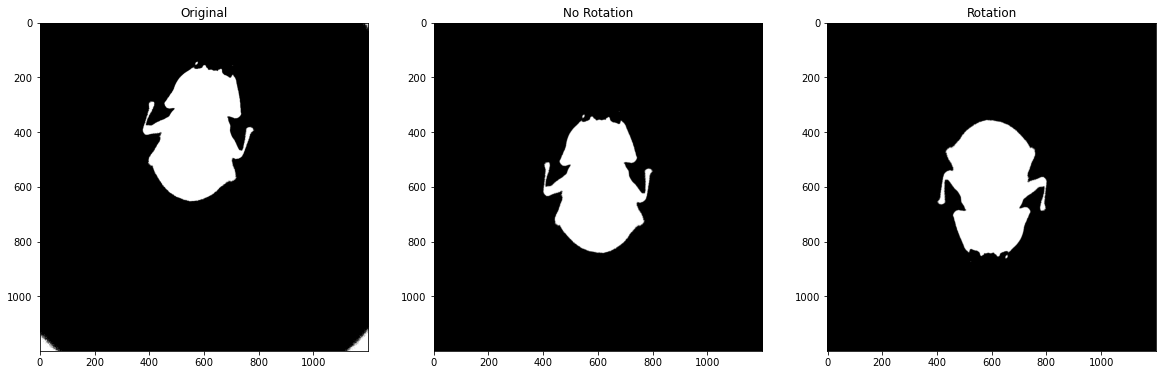

Input the name of No Rotation or Rotation depending on which one display fly pointed up. n
Angle Test!
Angle Value: 107.85049998305504
My Angle Value: 35.70099996611006
Angle Test!
Angle Value: 89.9603534682787
My Angle Value: 359.9207069365574
<< Original Angle: 107.85049998305503 >>
<< No Rotation Angle: 107.85049998305503 >>
<< Rotation Angle: -72.14950001694497 >>


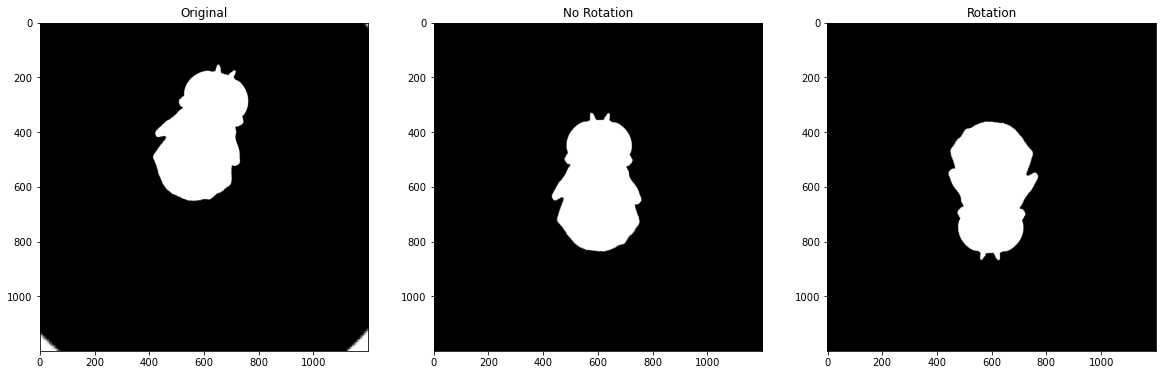

Input the name of No Rotation or Rotation depending on which one display fly pointed up. n
Angle Test!
Angle Value: 98.03163180057312
My Angle Value: 16.063263601146218
Angle Test!
Angle Value: 90.03559934851718
My Angle Value: 0.07119869703433324
<< Original Angle: 98.03163180057311 >>
<< No Rotation Angle: 98.03163180057311 >>
<< Rotation Angle: -81.96836819942689 >>


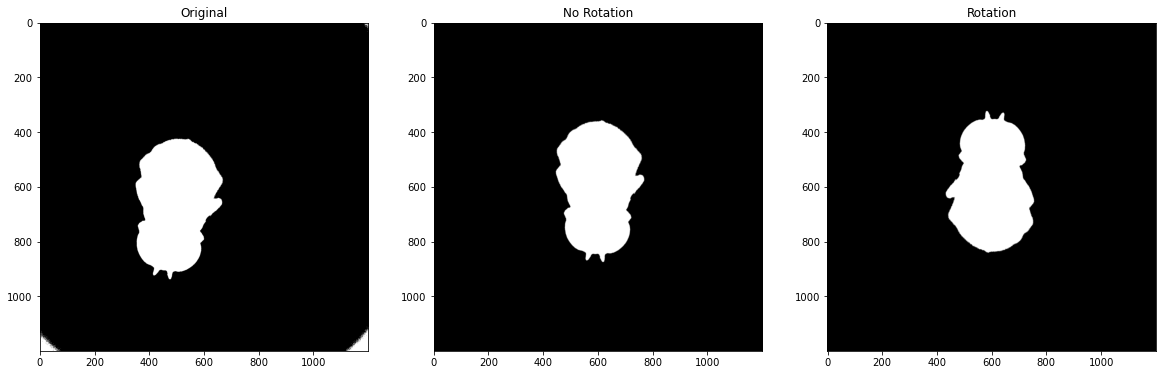

Input the name of No Rotation or Rotation depending on which one display fly pointed up. r
Angle Test!
Angle Value: 94.01321141587273
My Angle Value: 8.026422831745435
Angle Test!
Angle Value: 90.0113122241976
My Angle Value: 0.02262444839519162
<< Original Angle: 94.01321141587275 >>
<< No Rotation Angle: 94.01321141587275 >>
<< Rotation Angle: -85.98678858412725 >>


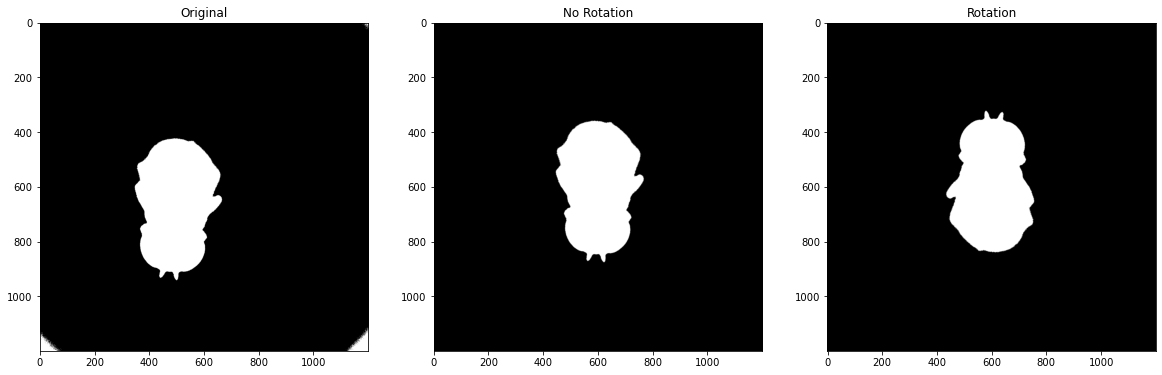

Input the name of No Rotation or Rotation depending on which one display fly pointed up. r
Angle Test!
Angle Value: 83.75592245938606
My Angle Value: 347.5118449187721
Angle Test!
Angle Value: 90.00960834270302
My Angle Value: 0.019216685406007628
<< Original Angle: 83.75592245938607 >>
<< No Rotation Angle: 83.75592245938607 >>
<< Rotation Angle: -96.24407754061393 >>


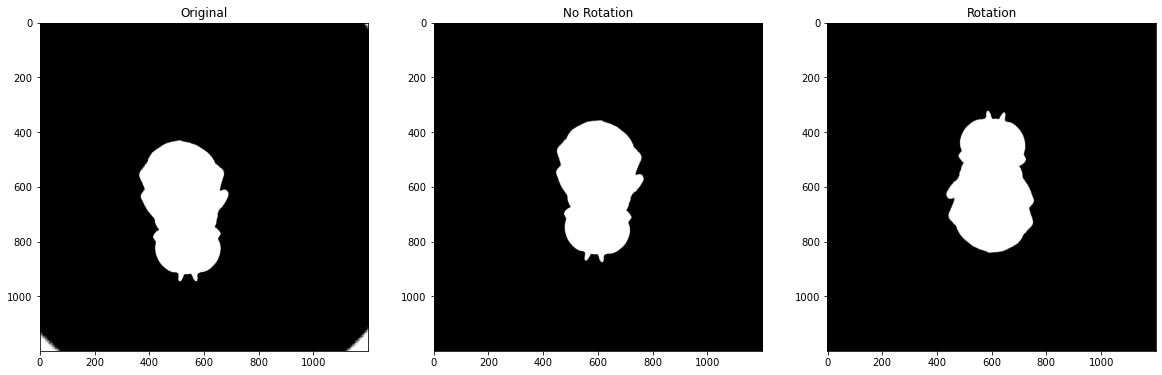

Input the name of No Rotation or Rotation depending on which one display fly pointed up. r
Angle Test!
Angle Value: 95.70363098349563
My Angle Value: 11.407261966991257
Angle Test!
Angle Value: 90.04305550615938
My Angle Value: 0.08611101231875296
<< Original Angle: 95.7036309834956 >>
<< No Rotation Angle: 95.7036309834956 >>
<< Rotation Angle: -84.2963690165044 >>


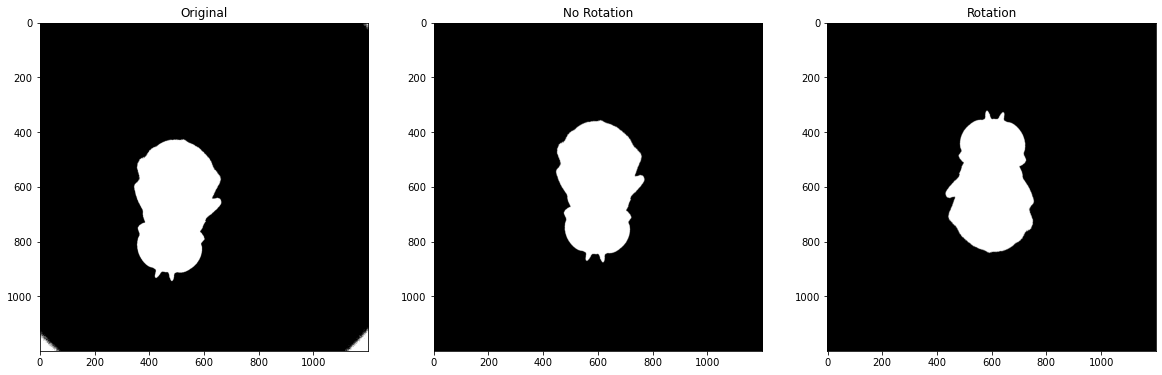

Input the name of No Rotation or Rotation depending on which one display fly pointed up. r
Angle Test!
Angle Value: 99.79078802891564
My Angle Value: 19.581576057831256
Angle Test!
Angle Value: 90.00185217191103
My Angle Value: 0.0037043438220507596
<< Original Angle: 99.79078802891563 >>
<< No Rotation Angle: 99.79078802891563 >>
<< Rotation Angle: -80.20921197108437 >>


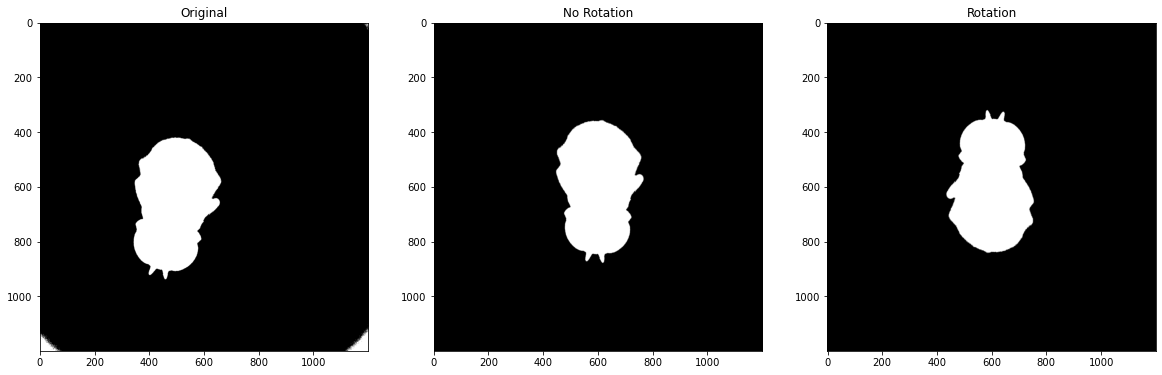

Input the name of No Rotation or Rotation depending on which one display fly pointed up. r
Angle Test!
Angle Value: 98.77188517537772
My Angle Value: 17.54377035075541
Angle Test!
Angle Value: 90.01628491863849
My Angle Value: 0.032569837276952285
<< Original Angle: 98.77188517537773 >>
<< No Rotation Angle: 98.77188517537773 >>
<< Rotation Angle: -81.22811482462227 >>


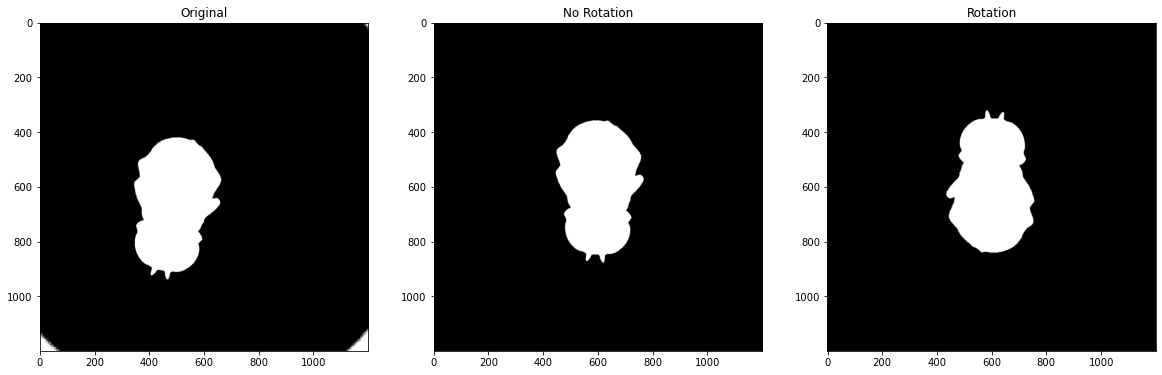

Input the name of No Rotation or Rotation depending on which one display fly pointed up. r


In [15]:
# get all of the files in the folder
# shuffled_list = sorted(glob.glob('/media/flyranch/T7 Shield/flyflipimgs/20240502125110/*.png'), key=lambda x: random.random())
shuffled_list = sorted(data, key=lambda x: random.random())
print(shuffled_list)
for file in shuffled_list[:20]:
    name = file.split('/')[-1].strip('.png')
    mask_fly = img_label(file)
    imgs[name] = mask_fly
    # execute function and then add these images and etc to the dictionary

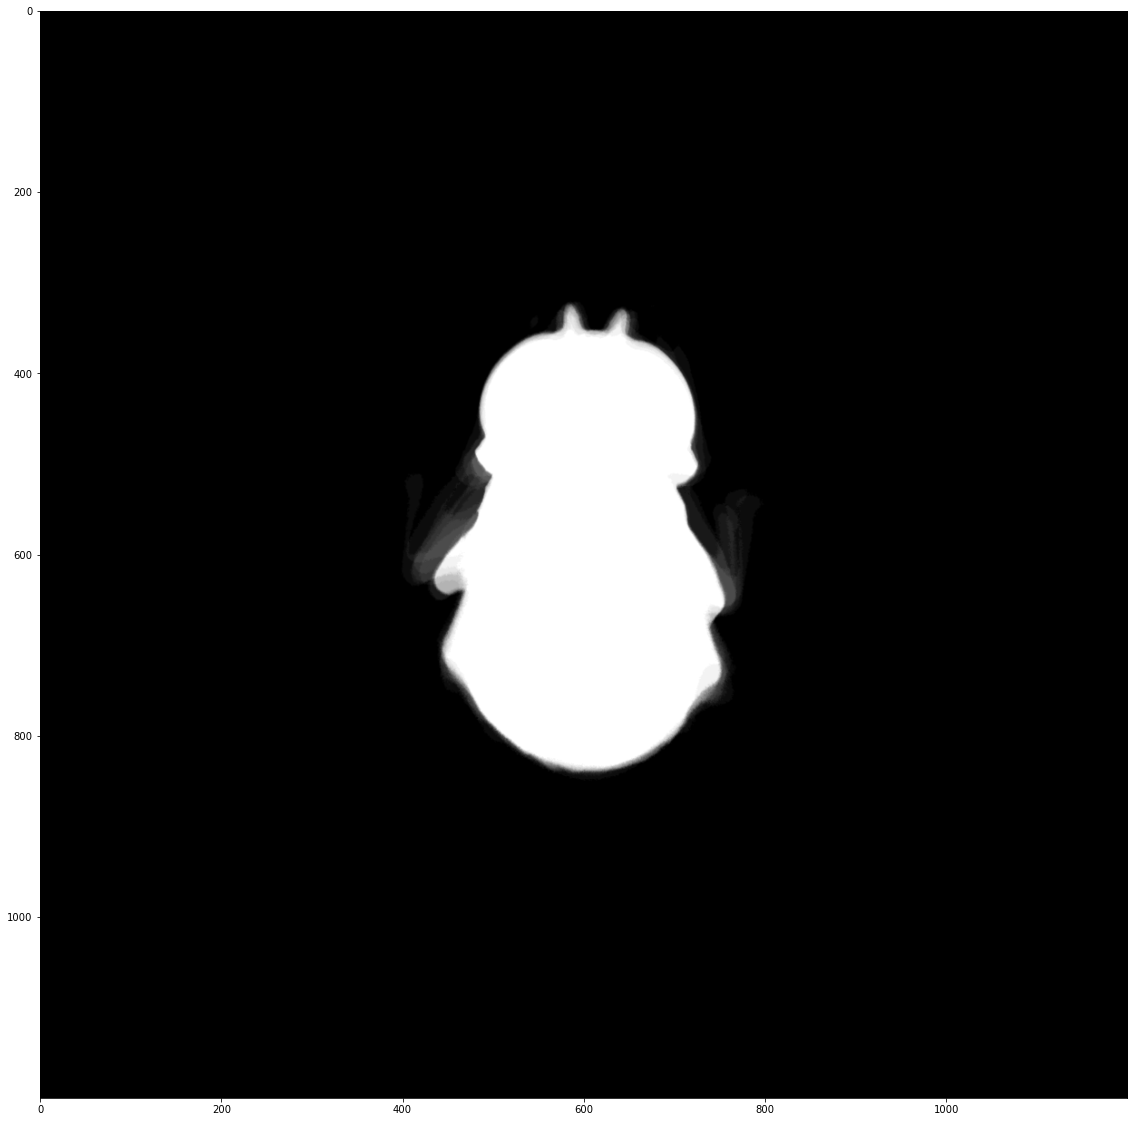

In [16]:
### Now with all the images we will create a mean tempate mask
final = []
for img in imgs.keys():
    final.append(imgs[img])
# print(final)
stacked = np.stack(final,axis=-1)
avg_mask = np.mean(stacked, axis = -1)
plt.figure(figsize=(20,20))
plt.imshow(avg_mask,cmap = 'gray')

In [17]:
## Comparison between two images
def mse(img1, img2):
    area_px = img1.shape[0]*img1.shape[1]
    px_diff = cv2.subtract(img1, img2)
    sum_err = np.sum(px_diff**2)
    mse = sum_err/(float(area_px))
    return mse
def data_mse(data):
    data_results = {
        "file":[],
        "type":[],
        "MSE":[]
    }
    for file in data:
        name = file.split('/')[-1].strip('.png')
        mask_fly = contour_hrz_matrix(file)[0].astype(float)
        ## No Rotation or Rotation
        d = {
            "MSE No Rotation":mse(avg_mask,mask_fly),
            "MSE Rotation": mse(avg_mask,cv2.rotate(mask_fly,cv2.ROTATE_180))
        }
        ## Save the min MSE Value
        data_results["file"].append(name)
        img_rot_type = list(d.keys())[list(d.values()).index(min(list(d.values())))]
        data_results['type'].append(img_rot_type)
        data_results["MSE"].append((d["MSE No Rotation"],d["MSE Rotation"])) # both MSE values...
    return data_results

In [18]:
results = data_mse(data)
results

Angle Test!
Angle Value: 60.49113524667891
My Angle Value: 300.9822704933578
Angle Test!
Angle Value: 89.81668128816537
My Angle Value: 359.63336257633074
Angle Test!
Angle Value: 119.21408489902431
My Angle Value: 58.428169798048614
Angle Test!
Angle Value: 89.87437261563522
My Angle Value: 359.74874523127045
Angle Test!
Angle Value: 72.39427593549493
My Angle Value: 324.78855187098986
Angle Test!
Angle Value: 89.87409128534934
My Angle Value: 359.74818257069865
Angle Test!
Angle Value: -154.3608808859445
My Angle Value: 231.278238228111
Angle Test!
Angle Value: 89.99734238883744
My Angle Value: 359.9946847776749
Angle Test!
Angle Value: 179.49441147574206
My Angle Value: 178.9888229514841
Angle Test!
Angle Value: 89.86575038457138
My Angle Value: 359.73150076914277
Angle Test!
Angle Value: 146.31524096441595
My Angle Value: 112.63048192883188
Angle Test!
Angle Value: 89.88128727728538
My Angle Value: 359.76257455457073
Angle Test!
Angle Value: 98.90774707571377
My Angle Value: 17.815

Angle Test!
Angle Value: 70.13610308665444
My Angle Value: 320.27220617330886
Angle Test!
Angle Value: 90.00504570960803
My Angle Value: 0.010091419216053055
Angle Test!
Angle Value: 56.86473332882514
My Angle Value: 293.7294666576503
Angle Test!
Angle Value: 90.02055809686581
My Angle Value: 0.04111619373162512
Angle Test!
Angle Value: -146.36618169588013
My Angle Value: 247.2676366082398
Angle Test!
Angle Value: 89.98766193025034
My Angle Value: 359.9753238605007
Angle Test!
Angle Value: 170.05202772191004
My Angle Value: 160.10405544382007
Angle Test!
Angle Value: 89.94062801541969
My Angle Value: 359.8812560308394
Angle Test!
Angle Value: 143.83362396218024
My Angle Value: 107.66724792436045
Angle Test!
Angle Value: 89.98519078874753
My Angle Value: 359.97038157749506
Angle Test!
Angle Value: 150.01805407283612
My Angle Value: 120.03610814567222
Angle Test!
Angle Value: 90.00323800786126
My Angle Value: 0.006476015722483908
Angle Test!
Angle Value: 146.4918836634163
My Angle Value:

Angle Test!
Angle Value: 90.03083567744224
My Angle Value: 0.06167135488445297
Angle Test!
Angle Value: 53.0831407849034
My Angle Value: 286.1662815698068
Angle Test!
Angle Value: 89.9924448856504
My Angle Value: 359.9848897713008
Angle Test!
Angle Value: 103.06493287314439
My Angle Value: 26.129865746288772
Angle Test!
Angle Value: 89.87364340740432
My Angle Value: 359.7472868148086
Angle Test!
Angle Value: 100.29128707856889
My Angle Value: 20.582574157137742
Angle Test!
Angle Value: 89.7764008886984
My Angle Value: 359.5528017773968
Angle Test!
Angle Value: 99.11201266794423
My Angle Value: 18.224025335888456
Angle Test!
Angle Value: 89.92271813316678
My Angle Value: 359.84543626633354
Angle Test!
Angle Value: 106.62639543456181
My Angle Value: 33.25279086912363
Angle Test!
Angle Value: 89.98723120891755
My Angle Value: 359.97446241783507
Angle Test!
Angle Value: 106.586058064528
My Angle Value: 33.17211612905601
Angle Test!
Angle Value: 89.95013287250994
My Angle Value: 359.9002657

Angle Test!
Angle Value: 110.97025790918406
My Angle Value: 41.94051581836811
Angle Test!
Angle Value: 90.00297460437733
My Angle Value: 0.00594920875465732
Angle Test!
Angle Value: 107.65841935861701
My Angle Value: 35.31683871723399
Angle Test!
Angle Value: 90.01487223691916
My Angle Value: 0.02974447383829215
Angle Test!
Angle Value: 108.8098008407652
My Angle Value: 37.61960168153041
Angle Test!
Angle Value: 90.00730730398318
My Angle Value: 0.014614607966365156
Angle Test!
Angle Value: 109.14162720415506
My Angle Value: 38.283254408310114
Angle Test!
Angle Value: 89.96732254604645
My Angle Value: 359.93464509209286
Angle Test!
Angle Value: 110.08007212247146
My Angle Value: 40.16014424494293
Angle Test!
Angle Value: 89.9721471694401
My Angle Value: 359.94429433888024
Angle Test!
Angle Value: 107.31686795160323
My Angle Value: 34.63373590320646
Angle Test!
Angle Value: 90.00770028732569
My Angle Value: 0.015400574651351917
Angle Test!
Angle Value: 110.47336791747479
My Angle Value:

Angle Test!
Angle Value: 99.52798865220645
My Angle Value: 19.05597730441289
Angle Test!
Angle Value: 89.99750720866956
My Angle Value: 359.9950144173391
Angle Test!
Angle Value: 98.2974993066171
My Angle Value: 16.594998613234196
Angle Test!
Angle Value: 90.00895013279388
My Angle Value: 0.01790026558776958
Angle Test!
Angle Value: 99.45153410617209
My Angle Value: 18.90306821234418
Angle Test!
Angle Value: 89.99525357086509
My Angle Value: 359.9905071417302
Angle Test!
Angle Value: 100.3182602818745
My Angle Value: 20.636520563748974
Angle Test!
Angle Value: 90.00859981920138
My Angle Value: 0.017199638402757955
Angle Test!
Angle Value: 101.45296465588261
My Angle Value: 22.90592931176522
Angle Test!
Angle Value: 90.00767754062875
My Angle Value: 0.015355081257496295
Angle Test!
Angle Value: 98.58705874336259
My Angle Value: 17.17411748672515
Angle Test!
Angle Value: 89.99906115520726
My Angle Value: 359.9981223104145
Angle Test!
Angle Value: 99.09210897760683
My Angle Value: 18.1842

Angle Test!
Angle Value: 90.0393416514149
My Angle Value: 0.07868330282980196
Angle Test!
Angle Value: -169.51498449022816
My Angle Value: 200.9700310195437
Angle Test!
Angle Value: 89.96891460696811
My Angle Value: 359.9378292139362
Angle Test!
Angle Value: -166.36940583371035
My Angle Value: 207.2611883325793
Angle Test!
Angle Value: 90.0164304630347
My Angle Value: 0.032860926069361085
Angle Test!
Angle Value: -158.36925405955478
My Angle Value: 223.2614918808905
Angle Test!
Angle Value: 90.03483467841153
My Angle Value: 0.06966935682305575
Angle Test!
Angle Value: -156.98166185563045
My Angle Value: 226.03667628873913
Angle Test!
Angle Value: 89.99402284354021
My Angle Value: 359.98804568708044
Angle Test!
Angle Value: -159.11628521758743
My Angle Value: 221.76742956482514
Angle Test!
Angle Value: 90.00229977154828
My Angle Value: 0.00459954309656041
Angle Test!
Angle Value: -159.99139269837332
My Angle Value: 220.01721460325336
Angle Test!
Angle Value: 90.00712750199384
My Angle V

Angle Test!
Angle Value: 78.31078553532207
My Angle Value: 336.6215710706441
Angle Test!
Angle Value: 89.31986078028586
My Angle Value: 358.63972156057173
Angle Test!
Angle Value: 77.90811289349763
My Angle Value: 335.81622578699523
Angle Test!
Angle Value: 90.45452728763732
My Angle Value: 0.9090545752746095
Angle Test!
Angle Value: 80.55523383386628
My Angle Value: 341.11046766773256
Angle Test!
Angle Value: 89.67665780346891
My Angle Value: 359.3533156069378
Angle Test!
Angle Value: 77.17146263041873
My Angle Value: 334.34292526083743
Angle Test!
Angle Value: 90.23920649718737
My Angle Value: 0.47841299437473594
Angle Test!
Angle Value: 79.31019647447265
My Angle Value: 338.6203929489453
Angle Test!
Angle Value: 90.55494870088238
My Angle Value: 1.1098974017647265
Angle Test!
Angle Value: 74.17540843614943
My Angle Value: 328.3508168722989
Angle Test!
Angle Value: 90.04521006335624
My Angle Value: 0.09042012671247335
Angle Test!
Angle Value: 71.96789613090344
My Angle Value: 323.935

Angle Test!
Angle Value: 90.10709264300046
My Angle Value: 0.21418528600088393
Angle Test!
Angle Value: 77.18600011757893
My Angle Value: 334.3720002351579
Angle Test!
Angle Value: 89.88699882036406
My Angle Value: 359.7739976407281
Angle Test!
Angle Value: 77.13551790054412
My Angle Value: 334.27103580108826
Angle Test!
Angle Value: 89.87416301200552
My Angle Value: 359.748326024011
Angle Test!
Angle Value: 76.60187329708529
My Angle Value: 333.2037465941706
Angle Test!
Angle Value: 90.02492180096733
My Angle Value: 0.04984360193463999
Angle Test!
Angle Value: 76.44407036919054
My Angle Value: 332.8881407383811
Angle Test!
Angle Value: 90.02987073751372
My Angle Value: 0.05974147502743676
Angle Test!
Angle Value: 76.48493550574361
My Angle Value: 332.9698710114872
Angle Test!
Angle Value: 90.05740712235004
My Angle Value: 0.11481424470005663
Angle Test!
Angle Value: 76.499377893864
My Angle Value: 332.998755787728
Angle Test!
Angle Value: 90.0278792895744
My Angle Value: 0.05575857914

Angle Test!
Angle Value: 90.04651854491736
My Angle Value: 0.09303708983472347
Angle Test!
Angle Value: 49.04522136937089
My Angle Value: 278.0904427387418
Angle Test!
Angle Value: 90.00554267546916
My Angle Value: 0.011085350938287775
Angle Test!
Angle Value: 52.38588855880918
My Angle Value: 284.77177711761834
Angle Test!
Angle Value: 89.96899777238303
My Angle Value: 359.93799554476607
Angle Test!
Angle Value: 54.84167002398957
My Angle Value: 289.68334004797913
Angle Test!
Angle Value: 90.02604197065946
My Angle Value: 0.05208394131892646
Angle Test!
Angle Value: 57.56731122298056
My Angle Value: 295.1346224459611
Angle Test!
Angle Value: 89.98223898491086
My Angle Value: 359.9644779698217
Angle Test!
Angle Value: 55.05870001295798
My Angle Value: 290.11740002591597
Angle Test!
Angle Value: 90.10743224271278
My Angle Value: 0.2148644854255224
Angle Test!
Angle Value: 55.564737976448
My Angle Value: 291.129475952896
Angle Test!
Angle Value: 90.15391300203592
My Angle Value: 0.307826

Angle Test!
Angle Value: 90.37348909859708
My Angle Value: 0.7469781971941245
Angle Test!
Angle Value: 71.54506617889314
My Angle Value: 323.0901323577863
Angle Test!
Angle Value: 90.13449069529794
My Angle Value: 0.26898139059585446
Angle Test!
Angle Value: -141.51755989223568
My Angle Value: 256.96488021552864
Angle Test!
Angle Value: 90.42837827279433
My Angle Value: 0.8567565455886665
Angle Test!
Angle Value: 66.94576484077818
My Angle Value: 313.89152968155634
Angle Test!
Angle Value: 89.75461069556155
My Angle Value: 359.5092213911231
Angle Test!
Angle Value: 95.53931561272846
My Angle Value: 11.078631225456945
Angle Test!
Angle Value: 89.98705016907623
My Angle Value: 359.9741003381524
Angle Test!
Angle Value: 95.25646750124005
My Angle Value: 10.512935002480077
Angle Test!
Angle Value: 90.03971382197912
My Angle Value: 0.079427643958212
Angle Test!
Angle Value: 93.71977406601685
My Angle Value: 7.439548132033707
Angle Test!
Angle Value: 89.89933275307276
My Angle Value: 359.798

Angle Test!
Angle Value: 89.99545669858811
My Angle Value: 359.9909133971762
Angle Test!
Angle Value: 93.84006671257077
My Angle Value: 7.680133425141548
Angle Test!
Angle Value: 89.9774599186666
My Angle Value: 359.9549198373332
Angle Test!
Angle Value: 94.76952192318923
My Angle Value: 9.539043846378462
Angle Test!
Angle Value: 89.9843245145342
My Angle Value: 359.9686490290684
Angle Test!
Angle Value: 92.8635225735472
My Angle Value: 5.727045147094401
Angle Test!
Angle Value: 89.9768384932557
My Angle Value: 359.95367698651137
Angle Test!
Angle Value: 94.21194991980333
My Angle Value: 8.423899839606634
Angle Test!
Angle Value: 90.01589861321756
My Angle Value: 0.03179722643508853
Angle Test!
Angle Value: 92.2096888956408
My Angle Value: 4.41937779128159
Angle Test!
Angle Value: 89.95994027185544
My Angle Value: 359.91988054371086
Angle Test!
Angle Value: 92.3421817940215
My Angle Value: 4.684363588042999
Angle Test!
Angle Value: 89.93376404384726
My Angle Value: 359.8675280876945
An

Angle Test!
Angle Value: 135.9032551209758
My Angle Value: 91.80651024195164
Angle Test!
Angle Value: 89.99057015199652
My Angle Value: 359.981140303993
Angle Test!
Angle Value: 135.76924421462536
My Angle Value: 91.53848842925075
Angle Test!
Angle Value: 89.99020294352174
My Angle Value: 359.9804058870435
Angle Test!
Angle Value: 139.4598179771059
My Angle Value: 98.9196359542118
Angle Test!
Angle Value: 90.00178547186354
My Angle Value: 0.0035709437270554645
Angle Test!
Angle Value: 140.11720134230526
My Angle Value: 100.2344026846105
Angle Test!
Angle Value: 90.0618874162877
My Angle Value: 0.12377483257540689
Angle Test!
Angle Value: 137.9824116821871
My Angle Value: 95.96482336437415
Angle Test!
Angle Value: 89.9996662812226
My Angle Value: 359.9993325624452
Angle Test!
Angle Value: 140.7837177164435
My Angle Value: 101.56743543288701
Angle Test!
Angle Value: 90.00699224435884
My Angle Value: 0.013984488717682098
Angle Test!
Angle Value: 137.69176068264463
My Angle Value: 95.38352

Angle Test!
Angle Value: 90.0233353754072
My Angle Value: 0.04667075081439975
Angle Test!
Angle Value: 120.04136855230567
My Angle Value: 60.08273710461131
Angle Test!
Angle Value: 90.02230139379418
My Angle Value: 0.044602787588331694
Angle Test!
Angle Value: 121.49927253755322
My Angle Value: 62.99854507510645
Angle Test!
Angle Value: 89.99452269525545
My Angle Value: 359.9890453905109
Angle Test!
Angle Value: 120.44783460684869
My Angle Value: 60.895669213697374
Angle Test!
Angle Value: 90.00398221165439
My Angle Value: 0.007964423308777668
Angle Test!
Angle Value: 119.48848428967358
My Angle Value: 58.97696857934713
Angle Test!
Angle Value: 90.05931717498146
My Angle Value: 0.11863434996288902
Angle Test!
Angle Value: 119.63375908717843
My Angle Value: 59.26751817435685
Angle Test!
Angle Value: 89.98744922237486
My Angle Value: 359.9748984447497
Angle Test!
Angle Value: 119.65609230529583
My Angle Value: 59.31218461059163
Angle Test!
Angle Value: 90.01782668948235
My Angle Value: 0

Angle Test!
Angle Value: 100.81797673267047
My Angle Value: 21.635953465340947
Angle Test!
Angle Value: 89.9952237010483
My Angle Value: 359.9904474020966
Angle Test!
Angle Value: 100.06576185259948
My Angle Value: 20.13152370519896
Angle Test!
Angle Value: 90.04376822386138
My Angle Value: 0.08753644772272651
Angle Test!
Angle Value: 96.80355438211302
My Angle Value: 13.60710876422604
Angle Test!
Angle Value: 90.04540577285343
My Angle Value: 0.09081154570685612
Angle Test!
Angle Value: 96.77978911547946
My Angle Value: 13.55957823095892
Angle Test!
Angle Value: 90.01492266054771
My Angle Value: 0.02984532109539373
Angle Test!
Angle Value: 65.98325877935423
My Angle Value: 311.96651755870846
Angle Test!
Angle Value: 90.01578944408575
My Angle Value: 0.03157888817148091
Angle Test!
Angle Value: 64.0352010089782
My Angle Value: 308.07040201795644
Angle Test!
Angle Value: 90.02653593807425
My Angle Value: 0.05307187614846498
Angle Test!
Angle Value: 73.16848135569424
My Angle Value: 326.

Angle Test!
Angle Value: 102.83356930942571
My Angle Value: 25.667138618851396
Angle Test!
Angle Value: 89.99842158608412
My Angle Value: 359.99684317216827
Angle Test!
Angle Value: 103.90299004174514
My Angle Value: 27.805980083490283
Angle Test!
Angle Value: 90.03710000803912
My Angle Value: 0.07420001607826521
Angle Test!
Angle Value: 104.15753002331839
My Angle Value: 28.315060046636773
Angle Test!
Angle Value: 90.01621290415328
My Angle Value: 0.032425808306527415
Angle Test!
Angle Value: 104.71502918879371
My Angle Value: 29.430058377587386
Angle Test!
Angle Value: 90.01088269739066
My Angle Value: 0.021765394781283476
Angle Test!
Angle Value: 104.51805271440682
My Angle Value: 29.036105428813613
Angle Test!
Angle Value: 90.03625772643849
My Angle Value: 0.07251545287698491
Angle Test!
Angle Value: 101.4394988994064
My Angle Value: 22.878997798812776
Angle Test!
Angle Value: 90.04861742863687
My Angle Value: 0.09723485727374737
Angle Test!
Angle Value: 101.97802493444398
My Angle

Angle Test!
Angle Value: 91.82801049993118
My Angle Value: 3.6560209998623634
Angle Test!
Angle Value: 90.04589157301533
My Angle Value: 0.09178314603065019
Angle Test!
Angle Value: 92.59836391897693
My Angle Value: 5.196727837953858
Angle Test!
Angle Value: 90.01771029967804
My Angle Value: 0.035420599356058347
Angle Test!
Angle Value: 93.3772370938354
My Angle Value: 6.75447418767078
Angle Test!
Angle Value: 90.01704719415508
My Angle Value: 0.03409438831016587
Angle Test!
Angle Value: 98.36497101202333
My Angle Value: 16.729942024046665
Angle Test!
Angle Value: 90.0283545943787
My Angle Value: 0.05670918875739517
Angle Test!
Angle Value: 96.8083792610928
My Angle Value: 13.616758522185592
Angle Test!
Angle Value: 90.0470995992047
My Angle Value: 0.09419919840939883
Angle Test!
Angle Value: 96.748557363588
My Angle Value: 13.497114727175983
Angle Test!
Angle Value: 90.03099990682499
My Angle Value: 0.061999813649947555
Angle Test!
Angle Value: 94.66889031486514
My Angle Value: 9.3377

Angle Test!
Angle Value: -135.9291526970691
My Angle Value: 268.1416946058618
Angle Test!
Angle Value: 89.97799806590322
My Angle Value: 359.95599613180644
Angle Test!
Angle Value: 83.75032222323316
My Angle Value: 347.5006444464663
Angle Test!
Angle Value: 89.99531339105789
My Angle Value: 359.9906267821158
Angle Test!
Angle Value: 85.35245489438243
My Angle Value: 350.7049097887649
Angle Test!
Angle Value: 89.99852772763961
My Angle Value: 359.9970554552792
Angle Test!
Angle Value: 86.04049089843978
My Angle Value: 352.08098179687954
Angle Test!
Angle Value: 89.97000054055778
My Angle Value: 359.94000108111555
Angle Test!
Angle Value: 85.01547879694401
My Angle Value: 350.03095759388805
Angle Test!
Angle Value: 90.00917107551987
My Angle Value: 0.018342151039718146
Angle Test!
Angle Value: 81.42330437915724
My Angle Value: 342.84660875831446
Angle Test!
Angle Value: 89.97904528361028
My Angle Value: 359.95809056722055
Angle Test!
Angle Value: 83.5900124003203
My Angle Value: 347.1800

Angle Test!
Angle Value: -143.8435404980424
My Angle Value: 252.31291900391523
Angle Test!
Angle Value: 89.97098593904276
My Angle Value: 359.9419718780855
Angle Test!
Angle Value: -148.8769264351506
My Angle Value: 242.2461471296988
Angle Test!
Angle Value: 89.97142620135072
My Angle Value: 359.9428524027014
Angle Test!
Angle Value: -158.9598762641145
My Angle Value: 222.08024747177097
Angle Test!
Angle Value: 90.00487249021297
My Angle Value: 0.009744980425949734
Angle Test!
Angle Value: 111.6515154327969
My Angle Value: 43.3030308655938
Angle Test!
Angle Value: 89.99632314767827
My Angle Value: 359.9926462953565
Angle Test!
Angle Value: -154.08362456674593
My Angle Value: 231.83275086650818
Angle Test!
Angle Value: 89.96807603906775
My Angle Value: 359.9361520781355
Angle Test!
Angle Value: 102.73558378460869
My Angle Value: 25.471167569217357
Angle Test!
Angle Value: 89.99247372556366
My Angle Value: 359.9849474511273
Angle Test!
Angle Value: 57.98590945032867
My Angle Value: 295.9

Angle Test!
Angle Value: 158.57742693874312
My Angle Value: 137.1548538774862
Angle Test!
Angle Value: 89.8889803029723
My Angle Value: 359.7779606059446
Angle Test!
Angle Value: 71.7398857148531
My Angle Value: 323.4797714297062
Angle Test!
Angle Value: 89.9243741213898
My Angle Value: 359.8487482427796
Angle Test!
Angle Value: 121.80100361279071
My Angle Value: 63.60200722558139
Angle Test!
Angle Value: 89.91533810069618
My Angle Value: 359.83067620139235
Angle Test!
Angle Value: 163.56750104407695
My Angle Value: 147.1350020881539
Angle Test!
Angle Value: 89.94704923121934
My Angle Value: 359.8940984624387
Angle Test!
Angle Value: 96.65532181192395
My Angle Value: 13.310643623847938
Angle Test!
Angle Value: 90.07782276359237
My Angle Value: 0.15564552718475966
Angle Test!
Angle Value: -166.3342850876377
My Angle Value: 207.3314298247246
Angle Test!
Angle Value: 90.05446359851243
My Angle Value: 0.10892719702485465
Angle Test!
Angle Value: 94.28024217315505
My Angle Value: 8.56048434

Angle Test!
Angle Value: -157.12213049955903
My Angle Value: 225.75573900088193
Angle Test!
Angle Value: 89.98768497512782
My Angle Value: 359.97536995025564
Angle Test!
Angle Value: 59.8089510729866
My Angle Value: 299.6179021459732
Angle Test!
Angle Value: 90.01475888490103
My Angle Value: 0.029517769802055227
Angle Test!
Angle Value: 117.7041874922204
My Angle Value: 55.4083749844408
Angle Test!
Angle Value: 89.99086338531411
My Angle Value: 359.98172677062826
Angle Test!
Angle Value: 88.42832709178674
My Angle Value: 356.8566541835735
Angle Test!
Angle Value: 90.0145567057679
My Angle Value: 0.02911341153580338
Angle Test!
Angle Value: -165.29261626536098
My Angle Value: 209.41476746927805
Angle Test!
Angle Value: 90.00514510832006
My Angle Value: 0.01029021664010088
Angle Test!
Angle Value: 122.84181240753374
My Angle Value: 65.68362481506749
Angle Test!
Angle Value: 89.96966642766078
My Angle Value: 359.9393328553216
Angle Test!
Angle Value: 63.39292421875841
My Angle Value: 306.

Angle Test!
Angle Value: 104.94054621061733
My Angle Value: 29.881092421234626
Angle Test!
Angle Value: 89.9603303863616
My Angle Value: 359.9206607727232
Angle Test!
Angle Value: 105.42855654573808
My Angle Value: 30.857113091476123
Angle Test!
Angle Value: 89.95692323014767
My Angle Value: 359.9138464602953
Angle Test!
Angle Value: 105.77997544890988
My Angle Value: 31.559950897819732
Angle Test!
Angle Value: 90.00661677463458
My Angle Value: 0.013233549269131117
Angle Test!
Angle Value: 108.29024112032513
My Angle Value: 36.58048224065024
Angle Test!
Angle Value: 90.00328473534125
My Angle Value: 0.006569470682507017
Angle Test!
Angle Value: 110.40944972990847
My Angle Value: 40.81889945981695
Angle Test!
Angle Value: 89.99700003273111
My Angle Value: 359.9940000654622
Angle Test!
Angle Value: 106.20095215105266
My Angle Value: 32.40190430210532
Angle Test!
Angle Value: 90.05637789585363
My Angle Value: 0.11275579170722949
Angle Test!
Angle Value: 106.63733408920493
My Angle Value: 

Angle Test!
Angle Value: 104.86439693325562
My Angle Value: 29.72879386651124
Angle Test!
Angle Value: 89.99411476259323
My Angle Value: 359.98822952518645
Angle Test!
Angle Value: 102.94893251976468
My Angle Value: 25.897865039529364
Angle Test!
Angle Value: 89.98937153102021
My Angle Value: 359.9787430620404
Angle Test!
Angle Value: 104.17583809401272
My Angle Value: 28.351676188025408
Angle Test!
Angle Value: 90.0135674630596
My Angle Value: 0.027134926119202873
Angle Test!
Angle Value: 106.91721997212613
My Angle Value: 33.83443994425227
Angle Test!
Angle Value: 89.99822690220144
My Angle Value: 359.9964538044029
Angle Test!
Angle Value: 107.61698760894252
My Angle Value: 35.233975217885046
Angle Test!
Angle Value: 89.98781367608889
My Angle Value: 359.97562735217775
Angle Test!
Angle Value: 103.42922747650297
My Angle Value: 26.858454953005918
Angle Test!
Angle Value: 90.0145282031031
My Angle Value: 0.02905640620616623
Angle Test!
Angle Value: 102.62149957945132
My Angle Value: 2

Angle Test!
Angle Value: 90.02250664416364
My Angle Value: 0.04501328832728291
Angle Test!
Angle Value: 121.28810005386188
My Angle Value: 62.57620010772378
Angle Test!
Angle Value: 90.02337449937943
My Angle Value: 0.04674899875882943
Angle Test!
Angle Value: 120.80607140195232
My Angle Value: 61.61214280390462
Angle Test!
Angle Value: 90.02639685633187
My Angle Value: 0.052793712663742554
Angle Test!
Angle Value: 120.00889943124984
My Angle Value: 60.01779886249966
Angle Test!
Angle Value: 90.00142710952416
My Angle Value: 0.002854219048288087
Angle Test!
Angle Value: 120.50838355150304
My Angle Value: 61.01676710300606
Angle Test!
Angle Value: 90.00852736034538
My Angle Value: 0.017054720690765635
Angle Test!
Angle Value: 117.00281501560681
My Angle Value: 54.00563003121363
Angle Test!
Angle Value: 90.02355453467338
My Angle Value: 0.04710906934673176
Angle Test!
Angle Value: 116.06328292544191
My Angle Value: 52.12656585088379
Angle Test!
Angle Value: 89.97806629293665
My Angle Val

Angle Test!
Angle Value: 158.36534023139527
My Angle Value: 136.7306804627905
Angle Test!
Angle Value: 90.00736637266368
My Angle Value: 0.014732745327364682
Angle Test!
Angle Value: 158.6102380892516
My Angle Value: 137.22047617850313
Angle Test!
Angle Value: 90.02066719922557
My Angle Value: 0.041334398451141396
Angle Test!
Angle Value: 157.61015956555283
My Angle Value: 135.22031913110564
Angle Test!
Angle Value: 89.98293317515594
My Angle Value: 359.9658663503119
Angle Test!
Angle Value: 157.31541129838612
My Angle Value: 134.63082259677225
Angle Test!
Angle Value: 89.9930817770999
My Angle Value: 359.98616355419983
Angle Test!
Angle Value: 153.95303052003771
My Angle Value: 127.90606104007537
Angle Test!
Angle Value: 90.02310696297225
My Angle Value: 0.04621392594447116
Angle Test!
Angle Value: 154.96862950829524
My Angle Value: 129.93725901659045
Angle Test!
Angle Value: 89.99749780105428
My Angle Value: 359.9949956021086
Angle Test!
Angle Value: 155.52591182381022
My Angle Value

Angle Test!
Angle Value: 49.33969990078409
My Angle Value: 278.6793998015682
Angle Test!
Angle Value: 89.90346987209915
My Angle Value: 359.8069397441983
Angle Test!
Angle Value: 54.69471850721311
My Angle Value: 289.3894370144262
Angle Test!
Angle Value: 90.29967550465862
My Angle Value: 0.599351009317246
Angle Test!
Angle Value: 55.8676824716661
My Angle Value: 291.73536494333223
Angle Test!
Angle Value: 89.98212813436805
My Angle Value: 359.9642562687361
Angle Test!
Angle Value: 59.55495020164899
My Angle Value: 299.10990040329796
Angle Test!
Angle Value: 90.29578177545052
My Angle Value: 0.5915635509010428
Angle Test!
Angle Value: 55.91169298927276
My Angle Value: 291.8233859785455
Angle Test!
Angle Value: 90.14006257717473
My Angle Value: 0.28012515434946295
Angle Test!
Angle Value: 57.52836785788687
My Angle Value: 295.0567357157737
Angle Test!
Angle Value: 89.71792579904368
My Angle Value: 359.43585159808737
Angle Test!
Angle Value: 55.90821132198963
My Angle Value: 291.81642264

Angle Test!
Angle Value: 90.07989915843238
My Angle Value: 0.15979831686473744
Angle Test!
Angle Value: 62.82455025994691
My Angle Value: 305.6491005198938
Angle Test!
Angle Value: 90.02790321750302
My Angle Value: 0.05580643500604765
Angle Test!
Angle Value: 61.47821300594028
My Angle Value: 302.9564260118806
Angle Test!
Angle Value: 89.98095423580502
My Angle Value: 359.96190847161006
Angle Test!
Angle Value: 62.87902393510463
My Angle Value: 305.7580478702093
Angle Test!
Angle Value: 90.0182949205973
My Angle Value: 0.03658984119456932
Angle Test!
Angle Value: 60.34080764523101
My Angle Value: 300.681615290462
Angle Test!
Angle Value: 90.02800937965482
My Angle Value: 0.05601875930963729
Angle Test!
Angle Value: 60.435730505831515
My Angle Value: 300.87146101166303
Angle Test!
Angle Value: 89.96400551201108
My Angle Value: 359.92801102402217
Angle Test!
Angle Value: 57.56825875952813
My Angle Value: 295.13651751905627
Angle Test!
Angle Value: 89.99211264644046
My Angle Value: 359.98

Angle Test!
Angle Value: 46.03039050146866
My Angle Value: 272.06078100293735
Angle Test!
Angle Value: 89.99624484326846
My Angle Value: 359.99248968653694
Angle Test!
Angle Value: 49.436788505654256
My Angle Value: 278.8735770113085
Angle Test!
Angle Value: 89.98468663264235
My Angle Value: 359.96937326528473
Angle Test!
Angle Value: 53.22871258028341
My Angle Value: 286.4574251605668
Angle Test!
Angle Value: 89.97731194556889
My Angle Value: 359.95462389113777
Angle Test!
Angle Value: 52.68976527742148
My Angle Value: 285.379530554843
Angle Test!
Angle Value: 90.01275692173114
My Angle Value: 0.02551384346227792
Angle Test!
Angle Value: 56.169905702527146
My Angle Value: 292.3398114050543
Angle Test!
Angle Value: 90.02198683940443
My Angle Value: 0.04397367880883962
Angle Test!
Angle Value: 53.776474541032364
My Angle Value: 287.55294908206474
Angle Test!
Angle Value: 90.01994196233221
My Angle Value: 0.03988392466442292
Angle Test!
Angle Value: 53.895144957148425
My Angle Value: 287

Angle Test!
Angle Value: 97.4482897198715
My Angle Value: 14.896579439742993
Angle Test!
Angle Value: 90.02892768410275
My Angle Value: 0.05785536820550874
Angle Test!
Angle Value: 96.0062567703206
My Angle Value: 12.012513540641208
Angle Test!
Angle Value: 90.04088992658681
My Angle Value: 0.08177985317362868
Angle Test!
Angle Value: 97.04709814464684
My Angle Value: 14.094196289293677
Angle Test!
Angle Value: 90.01819528607558
My Angle Value: 0.03639057215113439
Angle Test!
Angle Value: 94.98804694863153
My Angle Value: 9.976093897263041
Angle Test!
Angle Value: 90.01040895168285
My Angle Value: 0.02081790336569611
Angle Test!
Angle Value: 97.75778280510887
My Angle Value: 15.515565610217749
Angle Test!
Angle Value: 90.02222764639218
My Angle Value: 0.04445529278433469
Angle Test!
Angle Value: 96.22778542431571
My Angle Value: 12.455570848631424
Angle Test!
Angle Value: 90.03781449558834
My Angle Value: 0.07562899117664301
Angle Test!
Angle Value: 96.6319859779954
My Angle Value: 13.

Angle Test!
Angle Value: 90.0096804140863
My Angle Value: 0.019360828172580113
Angle Test!
Angle Value: 114.51479110186914
My Angle Value: 49.02958220373827
Angle Test!
Angle Value: 89.98535225692935
My Angle Value: 359.97070451385866
Angle Test!
Angle Value: 116.92583449476317
My Angle Value: 53.8516689895263
Angle Test!
Angle Value: 90.04082616903028
My Angle Value: 0.08165233806053607
Angle Test!
Angle Value: 117.1864101915284
My Angle Value: 54.37282038305675
Angle Test!
Angle Value: 89.95969227726258
My Angle Value: 359.91938455452515
Angle Test!
Angle Value: 116.88513876706973
My Angle Value: 53.77027753413944
Angle Test!
Angle Value: 89.99674110844506
My Angle Value: 359.99348221689013
Angle Test!
Angle Value: 115.73652165499952
My Angle Value: 51.47304330999904
Angle Test!
Angle Value: 90.01871038554981
My Angle Value: 0.03742077109961883
Angle Test!
Angle Value: 117.04938710494656
My Angle Value: 54.098774209893136
Angle Test!
Angle Value: 89.98084144728861
My Angle Value: 359

Angle Test!
Angle Value: 89.96987447037597
My Angle Value: 359.93974894075194
Angle Test!
Angle Value: 136.54018295450794
My Angle Value: 93.08036590901587
Angle Test!
Angle Value: 89.9882674261346
My Angle Value: 359.9765348522692
Angle Test!
Angle Value: 137.04392486962413
My Angle Value: 94.08784973924826
Angle Test!
Angle Value: 89.98732546975198
My Angle Value: 359.97465093950393
Angle Test!
Angle Value: 139.18334285553308
My Angle Value: 98.36668571106617
Angle Test!
Angle Value: 90.01204697743805
My Angle Value: 0.024093954876065027
Angle Test!
Angle Value: 137.43155980744964
My Angle Value: 94.86311961489925
Angle Test!
Angle Value: 90.02116051425106
My Angle Value: 0.0423210285021014
Angle Test!
Angle Value: 139.08035919929517
My Angle Value: 98.16071839859038
Angle Test!
Angle Value: 90.01268938964749
My Angle Value: 0.0253787792949538
Angle Test!
Angle Value: 137.716229198502
My Angle Value: 95.43245839700397
Angle Test!
Angle Value: 90.02620534164204
My Angle Value: 0.05241

Angle Test!
Angle Value: 92.5155897094094
My Angle Value: 5.031179418818766
Angle Test!
Angle Value: 90.01102962434432
My Angle Value: 0.022059248688606203
Angle Test!
Angle Value: 95.15297411946942
My Angle Value: 10.30594823893884
Angle Test!
Angle Value: 89.99555148012327
My Angle Value: 359.9911029602465
Angle Test!
Angle Value: 120.50344533181176
My Angle Value: 61.00689066362351
Angle Test!
Angle Value: 90.03668915253981
My Angle Value: 0.07337830507961485
Angle Test!
Angle Value: 118.39979294777568
My Angle Value: 56.799585895551374
Angle Test!
Angle Value: 90.0638316477888
My Angle Value: 0.12766329557757672
Angle Test!
Angle Value: 121.41286132208766
My Angle Value: 62.82572264417534
Angle Test!
Angle Value: 89.98739311881646
My Angle Value: 359.9747862376329
Angle Test!
Angle Value: 120.66654498163658
My Angle Value: 61.333089963273125
Angle Test!
Angle Value: 90.00399295811219
My Angle Value: 0.007985916224356515
Angle Test!
Angle Value: 119.63929019154581
My Angle Value: 59

Angle Test!
Angle Value: 99.35432060474916
My Angle Value: 18.708641209498296
Angle Test!
Angle Value: 90.01272525190197
My Angle Value: 0.025450503803909896
Angle Test!
Angle Value: 100.41432727477113
My Angle Value: 20.82865454954225
Angle Test!
Angle Value: 90.02110595197396
My Angle Value: 0.04221190394790142
Angle Test!
Angle Value: 101.17644605612305
My Angle Value: 22.35289211224608
Angle Test!
Angle Value: 89.99951059754792
My Angle Value: 359.99902119509585
Angle Test!
Angle Value: 100.77047049710522
My Angle Value: 21.540940994210445
Angle Test!
Angle Value: 90.01217278995072
My Angle Value: 0.024345579901421388
Angle Test!
Angle Value: 99.63724336796793
My Angle Value: 19.274486735935824
Angle Test!
Angle Value: 90.01769390056992
My Angle Value: 0.03538780113984785
Angle Test!
Angle Value: 99.37710229761176
My Angle Value: 18.754204595223484
Angle Test!
Angle Value: 90.00945032875137
My Angle Value: 0.018900657502712193
Angle Test!
Angle Value: 102.42849320748985
My Angle Va

Angle Test!
Angle Value: 99.40414519642285
My Angle Value: 18.80829039284569
Angle Test!
Angle Value: 90.00734525571876
My Angle Value: 0.014690511437521536
Angle Test!
Angle Value: 96.88494790242358
My Angle Value: 13.769895804847152
Angle Test!
Angle Value: 90.00253686447545
My Angle Value: 0.0050737289508901995
Angle Test!
Angle Value: 104.9625744181128
My Angle Value: 29.92514883622559
Angle Test!
Angle Value: 90.0377382628064
My Angle Value: 0.0754765256127996
Angle Test!
Angle Value: 104.17425256342943
My Angle Value: 28.34850512685884
Angle Test!
Angle Value: 90.02335415024233
My Angle Value: 0.04670830048465291
Angle Test!
Angle Value: 102.1115932562311
My Angle Value: 24.223186512462206
Angle Test!
Angle Value: 90.00467754120898
My Angle Value: 0.009355082417926042
Angle Test!
Angle Value: 101.0266612088726
My Angle Value: 22.053322417745164
Angle Test!
Angle Value: 89.9920318726831
My Angle Value: 359.9840637453662
Angle Test!
Angle Value: 102.30815451964631
My Angle Value: 2

Angle Test!
Angle Value: 90.0350659566007
My Angle Value: 0.07013191320137935
Angle Test!
Angle Value: 98.76090900218566
My Angle Value: 17.521818004371283
Angle Test!
Angle Value: 89.98807898985191
My Angle Value: 359.9761579797038
Angle Test!
Angle Value: 96.80847564027692
My Angle Value: 13.616951280553849
Angle Test!
Angle Value: 89.98826507469276
My Angle Value: 359.97653014938555
Angle Test!
Angle Value: 98.0239397855308
My Angle Value: 16.0478795710616
Angle Test!
Angle Value: 90.0334945043046
My Angle Value: 0.06698900860916979
Angle Test!
Angle Value: 95.50918700602384
My Angle Value: 11.018374012047644
Angle Test!
Angle Value: 90.04445304359007
My Angle Value: 0.0889060871801064
Angle Test!
Angle Value: 67.29848361970714
My Angle Value: 314.5969672394143
Angle Test!
Angle Value: 90.00264126787205
My Angle Value: 0.005282535744072447
Angle Test!
Angle Value: 95.19482147411784
My Angle Value: 10.38964294823569
Angle Test!
Angle Value: 90.01369844437352
My Angle Value: 0.0273968

Angle Test!
Angle Value: 89.99287440899383
My Angle Value: 359.98574881798766
Angle Test!
Angle Value: 100.75113818863029
My Angle Value: 21.502276377260557
Angle Test!
Angle Value: 90.03150058510923
My Angle Value: 0.06300117021845608
Angle Test!
Angle Value: 101.7146758949541
My Angle Value: 23.429351789908196
Angle Test!
Angle Value: 89.96151436671347
My Angle Value: 359.9230287334269
Angle Test!
Angle Value: 94.42454303094507
My Angle Value: 8.84908606189012
Angle Test!
Angle Value: 89.97444447801571
My Angle Value: 359.9488889560314
Angle Test!
Angle Value: 97.15583831882441
My Angle Value: 14.311676637648787
Angle Test!
Angle Value: 90.01926155102682
My Angle Value: 0.03852310205360254
Angle Test!
Angle Value: 96.30073350228663
My Angle Value: 12.601467004573237
Angle Test!
Angle Value: 89.98009458534973
My Angle Value: 359.96018917069944
Angle Test!
Angle Value: 97.59411327273443
My Angle Value: 15.188226545468837
Angle Test!
Angle Value: 90.01526333071342
My Angle Value: 0.0305

Angle Test!
Angle Value: 61.65888110626926
My Angle Value: 303.3177622125385
Angle Test!
Angle Value: 90.03689609272922
My Angle Value: 0.07379218545844424
Angle Test!
Angle Value: -145.7010894615737
My Angle Value: 248.5978210768526
Angle Test!
Angle Value: 89.58553911728183
My Angle Value: 359.17107823456365
Angle Test!
Angle Value: -156.58852017320484
My Angle Value: 226.82295965359032
Angle Test!
Angle Value: 89.93934232459615
My Angle Value: 359.87868464919234
Angle Test!
Angle Value: 174.42127284280392
My Angle Value: 168.84254568560783
Angle Test!
Angle Value: 90.12862323204268
My Angle Value: 0.25724646408536955
Angle Test!
Angle Value: 173.87496994498238
My Angle Value: 167.74993988996476
Angle Test!
Angle Value: 90.03824236853852
My Angle Value: 0.07648473707700987
Angle Test!
Angle Value: 162.0337572043647
My Angle Value: 144.06751440872935
Angle Test!
Angle Value: 89.70752515682003
My Angle Value: 359.41505031364005
Angle Test!
Angle Value: 144.19274575170053
My Angle Value

Angle Test!
Angle Value: 88.98469728021097
My Angle Value: 357.96939456042196
Angle Test!
Angle Value: 98.97470624101264
My Angle Value: 17.949412482025252
Angle Test!
Angle Value: 90.0204496528639
My Angle Value: 0.04089930572780531
Angle Test!
Angle Value: 50.14292550650543
My Angle Value: 280.28585101301087
Angle Test!
Angle Value: 90.03380378237739
My Angle Value: 0.06760756475475205
Angle Test!
Angle Value: 162.7257339729692
My Angle Value: 145.45146794593842
Angle Test!
Angle Value: 90.0470002777091
My Angle Value: 0.09400055541817665
Angle Test!
Angle Value: 78.45400549455113
My Angle Value: 336.90801098910225
Angle Test!
Angle Value: 89.96132103054414
My Angle Value: 359.92264206108825
Angle Test!
Angle Value: -162.75449372833788
My Angle Value: 214.4910125433243
Angle Test!
Angle Value: 90.14743343177427
My Angle Value: 0.29486686354854896
Angle Test!
Angle Value: -165.664172718481
My Angle Value: 208.671654563038
Angle Test!
Angle Value: 90.11111864188021
My Angle Value: 0.22

Angle Test!
Angle Value: 134.0302946847079
My Angle Value: 88.06058936941577
Angle Test!
Angle Value: 89.94556202382257
My Angle Value: 359.8911240476451
Angle Test!
Angle Value: 70.59344348109242
My Angle Value: 321.1868869621849
Angle Test!
Angle Value: 89.96533377507316
My Angle Value: 359.9306675501463
Angle Test!
Angle Value: -171.8264174414196
My Angle Value: 196.34716511716076
Angle Test!
Angle Value: 89.76315300493413
My Angle Value: 359.5263060098682
Angle Test!
Angle Value: 59.76372082174982
My Angle Value: 299.5274416434996
Angle Test!
Angle Value: 90.0041807576431
My Angle Value: 0.008361515286168242
Angle Test!
Angle Value: -163.80056760660025
My Angle Value: 212.39886478679946
Angle Test!
Angle Value: 89.9680013842608
My Angle Value: 359.9360027685216
Angle Test!
Angle Value: 179.45467113927904
My Angle Value: 178.90934227855806
Angle Test!
Angle Value: 89.93068557221824
My Angle Value: 359.8613711444365
Angle Test!
Angle Value: 167.6240810102771
My Angle Value: 155.24816

Angle Test!
Angle Value: 89.98937393824976
My Angle Value: 359.9787478764995
Angle Test!
Angle Value: 71.31276031751909
My Angle Value: 322.6255206350382
Angle Test!
Angle Value: 89.99689625611033
My Angle Value: 359.9937925122207
Angle Test!
Angle Value: 62.66477576028279
My Angle Value: 305.3295515205656
Angle Test!
Angle Value: 89.95189608283162
My Angle Value: 359.9037921656633
Angle Test!
Angle Value: 159.71808703709556
My Angle Value: 139.43617407419111
Angle Test!
Angle Value: 89.9864776667371
My Angle Value: 359.9729553334742
Angle Test!
Angle Value: 150.96609743134917
My Angle Value: 121.93219486269838
Angle Test!
Angle Value: 89.98302644577532
My Angle Value: 359.96605289155065
Angle Test!
Angle Value: 139.71949105670114
My Angle Value: 99.4389821134023
Angle Test!
Angle Value: 89.98464667670416
My Angle Value: 359.9692933534083
Angle Test!
Angle Value: 162.72396042463336
My Angle Value: 145.4479208492667
Angle Test!
Angle Value: 89.99219292656495
My Angle Value: 359.98438585

Angle Test!
Angle Value: 108.25619140250775
My Angle Value: 36.51238280501548
Angle Test!
Angle Value: 89.99582808203705
My Angle Value: 359.99165616407413
Angle Test!
Angle Value: 109.08913177487663
My Angle Value: 38.17826354975327
Angle Test!
Angle Value: 90.00775339614334
My Angle Value: 0.015506792286686277
Angle Test!
Angle Value: 108.18919566206783
My Angle Value: 36.37839132413566
Angle Test!
Angle Value: 89.99211258889764
My Angle Value: 359.9842251777953
Angle Test!
Angle Value: 107.19572940248108
My Angle Value: 34.391458804962156
Angle Test!
Angle Value: 89.97238978465306
My Angle Value: 359.9447795693061
Angle Test!
Angle Value: 106.33558998345428
My Angle Value: 32.67117996690857
Angle Test!
Angle Value: 90.00665037685775
My Angle Value: 0.013300753715498104
Angle Test!
Angle Value: 107.36974221297395
My Angle Value: 34.73948442594789
Angle Test!
Angle Value: 90.03102233052068
My Angle Value: 0.06204466104134099
Angle Test!
Angle Value: 105.58062920939814
My Angle Value: 

Angle Test!
Angle Value: 89.99790733712196
My Angle Value: 359.9958146742439
Angle Test!
Angle Value: 56.592684198538954
My Angle Value: 293.1853683970779
Angle Test!
Angle Value: 90.05580372163816
My Angle Value: 0.11160744327631278
Angle Test!
Angle Value: 53.200756755315695
My Angle Value: 286.4015135106314
Angle Test!
Angle Value: 90.0284496307167
My Angle Value: 0.05689926143338653
Angle Test!
Angle Value: 94.65228167252629
My Angle Value: 9.304563345052571
Angle Test!
Angle Value: 90.02961590106246
My Angle Value: 0.059231802124884325
Angle Test!
Angle Value: 98.45623078703319
My Angle Value: 16.912461574066384
Angle Test!
Angle Value: 90.011608350179
My Angle Value: 0.023216700357977516
Angle Test!
Angle Value: 100.0207834604601
My Angle Value: 20.04156692092019
Angle Test!
Angle Value: 90.00818691713171
My Angle Value: 0.016373834263390563
Angle Test!
Angle Value: 98.57584471354208
My Angle Value: 17.151689427084136
Angle Test!
Angle Value: 90.02454115951605
My Angle Value: 0.0

Angle Test!
Angle Value: 90.00325778159691
My Angle Value: 0.006515563193801199
Angle Test!
Angle Value: -168.0776107777111
My Angle Value: 203.8447784445778
Angle Test!
Angle Value: 90.00478074673303
My Angle Value: 0.009561493466037518
Angle Test!
Angle Value: -168.4032908968265
My Angle Value: 203.19341820634705
Angle Test!
Angle Value: 90.00844476805293
My Angle Value: 0.01688953610585031
Angle Test!
Angle Value: -165.27059847798455
My Angle Value: 209.45880304403096
Angle Test!
Angle Value: 90.0067722526348
My Angle Value: 0.013544505269607043
Angle Test!
Angle Value: -162.56404064965656
My Angle Value: 214.87191870068688
Angle Test!
Angle Value: 90.02017633263918
My Angle Value: 0.04035266527833414
Angle Test!
Angle Value: -163.7038122795855
My Angle Value: 212.59237544082902
Angle Test!
Angle Value: 90.01213407683731
My Angle Value: 0.02426815367459767
Angle Test!
Angle Value: -160.5272171557521
My Angle Value: 218.94556568849578
Angle Test!
Angle Value: 90.00781384193115
My Ang

Angle Test!
Angle Value: 78.14946449906749
My Angle Value: 336.298928998135
Angle Test!
Angle Value: 90.26897772308995
My Angle Value: 0.5379554461798648
Angle Test!
Angle Value: -162.8824256520014
My Angle Value: 214.23514869599722
Angle Test!
Angle Value: 89.51187561672178
My Angle Value: 359.0237512334436
Angle Test!
Angle Value: -154.08303981960924
My Angle Value: 231.83392036078152
Angle Test!
Angle Value: 89.97783349951489
My Angle Value: 359.95566699902975
Angle Test!
Angle Value: -153.33965052424972
My Angle Value: 233.3206989515006
Angle Test!
Angle Value: 90.02314154643636
My Angle Value: 0.04628309287272714
Angle Test!
Angle Value: -153.24771726174635
My Angle Value: 233.50456547650728
Angle Test!
Angle Value: 89.9855667546944
My Angle Value: 359.9711335093888
Angle Test!
Angle Value: -153.30094488800287
My Angle Value: 233.39811022399425
Angle Test!
Angle Value: 89.98027522376819
My Angle Value: 359.9605504475364
Angle Test!
Angle Value: -150.0141880660375
My Angle Value: 2

Angle Test!
Angle Value: 90.00544989417413
My Angle Value: 0.010899788348268658
Angle Test!
Angle Value: 76.272496382063
My Angle Value: 332.544992764126
Angle Test!
Angle Value: 90.06518351967983
My Angle Value: 0.13036703935964056
Angle Test!
Angle Value: 76.52901984653886
My Angle Value: 333.0580396930777
Angle Test!
Angle Value: 90.02387349676746
My Angle Value: 0.04774699353490064
Angle Test!
Angle Value: 76.44196745436565
My Angle Value: 332.8839349087313
Angle Test!
Angle Value: 90.02053471655786
My Angle Value: 0.041069433115723086
Angle Test!
Angle Value: 76.4169340235971
My Angle Value: 332.8338680471942
Angle Test!
Angle Value: 90.02439035638679
My Angle Value: 0.04878071277357776
Angle Test!
Angle Value: 76.4777025072012
My Angle Value: 332.9554050144024
Angle Test!
Angle Value: 90.01903675184623
My Angle Value: 0.0380735036924591
Angle Test!
Angle Value: 76.49034663130378
My Angle Value: 332.9806932626076
Angle Test!
Angle Value: 89.98897584171613
My Angle Value: 359.97795

Angle Test!
Angle Value: 78.09813798365049
My Angle Value: 336.19627596730095
Angle Test!
Angle Value: 89.63706116807771
My Angle Value: 359.2741223361554
Angle Test!
Angle Value: 76.32204464579874
My Angle Value: 332.6440892915975
Angle Test!
Angle Value: 89.69133349761103
My Angle Value: 359.38266699522205
Angle Test!
Angle Value: 77.91947590777022
My Angle Value: 335.83895181554044
Angle Test!
Angle Value: 90.09118582114455
My Angle Value: 0.18237164228906977
Angle Test!
Angle Value: 77.99025061492331
My Angle Value: 335.9805012298466
Angle Test!
Angle Value: 89.71734902726529
My Angle Value: 359.4346980545306
Angle Test!
Angle Value: 79.30712187270429
My Angle Value: 338.61424374540854
Angle Test!
Angle Value: 89.73563402426895
My Angle Value: 359.4712680485379
Angle Test!
Angle Value: 79.26920749839648
My Angle Value: 338.538414996793
Angle Test!
Angle Value: 89.77411128248286
My Angle Value: 359.5482225649657
Angle Test!
Angle Value: 76.48458583405879
My Angle Value: 332.96917166

Angle Test!
Angle Value: 50.49385651105335
My Angle Value: 280.98771302210673
Angle Test!
Angle Value: 90.08499756313564
My Angle Value: 0.16999512627126023
Angle Test!
Angle Value: 50.03963061714387
My Angle Value: 280.07926123428774
Angle Test!
Angle Value: 90.08751946575337
My Angle Value: 0.17503893150671956
Angle Test!
Angle Value: 53.08913686161691
My Angle Value: 286.1782737232338
Angle Test!
Angle Value: 89.9844290144581
My Angle Value: 359.9688580289162
Angle Test!
Angle Value: 52.169425789701016
My Angle Value: 284.33885157940205
Angle Test!
Angle Value: 89.95708608104806
My Angle Value: 359.9141721620961
Angle Test!
Angle Value: 60.20343680008598
My Angle Value: 300.40687360017193
Angle Test!
Angle Value: 90.55907501244461
My Angle Value: 1.1181500248891894
Angle Test!
Angle Value: 66.92098274440372
My Angle Value: 313.84196548880743
Angle Test!
Angle Value: 89.83481776893832
My Angle Value: 359.6696355378766
Angle Test!
Angle Value: -136.08398823800118
My Angle Value: 267.8

Angle Test!
Angle Value: 98.96313228872492
My Angle Value: 17.926264577449842
Angle Test!
Angle Value: 89.98922852208358
My Angle Value: 359.97845704416716
Angle Test!
Angle Value: 96.31408541187102
My Angle Value: 12.62817082374201
Angle Test!
Angle Value: 89.91066312634534
My Angle Value: 359.8213262526907
Angle Test!
Angle Value: 92.8679921135604
My Angle Value: 5.735984227120781
Angle Test!
Angle Value: 89.99096809036811
My Angle Value: 359.9819361807362
Angle Test!
Angle Value: 92.60585338855962
My Angle Value: 5.211706777119247
Angle Test!
Angle Value: 89.99934327153458
My Angle Value: 359.9986865430692
Angle Test!
Angle Value: 94.68920243007265
My Angle Value: 9.37840486014531
Angle Test!
Angle Value: 89.99227366732539
My Angle Value: 359.98454733465076
Angle Test!
Angle Value: 96.20480535402287
My Angle Value: 12.409610708045761
Angle Test!
Angle Value: 90.02165394336504
My Angle Value: 0.04330788673004804
Angle Test!
Angle Value: 93.99479142749688
My Angle Value: 7.98958285499

Angle Test!
Angle Value: 145.53289025729237
My Angle Value: 111.06578051458476
Angle Test!
Angle Value: 89.9783438021464
My Angle Value: 359.9566876042928
Angle Test!
Angle Value: 144.2672888259339
My Angle Value: 108.53457765186778
Angle Test!
Angle Value: 89.98235321583363
My Angle Value: 359.96470643166725
Angle Test!
Angle Value: 144.5836017121851
My Angle Value: 109.1672034243702
Angle Test!
Angle Value: 89.99230647793325
My Angle Value: 359.9846129558665
Angle Test!
Angle Value: 145.83714309053528
My Angle Value: 111.6742861810706
Angle Test!
Angle Value: 89.99773267649931
My Angle Value: 359.9954653529986
Angle Test!
Angle Value: 147.4246759612965
My Angle Value: 114.849351922593
Angle Test!
Angle Value: 89.98045939092471
My Angle Value: 359.9609187818494
Angle Test!
Angle Value: 149.21911260731721
My Angle Value: 118.4382252146344
Angle Test!
Angle Value: 90.01393546682901
My Angle Value: 0.027870933658022068
Angle Test!
Angle Value: 149.71710030688806
My Angle Value: 119.43420

Angle Test!
Angle Value: 90.00972195313045
My Angle Value: 0.019443906260903532
Angle Test!
Angle Value: 120.823955383571
My Angle Value: 61.64791076714202
Angle Test!
Angle Value: 90.01649806913554
My Angle Value: 0.03299613827104508
Angle Test!
Angle Value: 120.62150124197292
My Angle Value: 61.243002483945816
Angle Test!
Angle Value: 89.9992826167464
My Angle Value: 359.9985652334928
Angle Test!
Angle Value: 121.5171569893562
My Angle Value: 63.034313978712376
Angle Test!
Angle Value: 90.02188442912924
My Angle Value: 0.043768858258459886
Angle Test!
Angle Value: 120.32321893483874
My Angle Value: 60.64643786967744
Angle Test!
Angle Value: 90.02434257948414
My Angle Value: 0.04868515896825443
Angle Test!
Angle Value: 123.87691165339199
My Angle Value: 67.75382330678396
Angle Test!
Angle Value: 89.96715201824767
My Angle Value: 359.93430403649535
Angle Test!
Angle Value: 123.32117001484201
My Angle Value: 66.642340029684
Angle Test!
Angle Value: 90.00156052441248
My Angle Value: 0.00

Angle Test!
Angle Value: 90.03370188480928
My Angle Value: 0.06740376961855077
Angle Test!
Angle Value: 98.61750066255459
My Angle Value: 17.235001325109153
Angle Test!
Angle Value: 90.03972365645176
My Angle Value: 0.07944731290351115
Angle Test!
Angle Value: 98.19459558114863
My Angle Value: 16.389191162297237
Angle Test!
Angle Value: 90.03368036816887
My Angle Value: 0.06736073633774708
Angle Test!
Angle Value: 99.25217366125953
My Angle Value: 18.504347322519067
Angle Test!
Angle Value: 90.02506708650755
My Angle Value: 0.05013417301506706
Angle Test!
Angle Value: 98.34194546168045
My Angle Value: 16.683890923360906
Angle Test!
Angle Value: 90.01668233249383
My Angle Value: 0.03336466498763002
Angle Test!
Angle Value: 98.1657555437109
My Angle Value: 16.331511087421774
Angle Test!
Angle Value: 90.03140553197927
My Angle Value: 0.06281106395852021
Angle Test!
Angle Value: 98.67108185259804
My Angle Value: 17.34216370519607
Angle Test!
Angle Value: 90.00172137051796
My Angle Value: 0

Angle Test!
Angle Value: 97.87534089848943
My Angle Value: 15.750681796978824
Angle Test!
Angle Value: 90.03311026363171
My Angle Value: 0.06622052726342531
Angle Test!
Angle Value: 97.10402251888841
My Angle Value: 14.208045037776799
Angle Test!
Angle Value: 90.00291701481007
My Angle Value: 0.00583402962010382
Angle Test!
Angle Value: 97.48347347258104
My Angle Value: 14.966946945162078
Angle Test!
Angle Value: 89.99738632535947
My Angle Value: 359.9947726507189
Angle Test!
Angle Value: 98.13232174095899
My Angle Value: 16.264643481917943
Angle Test!
Angle Value: 90.01480110892383
My Angle Value: 0.02960221784766759
Angle Test!
Angle Value: 96.23613197563833
My Angle Value: 12.47226395127663
Angle Test!
Angle Value: 90.01117788914469
My Angle Value: 0.0223557782893522
Angle Test!
Angle Value: 96.29802243264935
My Angle Value: 12.596044865298694
Angle Test!
Angle Value: 90.00490003949115
My Angle Value: 0.009800078982294735
Angle Test!
Angle Value: 95.52767303114915
My Angle Value: 11

Angle Test!
Angle Value: 89.99026513810146
My Angle Value: 359.9805302762029
Angle Test!
Angle Value: 99.08472397779838
My Angle Value: 18.169447955596723
Angle Test!
Angle Value: 90.00507194450863
My Angle Value: 0.01014388901725738
Angle Test!
Angle Value: 97.22094359817905
My Angle Value: 14.441887196358095
Angle Test!
Angle Value: 89.98603260620862
My Angle Value: 359.97206521241725
Angle Test!
Angle Value: 100.30650009232372
My Angle Value: 20.613000184647404
Angle Test!
Angle Value: 90.00453822930363
My Angle Value: 0.009076458607239601
Angle Test!
Angle Value: 96.29058688503063
My Angle Value: 12.58117377006127
Angle Test!
Angle Value: 90.03516516213747
My Angle Value: 0.07033032427494845
Angle Test!
Angle Value: 92.74782350716988
My Angle Value: 5.495647014339767
Angle Test!
Angle Value: 90.05317808986025
My Angle Value: 0.10635617972050682
Angle Test!
Angle Value: 92.34135698557628
My Angle Value: 4.682713971152566
Angle Test!
Angle Value: 90.01541997966825
My Angle Value: 0.0

Angle Test!
Angle Value: 90.0108461385733
My Angle Value: 0.021692277146598826
Angle Test!
Angle Value: 96.3060391016909
My Angle Value: 12.612078203381799
Angle Test!
Angle Value: 90.01605220180478
My Angle Value: 0.03210440360956568
Angle Test!
Angle Value: 95.72579581490055
My Angle Value: 11.451591629801072
Angle Test!
Angle Value: 89.99239002989981
My Angle Value: 359.9847800597996
Angle Test!
Angle Value: 94.98592220003935
My Angle Value: 9.971844400078709
Angle Test!
Angle Value: 90.00926213838912
My Angle Value: 0.01852427677820856
Angle Test!
Angle Value: 93.68657499198854
My Angle Value: 7.373149983977044
Angle Test!
Angle Value: 90.01015201734796
My Angle Value: 0.020304034695925566
Angle Test!
Angle Value: 92.15048024619195
My Angle Value: 4.3009604923838936
Angle Test!
Angle Value: 90.01593734093007
My Angle Value: 0.03187468186010278
Angle Test!
Angle Value: 92.84581660884699
My Angle Value: 5.691633217693948
Angle Test!
Angle Value: 90.03251649381225
My Angle Value: 0.06

Angle Test!
Angle Value: 85.6399900969742
My Angle Value: 351.2799801939484
Angle Test!
Angle Value: 90.00319932850005
My Angle Value: 0.006398657000062258
Angle Test!
Angle Value: 179.3364832215918
My Angle Value: 178.67296644318364
Angle Test!
Angle Value: 89.63979711465493
My Angle Value: 359.27959422930985
Angle Test!
Angle Value: 97.04724958457983
My Angle Value: 14.094499169159633
Angle Test!
Angle Value: 89.5315283678816
My Angle Value: 359.0630567357632
Angle Test!
Angle Value: 94.74176072428237
My Angle Value: 9.483521448564744
Angle Test!
Angle Value: 90.09902603057583
My Angle Value: 0.19805206115162832
Angle Test!
Angle Value: 90.07700144099877
My Angle Value: 0.15400288199754186
Angle Test!
Angle Value: 90.09164757838323
My Angle Value: 0.18329515676649066
Angle Test!
Angle Value: 76.14480929940834
My Angle Value: 332.2896185988167
Angle Test!
Angle Value: 89.56022281940814
My Angle Value: 359.12044563881625
Angle Test!
Angle Value: -135.52285910354618
My Angle Value: 268.

Angle Test!
Angle Value: 106.71460939901694
My Angle Value: 33.42921879803387
Angle Test!
Angle Value: 90.0291321221992
My Angle Value: 0.05826424439840139
Angle Test!
Angle Value: 105.96448674345243
My Angle Value: 31.92897348690488
Angle Test!
Angle Value: 90.00543276007633
My Angle Value: 0.010865520152634645
Angle Test!
Angle Value: 56.457389701167
My Angle Value: 292.91477940233403
Angle Test!
Angle Value: 89.99224644630401
My Angle Value: 359.98449289260805
Angle Test!
Angle Value: 153.57374652893586
My Angle Value: 127.14749305787171
Angle Test!
Angle Value: 89.36815702464698
My Angle Value: 358.7363140492939
Angle Test!
Angle Value: -142.6048934031411
My Angle Value: 254.79021319371782
Angle Test!
Angle Value: 90.19377394267771
My Angle Value: 0.3875478853554455
Angle Test!
Angle Value: 104.10136231497636
My Angle Value: 28.202724629952712
Angle Test!
Angle Value: 90.03845733857678
My Angle Value: 0.07691467715352474
Angle Test!
Angle Value: 114.4523738472776
My Angle Value: 48

Angle Test!
Angle Value: 89.86848729739607
My Angle Value: 359.7369745947922
Angle Test!
Angle Value: -140.70043513816643
My Angle Value: 258.59912972366715
Angle Test!
Angle Value: 90.39202163778039
My Angle Value: 0.7840432755607765
Angle Test!
Angle Value: 101.14982410659142
My Angle Value: 22.29964821318285
Angle Test!
Angle Value: 89.84262827760675
My Angle Value: 359.6852565552135
Angle Test!
Angle Value: 91.23974412939336
My Angle Value: 2.479488258786688
Angle Test!
Angle Value: 89.9861499173842
My Angle Value: 359.97229983476836
Angle Test!
Angle Value: -142.6243694953681
My Angle Value: 254.75126100926383
Angle Test!
Angle Value: 89.99065678870363
My Angle Value: 359.98131357740726
Angle Test!
Angle Value: 119.39933681144056
My Angle Value: 58.7986736228811
Angle Test!
Angle Value: 90.01740561235869
My Angle Value: 0.03481122471737308
Angle Test!
Angle Value: -171.3630290772397
My Angle Value: 197.27394184552062
Angle Test!
Angle Value: 89.97236054185143
My Angle Value: 359.9

Angle Test!
Angle Value: 89.99774743725925
My Angle Value: 359.9954948745185
Angle Test!
Angle Value: 169.76734485345736
My Angle Value: 159.53468970691472
Angle Test!
Angle Value: 89.98313489755705
My Angle Value: 359.9662697951141
Angle Test!
Angle Value: 77.03963667161075
My Angle Value: 334.07927334322153
Angle Test!
Angle Value: 89.9797616672413
My Angle Value: 359.9595233344826
Angle Test!
Angle Value: -151.6767942485813
My Angle Value: 236.64641150283737
Angle Test!
Angle Value: 89.97485871223874
My Angle Value: 359.9497174244775
Angle Test!
Angle Value: -149.6042264575251
My Angle Value: 240.7915470849498
Angle Test!
Angle Value: 89.94980972893283
My Angle Value: 359.8996194578657
Angle Test!
Angle Value: 73.5704274429523
My Angle Value: 327.14085488590456
Angle Test!
Angle Value: 90.01285213181019
My Angle Value: 0.02570426362035505
Angle Test!
Angle Value: -160.26356432000532
My Angle Value: 219.47287135998943
Angle Test!
Angle Value: 89.92532741858608
My Angle Value: 359.850

Angle Test!
Angle Value: 106.6259939213938
My Angle Value: 33.25198784278757
Angle Test!
Angle Value: 89.97606830538044
My Angle Value: 359.9521366107609
Angle Test!
Angle Value: 107.37668606928052
My Angle Value: 34.75337213856102
Angle Test!
Angle Value: 89.96090226638249
My Angle Value: 359.921804532765
Angle Test!
Angle Value: 106.57873006653996
My Angle Value: 33.157460133079894
Angle Test!
Angle Value: 90.02293757370131
My Angle Value: 0.04587514740259735
Angle Test!
Angle Value: 106.64335507490804
My Angle Value: 33.28671014981606
Angle Test!
Angle Value: 89.95739519292155
My Angle Value: 359.9147903858431
Angle Test!
Angle Value: 105.78196770379856
My Angle Value: 31.563935407597086
Angle Test!
Angle Value: 89.99985291959845
My Angle Value: 359.9997058391969
Angle Test!
Angle Value: 102.71411184357716
My Angle Value: 25.428223687154315
Angle Test!
Angle Value: 89.9782983922202
My Angle Value: 359.9565967844404
Angle Test!
Angle Value: 63.83986368424944
My Angle Value: 307.67972

Angle Test!
Angle Value: 89.98132978682156
My Angle Value: 359.9626595736431
Angle Test!
Angle Value: 102.84195616044443
My Angle Value: 25.68391232088885
Angle Test!
Angle Value: 90.00124464239738
My Angle Value: 0.002489284794762625
Angle Test!
Angle Value: 105.29868563229377
My Angle Value: 30.597371264587508
Angle Test!
Angle Value: 90.02606827048729
My Angle Value: 0.052136540974572654
Angle Test!
Angle Value: 104.9956361675845
My Angle Value: 29.991272335168986
Angle Test!
Angle Value: 90.00331695069985
My Angle Value: 0.00663390139970943
Angle Test!
Angle Value: 104.13555246673135
My Angle Value: 28.27110493346271
Angle Test!
Angle Value: 90.01705982590654
My Angle Value: 0.03411965181305732
Angle Test!
Angle Value: 103.05447762285021
My Angle Value: 26.1089552457004
Angle Test!
Angle Value: 89.97162884939866
My Angle Value: 359.9432576987973
Angle Test!
Angle Value: 103.26267523323885
My Angle Value: 26.525350466477676
Angle Test!
Angle Value: 90.00851076815613
My Angle Value: 

Angle Test!
Angle Value: 90.00850205348605
My Angle Value: 0.01700410697208099
Angle Test!
Angle Value: 121.20085493036072
My Angle Value: 62.40170986072141
Angle Test!
Angle Value: 89.96337168111044
My Angle Value: 359.9267433622209
Angle Test!
Angle Value: 123.21221007566417
My Angle Value: 66.42442015132835
Angle Test!
Angle Value: 90.02634014372411
My Angle Value: 0.052680287448197305
Angle Test!
Angle Value: 121.0041260479786
My Angle Value: 62.008252095957175
Angle Test!
Angle Value: 90.00451982524888
My Angle Value: 0.009039650497754792
Angle Test!
Angle Value: 120.58735218733197
My Angle Value: 61.17470437466393
Angle Test!
Angle Value: 90.03804066515698
My Angle Value: 0.07608133031396846
Angle Test!
Angle Value: 121.00072483037201
My Angle Value: 62.00144966074399
Angle Test!
Angle Value: 90.03210286550032
My Angle Value: 0.06420573100061233
Angle Test!
Angle Value: 118.29453971153373
My Angle Value: 56.58907942306742
Angle Test!
Angle Value: 90.0116657665634
My Angle Value: 

Angle Test!
Angle Value: 90.0234792465678
My Angle Value: 0.046958493135605295
Angle Test!
Angle Value: 152.7638894121474
My Angle Value: 125.52777882429476
Angle Test!
Angle Value: 90.01902113971433
My Angle Value: 0.03804227942862326
Angle Test!
Angle Value: 154.03490228488778
My Angle Value: 128.06980456977556
Angle Test!
Angle Value: 90.0219963630488
My Angle Value: 0.04399272609762761
Angle Test!
Angle Value: 153.15710168286805
My Angle Value: 126.31420336573608
Angle Test!
Angle Value: 90.01716342687806
My Angle Value: 0.034326853756084574
Angle Test!
Angle Value: 156.82136348373913
My Angle Value: 133.64272696747827
Angle Test!
Angle Value: 89.97368705781624
My Angle Value: 359.94737411563244
Angle Test!
Angle Value: 159.67496942013992
My Angle Value: 139.34993884027983
Angle Test!
Angle Value: 90.0223463240067
My Angle Value: 0.04469264801338113
Angle Test!
Angle Value: 156.80091588586902
My Angle Value: 133.60183177173803
Angle Test!
Angle Value: 89.98730474221591
My Angle Val

Angle Test!
Angle Value: -176.64371682714406
My Angle Value: 186.71256634571193
Angle Test!
Angle Value: 89.98591424382427
My Angle Value: 359.9718284876485
Angle Test!
Angle Value: -174.9557188037949
My Angle Value: 190.08856239241024
Angle Test!
Angle Value: 89.9890864408286
My Angle Value: 359.9781728816572
Angle Test!
Angle Value: -179.974633006482
My Angle Value: 180.05073398703598
Angle Test!
Angle Value: 89.92183212419401
My Angle Value: 359.843664248388
Angle Test!
Angle Value: -179.01871685929584
My Angle Value: 181.9625662814083
Angle Test!
Angle Value: 89.98933186645567
My Angle Value: 359.97866373291134
Angle Test!
Angle Value: -178.1987252574377
My Angle Value: 183.60254948512457
Angle Test!
Angle Value: 89.98309140961983
My Angle Value: 359.96618281923963
Angle Test!
Angle Value: -177.42653298575615
My Angle Value: 185.14693402848775
Angle Test!
Angle Value: 90.00100806433692
My Angle Value: 0.0020161286738300532
Angle Test!
Angle Value: -175.02458743681584
My Angle Value

Angle Test!
Angle Value: 90.00925157925393
My Angle Value: 0.018503158507854778
Angle Test!
Angle Value: -162.7581985052013
My Angle Value: 214.48360298959741
Angle Test!
Angle Value: 90.01230813214202
My Angle Value: 0.024616264284020417
Angle Test!
Angle Value: -157.28164820174928
My Angle Value: 225.43670359650145
Angle Test!
Angle Value: 90.06491617178052
My Angle Value: 0.12983234356104845
Angle Test!
Angle Value: -148.97352376513533
My Angle Value: 242.05295246972932
Angle Test!
Angle Value: 90.01953224064417
My Angle Value: 0.03906448128833517
Angle Test!
Angle Value: -136.98919802648365
My Angle Value: 266.0216039470327
Angle Test!
Angle Value: 90.02229626888607
My Angle Value: 0.044592537772103924
Angle Test!
Angle Value: -135.27480291978063
My Angle Value: 269.4503941604388
Angle Test!
Angle Value: 89.9950581577582
My Angle Value: 359.9901163155164
Angle Test!
Angle Value: 52.66952437875162
My Angle Value: 285.33904875750324
Angle Test!
Angle Value: 90.00734813082839
My Angle

Angle Test!
Angle Value: -139.4677616494669
My Angle Value: 261.0644767010662
Angle Test!
Angle Value: 90.02026823793516
My Angle Value: 0.040536475870311506
Angle Test!
Angle Value: -139.72942817326924
My Angle Value: 260.5411436534615
Angle Test!
Angle Value: 89.99395156985796
My Angle Value: 359.9879031397159
Angle Test!
Angle Value: -139.77562020588618
My Angle Value: 260.4487595882277
Angle Test!
Angle Value: 89.91842177035575
My Angle Value: 359.83684354071147
Angle Test!
Angle Value: -136.5035444127745
My Angle Value: 266.992911174451
Angle Test!
Angle Value: 89.96258385627007
My Angle Value: 359.92516771254014
Angle Test!
Angle Value: 46.88204345755212
My Angle Value: 273.76408691510426
Angle Test!
Angle Value: 90.0014081281949
My Angle Value: 0.0028162563897637938
Angle Test!
Angle Value: 45.15836278590479
My Angle Value: 270.31672557180957
Angle Test!
Angle Value: 89.98361641422395
My Angle Value: 359.9672328284479
Angle Test!
Angle Value: 49.41432281907439
My Angle Value: 27

Angle Test!
Angle Value: 94.06037944507325
My Angle Value: 8.120758890146476
Angle Test!
Angle Value: 90.01795225509525
My Angle Value: 0.035904510190505334
Angle Test!
Angle Value: 95.07190931965552
My Angle Value: 10.143818639311007
Angle Test!
Angle Value: 90.02608257784125
My Angle Value: 0.05216515568250202
Angle Test!
Angle Value: 96.18588363017223
My Angle Value: 12.371767260344456
Angle Test!
Angle Value: 89.98733613903875
My Angle Value: 359.9746722780775
Angle Test!
Angle Value: 97.39206888233906
My Angle Value: 14.784137764678093
Angle Test!
Angle Value: 90.01759240745064
My Angle Value: 0.03518481490124259
Angle Test!
Angle Value: 104.9835964696474
My Angle Value: 29.96719293929479
Angle Test!
Angle Value: 89.96827559067789
My Angle Value: 359.93655118135575
Angle Test!
Angle Value: 98.99041366795188
My Angle Value: 17.98082733590374
Angle Test!
Angle Value: 90.01699969814891
My Angle Value: 0.033999396297815565
Angle Test!
Angle Value: 97.09269546374631
My Angle Value: 14.

Angle Test!
Angle Value: 89.98558989168846
My Angle Value: 359.9711797833769
Angle Test!
Angle Value: 118.3183731916759
My Angle Value: 56.63674638335179
Angle Test!
Angle Value: 89.97658083738737
My Angle Value: 359.9531616747747
Angle Test!
Angle Value: 118.260903014673
My Angle Value: 56.52180602934597
Angle Test!
Angle Value: 89.98184896488166
My Angle Value: 359.9636979297633
Angle Test!
Angle Value: 119.41150041545276
My Angle Value: 58.8230008309055
Angle Test!
Angle Value: 89.99401005152275
My Angle Value: 359.9880201030455
Angle Test!
Angle Value: 154.3755692537127
My Angle Value: 128.75113850742542
Angle Test!
Angle Value: 90.00395894860371
My Angle Value: 0.00791789720742031
Angle Test!
Angle Value: 153.73510700248215
My Angle Value: 127.47021400496428
Angle Test!
Angle Value: 89.99981273669502
My Angle Value: 359.99962547339004
Angle Test!
Angle Value: 154.3099201903829
My Angle Value: 128.61984038076582
Angle Test!
Angle Value: 90.00001885127456
My Angle Value: 3.770254909

Angle Test!
Angle Value: 124.10780912763711
My Angle Value: 68.2156182552742
Angle Test!
Angle Value: 89.98546542027488
My Angle Value: 359.9709308405497
Angle Test!
Angle Value: 120.23911218899907
My Angle Value: 60.478224377998146
Angle Test!
Angle Value: 90.04983849150894
My Angle Value: 0.09967698301784367
Angle Test!
Angle Value: 121.17726028935384
My Angle Value: 62.35452057870768
Angle Test!
Angle Value: 90.01629409596406
My Angle Value: 0.0325881919280846
Angle Test!
Angle Value: 121.69487421145253
My Angle Value: 63.38974842290504
Angle Test!
Angle Value: 90.03095931927668
My Angle Value: 0.06191863855332258
Angle Test!
Angle Value: 123.00778860566241
My Angle Value: 66.0155772113248
Angle Test!
Angle Value: 90.01411483025413
My Angle Value: 0.028229660508230836
Angle Test!
Angle Value: 121.40232118934712
My Angle Value: 62.80464237869424
Angle Test!
Angle Value: 90.0463693471762
My Angle Value: 0.09273869435236293
Angle Test!
Angle Value: 122.54473760477595
My Angle Value: 65

Angle Test!
Angle Value: 102.26154334083456
My Angle Value: 24.523086681669128
Angle Test!
Angle Value: 90.00347111727147
My Angle Value: 0.00694223454294729
Angle Test!
Angle Value: 100.43943791375372
My Angle Value: 20.878875827507443
Angle Test!
Angle Value: 90.01493788478959
My Angle Value: 0.02987576957914939
Angle Test!
Angle Value: 98.38270136365539
My Angle Value: 16.76540272731077
Angle Test!
Angle Value: 90.04548816076792
My Angle Value: 0.0909763215358339
Angle Test!
Angle Value: 96.59844197987812
My Angle Value: 13.196883959756207
Angle Test!
Angle Value: 90.0045821553704
My Angle Value: 0.009164310740800374
Angle Test!
Angle Value: 98.92474949454162
My Angle Value: 17.8494989890832
Angle Test!
Angle Value: 90.05204698511908
My Angle Value: 0.10409397023815359
Angle Test!
Angle Value: 99.02683996721045
My Angle Value: 18.05367993442087
Angle Test!
Angle Value: 90.00937780655146
My Angle Value: 0.018755613102882762
Angle Test!
Angle Value: 98.37917430648339
My Angle Value: 1

Angle Test!
Angle Value: 90.00235431559688
My Angle Value: 0.004708631193750534
Angle Test!
Angle Value: 99.45132923886224
My Angle Value: 18.902658477724458
Angle Test!
Angle Value: 90.0068944280024
My Angle Value: 0.01378885600479407
Angle Test!
Angle Value: 96.14798191194042
My Angle Value: 12.295963823880811
Angle Test!
Angle Value: 89.99302708608764
My Angle Value: 359.9860541721753
Angle Test!
Angle Value: 64.98570810866529
My Angle Value: 309.97141621733056
Angle Test!
Angle Value: 89.99872746979068
My Angle Value: 359.99745493958136
Angle Test!
Angle Value: 65.09869323506337
My Angle Value: 310.19738647012673
Angle Test!
Angle Value: 89.9968004620881
My Angle Value: 359.99360092417623
Angle Test!
Angle Value: 66.03680020594112
My Angle Value: 312.07360041188224
Angle Test!
Angle Value: 90.02530931192278
My Angle Value: 0.05061862384556548
Angle Test!
Angle Value: 65.96602799607108
My Angle Value: 311.9320559921422
Angle Test!
Angle Value: 89.99884961902205
My Angle Value: 359.9

Angle Test!
Angle Value: 90.02061210284256
My Angle Value: 0.041224205685097104
Angle Test!
Angle Value: 103.9312449383046
My Angle Value: 27.862489876609203
Angle Test!
Angle Value: 90.0281674588277
My Angle Value: 0.05633491765539134
Angle Test!
Angle Value: 104.0729185340097
My Angle Value: 28.145837068019404
Angle Test!
Angle Value: 90.02769541396606
My Angle Value: 0.055390827932086495
Angle Test!
Angle Value: 105.82523125123524
My Angle Value: 31.650462502470447
Angle Test!
Angle Value: 90.02735502744224
My Angle Value: 0.054710054884480996
Angle Test!
Angle Value: 104.76478576936239
My Angle Value: 29.529571538724753
Angle Test!
Angle Value: 90.0353103960702
My Angle Value: 0.07062079214037453
Angle Test!
Angle Value: 97.56395136817537
My Angle Value: 15.127902736350705
Angle Test!
Angle Value: 89.99729746142535
My Angle Value: 359.9945949228507
Angle Test!
Angle Value: 98.16685078490256
My Angle Value: 16.3337015698051
Angle Test!
Angle Value: 89.98816565909151
My Angle Value: 

Angle Test!
Angle Value: 89.43558984044986
My Angle Value: 358.87117968089973
Angle Test!
Angle Value: 90.01942225354554
My Angle Value: 0.03884450709108478
Angle Test!
Angle Value: 93.05491927134018
My Angle Value: 6.1098385426803645
Angle Test!
Angle Value: 90.01710386444954
My Angle Value: 0.03420772889904811
Angle Test!
Angle Value: 94.63603823743131
My Angle Value: 9.272076474862587
Angle Test!
Angle Value: 90.02897252201203
My Angle Value: 0.05794504402402367
Angle Test!
Angle Value: 96.39807146767004
My Angle Value: 12.796142935340043
Angle Test!
Angle Value: 89.99677786773198
My Angle Value: 359.99355573546393
Angle Test!
Angle Value: 95.44257714516834
My Angle Value: 10.885154290336686
Angle Test!
Angle Value: 90.03696484701197
My Angle Value: 0.07392969402391714
Angle Test!
Angle Value: 92.47223766885472
My Angle Value: 4.944475337709434
Angle Test!
Angle Value: 90.03558000358993
My Angle Value: 0.07116000717982729
Angle Test!
Angle Value: 94.01321141587273
My Angle Value: 8.

Angle Test!
Angle Value: 90.0276793975219
My Angle Value: 0.05535879504378727
Angle Test!
Angle Value: 94.48278283626503
My Angle Value: 8.965565672530062
Angle Test!
Angle Value: 90.00964767590942
My Angle Value: 0.019295351818811923
Angle Test!
Angle Value: 93.15949020512389
My Angle Value: 6.318980410247775
Angle Test!
Angle Value: 90.02138116142235
My Angle Value: 0.04276232284470893
Angle Test!
Angle Value: 97.28513276738228
My Angle Value: 14.570265534764559
Angle Test!
Angle Value: 90.03499228950659
My Angle Value: 0.06998457901315192
Angle Test!
Angle Value: 97.58985080677377
My Angle Value: 15.179701613547508
Angle Test!
Angle Value: 90.02806014452506
My Angle Value: 0.05612028905011357
Angle Test!
Angle Value: 99.31009033519254
My Angle Value: 18.620180670385054
Angle Test!
Angle Value: 90.01702726013637
My Angle Value: 0.03405452027274691
Angle Test!
Angle Value: -150.6445808480745
My Angle Value: 238.71083830385095
Angle Test!
Angle Value: 89.98635856653412
My Angle Value: 

Angle Test!
Angle Value: 58.37020031177
My Angle Value: 296.74040062354
Angle Test!
Angle Value: 90.09734193232181
My Angle Value: 0.19468386464362197
Angle Test!
Angle Value: -135.72345172132808
My Angle Value: 268.55309655734385
Angle Test!
Angle Value: 90.00476454641328
My Angle Value: 0.009529092826539909
Angle Test!
Angle Value: -170.5730197211152
My Angle Value: 198.85396055776962
Angle Test!
Angle Value: 89.96641988770345
My Angle Value: 359.93283977540693
Angle Test!
Angle Value: -175.97267165637876
My Angle Value: 188.0546566872425
Angle Test!
Angle Value: 89.61188296730685
My Angle Value: 359.2237659346137
Angle Test!
Angle Value: -177.0765958522693
My Angle Value: 185.84680829546141
Angle Test!
Angle Value: 89.63375985733634
My Angle Value: 359.2675197146727
Angle Test!
Angle Value: -154.13409466614263
My Angle Value: 231.73181066771477
Angle Test!
Angle Value: 90.48797765733639
My Angle Value: 0.9759553146727455
Angle Test!
Angle Value: 51.74399457002884
My Angle Value: 283

Angle Test!
Angle Value: 124.95868488014912
My Angle Value: 69.91736976029821
Angle Test!
Angle Value: 90.03624814994615
My Angle Value: 0.07249629989229334
Angle Test!
Angle Value: 128.5714666457191
My Angle Value: 77.14293329143817
Angle Test!
Angle Value: 90.04807982959292
My Angle Value: 0.09615965918581537
Angle Test!
Angle Value: 78.73821191693123
My Angle Value: 337.47642383386244
Angle Test!
Angle Value: 89.93278912028624
My Angle Value: 359.8655782405725
Angle Test!
Angle Value: -163.78098335076308
My Angle Value: 212.43803329847384
Angle Test!
Angle Value: 90.07461673006725
My Angle Value: 0.14923346013449645
Angle Test!
Angle Value: -165.1235202663675
My Angle Value: 209.75295946726501
Angle Test!
Angle Value: 90.12125319214405
My Angle Value: 0.24250638428807747
Angle Test!
Angle Value: -163.9084054375061
My Angle Value: 212.18318912498782
Angle Test!
Angle Value: 90.11386180401075
My Angle Value: 0.22772360802150615
Angle Test!
Angle Value: 112.39638918026216
My Angle Valu

Angle Test!
Angle Value: 96.937675341035
My Angle Value: 13.875350682070007
Angle Test!
Angle Value: 89.96349216726966
My Angle Value: 359.9269843345393
Angle Test!
Angle Value: -173.49768206553946
My Angle Value: 193.0046358689211
Angle Test!
Angle Value: 89.96761661021108
My Angle Value: 359.93523322042216
Angle Test!
Angle Value: -149.1051793141415
My Angle Value: 241.78964137171698
Angle Test!
Angle Value: 89.96663679082597
My Angle Value: 359.933273581652
Angle Test!
Angle Value: -157.42700471443962
My Angle Value: 225.14599057112076
Angle Test!
Angle Value: 89.95999755461725
My Angle Value: 359.9199951092345
Angle Test!
Angle Value: -171.11943459379978
My Angle Value: 197.76113081240047
Angle Test!
Angle Value: 89.95565079042132
My Angle Value: 359.91130158084263
Angle Test!
Angle Value: 112.73148728597853
My Angle Value: 45.462974571957034
Angle Test!
Angle Value: 89.91488041138055
My Angle Value: 359.8297608227611
Angle Test!
Angle Value: 66.71358241287321
My Angle Value: 313.4

Angle Test!
Angle Value: 76.78953313930836
My Angle Value: 333.5790662786167
Angle Test!
Angle Value: 90.00963666671883
My Angle Value: 0.019273333437666906
Angle Test!
Angle Value: 65.19236531264235
My Angle Value: 310.3847306252847
Angle Test!
Angle Value: 89.97239990177236
My Angle Value: 359.9447998035447
Angle Test!
Angle Value: -142.42814131225555
My Angle Value: 255.14371737548896
Angle Test!
Angle Value: 89.96770444286824
My Angle Value: 359.9354088857365
Angle Test!
Angle Value: 86.61511868365382
My Angle Value: 353.2302373673076
Angle Test!
Angle Value: 89.96745249675317
My Angle Value: 359.93490499350634
Angle Test!
Angle Value: 93.21386478544329
My Angle Value: 6.427729570886555
Angle Test!
Angle Value: 89.99719485474749
My Angle Value: 359.99438970949495
Angle Test!
Angle Value: 65.47885690316664
My Angle Value: 310.9577138063333
Angle Test!
Angle Value: 89.95291649103658
My Angle Value: 359.90583298207315
Angle Test!
Angle Value: 112.06304783483628
My Angle Value: 44.1260

Angle Test!
Angle Value: 90.01302948936228
My Angle Value: 0.02605897872456353
Angle Test!
Angle Value: 108.53116074206615
My Angle Value: 37.0623214841323
Angle Test!
Angle Value: 90.0083137996234
My Angle Value: 0.016627599246788805
Angle Test!
Angle Value: 109.25965561154236
My Angle Value: 38.519311223084685
Angle Test!
Angle Value: 89.96451928798022
My Angle Value: 359.9290385759605
Angle Test!
Angle Value: 109.55355780074257
My Angle Value: 39.107115601485106
Angle Test!
Angle Value: 89.9969538123487
My Angle Value: 359.9939076246974
Angle Test!
Angle Value: 109.30758195634178
My Angle Value: 38.615163912683556
Angle Test!
Angle Value: 90.00254305888616
My Angle Value: 0.005086117772322041
Angle Test!
Angle Value: 57.87584054270333
My Angle Value: 295.75168108540663
Angle Test!
Angle Value: 89.99195255457667
My Angle Value: 359.98390510915334
Angle Test!
Angle Value: 57.327031613556755
My Angle Value: 294.6540632271135
Angle Test!
Angle Value: 89.92725654353886
My Angle Value: 35

Angle Test!
Angle Value: 119.68376292184637
My Angle Value: 59.36752584369272
Angle Test!
Angle Value: 90.00563462329704
My Angle Value: 0.011269246594054039
Angle Test!
Angle Value: 118.70245760993082
My Angle Value: 57.404915219861635
Angle Test!
Angle Value: 90.01041068643501
My Angle Value: 0.020821372869988863
Angle Test!
Angle Value: 119.83796853546939
My Angle Value: 59.67593707093876
Angle Test!
Angle Value: 90.00305241782048
My Angle Value: 0.006104835640968531
Angle Test!
Angle Value: 119.45248381423688
My Angle Value: 58.90496762847374
Angle Test!
Angle Value: 90.01513415867097
My Angle Value: 0.03026831734194957
Angle Test!
Angle Value: 119.3203985414617
My Angle Value: 58.64079708292341
Angle Test!
Angle Value: 90.00481879256506
My Angle Value: 0.009637585130121806
Angle Test!
Angle Value: 119.62235047199621
My Angle Value: 59.24470094399244
Angle Test!
Angle Value: 90.03998503014276
My Angle Value: 0.07997006028548981
Angle Test!
Angle Value: 118.63263194493197
My Angle V

Angle Test!
Angle Value: 90.00682942664582
My Angle Value: 0.013658853291644846
Angle Test!
Angle Value: -160.78055650891116
My Angle Value: 218.43888698217765
Angle Test!
Angle Value: 89.97451248083057
My Angle Value: 359.94902496166117
Angle Test!
Angle Value: -158.31157201006747
My Angle Value: 223.37685597986513
Angle Test!
Angle Value: 90.01759507574069
My Angle Value: 0.035190151481344856
Angle Test!
Angle Value: -159.64872470840453
My Angle Value: 220.70255058319094
Angle Test!
Angle Value: 90.04221679464942
My Angle Value: 0.0844335892988397
Angle Test!
Angle Value: -160.35674473858143
My Angle Value: 219.28651052283715
Angle Test!
Angle Value: 90.0129645958004
My Angle Value: 0.02592919160079532
Angle Test!
Angle Value: -160.26408238799795
My Angle Value: 219.4718352240041
Angle Test!
Angle Value: 89.97752241988631
My Angle Value: 359.95504483977265
Angle Test!
Angle Value: -160.9611468175447
My Angle Value: 218.0777063649106
Angle Test!
Angle Value: 90.04047916328297
My Angle

Angle Test!
Angle Value: 90.03600345875145
My Angle Value: 0.07200691750287547
Angle Test!
Angle Value: -147.26371672168813
My Angle Value: 245.4725665566238
Angle Test!
Angle Value: 89.9418759700475
My Angle Value: 359.883751940095
Angle Test!
Angle Value: -149.24329491402963
My Angle Value: 241.51341017194073
Angle Test!
Angle Value: 89.91683884715552
My Angle Value: 359.83367769431106
Angle Test!
Angle Value: -147.92977171277008
My Angle Value: 244.14045657445985
Angle Test!
Angle Value: 89.81967691085283
My Angle Value: 359.63935382170564
Angle Test!
Angle Value: -145.14234503780423
My Angle Value: 249.71530992439153
Angle Test!
Angle Value: 90.00469899110685
My Angle Value: 0.009397982213727119
Angle Test!
Angle Value: -144.71834139920819
My Angle Value: 250.5633172015836
Angle Test!
Angle Value: 90.02068210684043
My Angle Value: 0.041364213680822104
Angle Test!
Angle Value: -147.64938861407327
My Angle Value: 244.70122277185345
Angle Test!
Angle Value: 89.96269362510951
My Angle 

Angle Test!
Angle Value: 90.3381088486966
My Angle Value: 0.6762176973932128
Angle Test!
Angle Value: 79.41842792978429
My Angle Value: 338.8368558595686
Angle Test!
Angle Value: 90.11625385906463
My Angle Value: 0.23250771812922721
Angle Test!
Angle Value: 79.25511354341255
My Angle Value: 338.5102270868251
Angle Test!
Angle Value: 90.65889439279051
My Angle Value: 1.3177887855810013
Angle Test!
Angle Value: 80.84141874274822
My Angle Value: 341.6828374854964
Angle Test!
Angle Value: 90.04563693930409
My Angle Value: 0.09127387860817748
Angle Test!
Angle Value: 80.17204786963318
My Angle Value: 340.3440957392663
Angle Test!
Angle Value: 89.98485883809788
My Angle Value: 359.9697176761957
Angle Test!
Angle Value: 77.56262793468326
My Angle Value: 335.12525586936647
Angle Test!
Angle Value: 90.21547577586772
My Angle Value: 0.43095155173543276
Angle Test!
Angle Value: 76.81159265974163
My Angle Value: 333.62318531948324
Angle Test!
Angle Value: 89.93475419543839
My Angle Value: 359.8695

Angle Test!
Angle Value: 77.40980441960848
My Angle Value: 334.8196088392169
Angle Test!
Angle Value: 91.3655730577729
My Angle Value: 2.7311461155457835
Angle Test!
Angle Value: 76.38346798517729
My Angle Value: 332.76693597035455
Angle Test!
Angle Value: 89.93398608902058
My Angle Value: 359.86797217804116
Angle Test!
Angle Value: 77.30816038034258
My Angle Value: 334.6163207606852
Angle Test!
Angle Value: 89.95724870066472
My Angle Value: 359.9144974013294
Angle Test!
Angle Value: 74.37954821452128
My Angle Value: 328.7590964290426
Angle Test!
Angle Value: 89.84803660817113
My Angle Value: 359.69607321634226
Angle Test!
Angle Value: 75.3407149871306
My Angle Value: 330.68142997426116
Angle Test!
Angle Value: 90.02312493374878
My Angle Value: 0.046249867497522246
Angle Test!
Angle Value: 117.52247985721984
My Angle Value: 55.044959714439685
Angle Test!
Angle Value: 90.22245772406042
My Angle Value: 0.44491544812083816
Angle Test!
Angle Value: 117.84629888756764
My Angle Value: 55.692

Angle Test!
Angle Value: 100.72942206670234
My Angle Value: 21.458844133404682
Angle Test!
Angle Value: 89.98844787971127
My Angle Value: 359.9768957594225
Angle Test!
Angle Value: 103.03591183851313
My Angle Value: 26.07182367702623
Angle Test!
Angle Value: 90.0150610086094
My Angle Value: 0.030122017218786823
Angle Test!
Angle Value: 99.9410296709127
My Angle Value: 19.882059341825368
Angle Test!
Angle Value: 90.02189426483507
My Angle Value: 0.04378852967013813
Angle Test!
Angle Value: 101.5530874256683
My Angle Value: 23.10617485133659
Angle Test!
Angle Value: 90.0344018309965
My Angle Value: 0.0688036619930017
Angle Test!
Angle Value: 102.22452749643897
My Angle Value: 24.449054992877933
Angle Test!
Angle Value: 90.00357295704323
My Angle Value: 0.0071459140864647
Angle Test!
Angle Value: 106.1955442184168
My Angle Value: 32.3910884368336
Angle Test!
Angle Value: 90.06210287600324
My Angle Value: 0.12420575200647477
Angle Test!
Angle Value: 107.34474284406465
My Angle Value: 34.68

Angle Test!
Angle Value: 91.39136715427823
My Angle Value: 2.782734308556428
Angle Test!
Angle Value: 89.88251473821137
My Angle Value: 359.76502947642274
Angle Test!
Angle Value: 92.54424967893362
My Angle Value: 5.088499357867221
Angle Test!
Angle Value: 89.87244221312942
My Angle Value: 359.74488442625886
Angle Test!
Angle Value: 90.37881609080246
My Angle Value: 0.7576321816048903
Angle Test!
Angle Value: 89.8327924485786
My Angle Value: 359.6655848971572
Angle Test!
Angle Value: 88.85645910938236
My Angle Value: 357.7129182187647
Angle Test!
Angle Value: 89.90775872791671
My Angle Value: 359.8155174558334
Angle Test!
Angle Value: 92.47103159612342
My Angle Value: 4.942063192246849
Angle Test!
Angle Value: 89.92386263416054
My Angle Value: 359.8477252683211
Angle Test!
Angle Value: 93.61604525261806
My Angle Value: 7.232090505236101
Angle Test!
Angle Value: 89.90192629611263
My Angle Value: 359.80385259222527
Angle Test!
Angle Value: 91.67752363924846
My Angle Value: 3.355047278496

Angle Test!
Angle Value: 136.6462909978611
My Angle Value: 93.29258199572217
Angle Test!
Angle Value: 89.97995346369565
My Angle Value: 359.95990692739133
Angle Test!
Angle Value: 136.38396567537959
My Angle Value: 92.76793135075917
Angle Test!
Angle Value: 89.99974212830907
My Angle Value: 359.99948425661813
Angle Test!
Angle Value: 136.24571018943251
My Angle Value: 92.49142037886503
Angle Test!
Angle Value: 89.97518995274233
My Angle Value: 359.9503799054846
Angle Test!
Angle Value: 137.2675430888287
My Angle Value: 94.53508617765735
Angle Test!
Angle Value: 89.95000474222473
My Angle Value: 359.90000948444947
Angle Test!
Angle Value: 136.45921266149318
My Angle Value: 92.91842532298637
Angle Test!
Angle Value: 90.00354485192267
My Angle Value: 0.007089703845338136
Angle Test!
Angle Value: 140.9391684458779
My Angle Value: 101.87833689175577
Angle Test!
Angle Value: 90.03595634761653
My Angle Value: 0.07191269523306687
Angle Test!
Angle Value: 139.0063595810345
My Angle Value: 98.01

Angle Test!
Angle Value: 122.16377366437482
My Angle Value: 64.3275473287496
Angle Test!
Angle Value: 90.00721064208234
My Angle Value: 0.014421284164683357
Angle Test!
Angle Value: 120.60541022970159
My Angle Value: 61.21082045940315
Angle Test!
Angle Value: 90.01126364901344
My Angle Value: 0.02252729802685849
Angle Test!
Angle Value: 119.41027117300177
My Angle Value: 58.82054234600352
Angle Test!
Angle Value: 90.069782792623
My Angle Value: 0.13956558524600382
Angle Test!
Angle Value: 121.11154713692487
My Angle Value: 62.22309427384974
Angle Test!
Angle Value: 90.06577723738584
My Angle Value: 0.1315544747716615
Angle Test!
Angle Value: 121.75471811786834
My Angle Value: 63.509436235736686
Angle Test!
Angle Value: 90.00170409117906
My Angle Value: 0.0034081823581004755
Angle Test!
Angle Value: 121.6634043033761
My Angle Value: 63.32680860675221
Angle Test!
Angle Value: 90.0179334277785
My Angle Value: 0.03586685555700342
Angle Test!
Angle Value: 119.46483397648429
My Angle Value: 

Angle Test!
Angle Value: 89.9792738678342
My Angle Value: 359.9585477356684
Angle Test!
Angle Value: 96.008389937649
My Angle Value: 12.016779875298027
Angle Test!
Angle Value: 90.03280892082832
My Angle Value: 0.06561784165663198
Angle Test!
Angle Value: 98.58345463438866
My Angle Value: 17.16690926877729
Angle Test!
Angle Value: 90.01322005980057
My Angle Value: 0.02644011960111925
Angle Test!
Angle Value: 94.1344638364161
My Angle Value: 8.268927672832177
Angle Test!
Angle Value: 90.04828566088709
My Angle Value: 0.09657132177417793
Angle Test!
Angle Value: 97.91317222799843
My Angle Value: 15.82634445599686
Angle Test!
Angle Value: 90.03542311300232
My Angle Value: 0.07084622600461898
Angle Test!
Angle Value: 100.4858808825745
My Angle Value: 20.97176176514901
Angle Test!
Angle Value: 90.01780032323279
My Angle Value: 0.03560064646558203
Angle Test!
Angle Value: 101.09487134161161
My Angle Value: 22.189742683223216
Angle Test!
Angle Value: 89.98790616969526
My Angle Value: 359.9758

Angle Test!
Angle Value: 90.05884036282981
My Angle Value: 0.11768072565962484
Angle Test!
Angle Value: 98.38004590409952
My Angle Value: 16.760091808199036
Angle Test!
Angle Value: 90.02270693023208
My Angle Value: 0.04541386046415141
Angle Test!
Angle Value: 99.28694091877597
My Angle Value: 18.573881837551937
Angle Test!
Angle Value: 90.0005970511731
My Angle Value: 0.001194102346175896
Angle Test!
Angle Value: 101.24061908063608
My Angle Value: 22.48123816127216
Angle Test!
Angle Value: 90.01963727675567
My Angle Value: 0.039274553511347676
Angle Test!
Angle Value: 100.29786054524625
My Angle Value: 20.595721090492503
Angle Test!
Angle Value: 90.04079505521665
My Angle Value: 0.08159011043329656
Angle Test!
Angle Value: 105.21942873502266
My Angle Value: 30.438857470045292
Angle Test!
Angle Value: 90.02682444550429
My Angle Value: 0.05364889100857795
Angle Test!
Angle Value: 105.31953764087937
My Angle Value: 30.63907528175875
Angle Test!
Angle Value: 90.01109326519709
My Angle Val

Angle Test!
Angle Value: 90.00495624725302
My Angle Value: 0.009912494506011171
Angle Test!
Angle Value: 94.88429525280016
My Angle Value: 9.768590505600287
Angle Test!
Angle Value: 89.9987477196626
My Angle Value: 359.99749543932523
Angle Test!
Angle Value: 97.26848660762029
My Angle Value: 14.53697321524055
Angle Test!
Angle Value: 90.01612837363864
My Angle Value: 0.03225674727724481
Angle Test!
Angle Value: 99.12617580776943
My Angle Value: 18.252351615538856
Angle Test!
Angle Value: 90.02664788054298
My Angle Value: 0.053295761085934146
Angle Test!
Angle Value: 96.19601638847767
My Angle Value: 12.392032776955318
Angle Test!
Angle Value: 90.03180823948502
My Angle Value: 0.06361647897000466
Angle Test!
Angle Value: 97.99925600634182
My Angle Value: 15.998512012683676
Angle Test!
Angle Value: 90.02953099610727
My Angle Value: 0.05906199221450947
Angle Test!
Angle Value: 95.47668344358125
My Angle Value: 10.953366887162474
Angle Test!
Angle Value: 90.00478643308587
My Angle Value: 0

Angle Test!
Angle Value: 100.507680811585
My Angle Value: 21.01536162316998
Angle Test!
Angle Value: 90.00985787823869
My Angle Value: 0.019715756477381774
Angle Test!
Angle Value: 100.10448798661105
My Angle Value: 20.208975973222095
Angle Test!
Angle Value: 90.01481443775035
My Angle Value: 0.029628875500691265
Angle Test!
Angle Value: 102.73538402050013
My Angle Value: 25.47076804100024
Angle Test!
Angle Value: 90.06682354651923
My Angle Value: 0.1336470930384337
Angle Test!
Angle Value: 136.53084231880464
My Angle Value: 93.06168463760929
Angle Test!
Angle Value: 90.016860518461
My Angle Value: 0.0337210369219747
Angle Test!
Angle Value: -136.39924707487918
My Angle Value: 267.20150585024163
Angle Test!
Angle Value: 90.00069050519105
My Angle Value: 0.0013810103820617314
Angle Test!
Angle Value: -141.74657990335294
My Angle Value: 256.5068401932941
Angle Test!
Angle Value: 90.00194652133112
My Angle Value: 0.0038930426622414416
Angle Test!
Angle Value: -143.54993314667743
My Angle 

Angle Test!
Angle Value: -136.8042238403419
My Angle Value: 266.3915523193162
Angle Test!
Angle Value: 90.05453152986162
My Angle Value: 0.10906305972321206
Angle Test!
Angle Value: -153.02724409714602
My Angle Value: 233.945511805708
Angle Test!
Angle Value: 90.03208090054436
My Angle Value: 0.0641618010886873
Angle Test!
Angle Value: -155.14757804397408
My Angle Value: 229.70484391205184
Angle Test!
Angle Value: 90.02701237869614
My Angle Value: 0.05402475739225565
Angle Test!
Angle Value: -179.57414079716736
My Angle Value: 180.85171840566525
Angle Test!
Angle Value: 89.64537860396969
My Angle Value: 359.29075720793935
Angle Test!
Angle Value: 176.60805418411854
My Angle Value: 173.21610836823706
Angle Test!
Angle Value: 89.65762013814907
My Angle Value: 359.31524027629814
Angle Test!
Angle Value: 156.92501243231067
My Angle Value: 133.85002486462133
Angle Test!
Angle Value: 89.90969075937005
My Angle Value: 359.8193815187401
Angle Test!
Angle Value: -136.64904557700712
My Angle Val

Angle Test!
Angle Value: 89.94285537432967
My Angle Value: 359.88571074865933
Angle Test!
Angle Value: -147.43112119358435
My Angle Value: 245.1377576128313
Angle Test!
Angle Value: 90.00569043625913
My Angle Value: 0.011380872518230944
Angle Test!
Angle Value: 121.78909081117807
My Angle Value: 63.57818162235613
Angle Test!
Angle Value: 90.07813277253028
My Angle Value: 0.15626554506056323
Angle Test!
Angle Value: 77.88046933904944
My Angle Value: 335.7609386780989
Angle Test!
Angle Value: 90.02029871052592
My Angle Value: 0.04059742105181385
Angle Test!
Angle Value: 164.4871123019718
My Angle Value: 148.97422460394355
Angle Test!
Angle Value: 90.07853039930528
My Angle Value: 0.15706079861055855
Angle Test!
Angle Value: 116.8698409409896
My Angle Value: 53.739681881979195
Angle Test!
Angle Value: 90.10141115110251
My Angle Value: 0.2028223022050213
Angle Test!
Angle Value: 83.06667818076903
My Angle Value: 346.13335636153806
Angle Test!
Angle Value: 90.0095419908686
My Angle Value: 0

Angle Test!
Angle Value: 89.95700730049626
My Angle Value: 359.9140146009925
Angle Test!
Angle Value: 99.77045275348944
My Angle Value: 19.540905506978874
Angle Test!
Angle Value: 89.88685184238747
My Angle Value: 359.77370368477494
Angle Test!
Angle Value: 78.92434087993107
My Angle Value: 337.84868175986213
Angle Test!
Angle Value: 90.07665536320039
My Angle Value: 0.15331072640077537
Angle Test!
Angle Value: 69.46029987865145
My Angle Value: 318.9205997573029
Angle Test!
Angle Value: 90.01118079060127
My Angle Value: 0.0223615812025173
Angle Test!
Angle Value: 82.36338691733225
My Angle Value: 344.7267738346645
Angle Test!
Angle Value: 89.81395818609005
My Angle Value: 359.6279163721801
Angle Test!
Angle Value: 107.19757569058929
My Angle Value: 34.39515138117855
Angle Test!
Angle Value: 89.97107863726556
My Angle Value: 359.94215727453116
Angle Test!
Angle Value: 68.93928760704279
My Angle Value: 317.8785752140856
Angle Test!
Angle Value: 89.9020683181076
My Angle Value: 359.804136

Angle Test!
Angle Value: 90.1333096863322
My Angle Value: 0.26661937266436553
Angle Test!
Angle Value: 89.95664204229446
My Angle Value: 359.9132840845889
Angle Test!
Angle Value: -179.9301129084801
My Angle Value: 180.13977418303978
Angle Test!
Angle Value: 89.95835058230226
My Angle Value: 359.91670116460455
Angle Test!
Angle Value: 109.89637205342575
My Angle Value: 39.7927441068515
Angle Test!
Angle Value: 90.00058052194609
My Angle Value: 0.001161043892153657
Angle Test!
Angle Value: 68.3459672896659
My Angle Value: 316.6919345793318
Angle Test!
Angle Value: 89.98405415133108
My Angle Value: 359.96810830266213
Angle Test!
Angle Value: 47.288086093879805
My Angle Value: 274.5761721877596
Angle Test!
Angle Value: 89.95545675730253
My Angle Value: 359.91091351460506
Angle Test!
Angle Value: -166.50696456539913
My Angle Value: 206.9860708692017
Angle Test!
Angle Value: 90.02840291911356
My Angle Value: 0.056805838227091954
Angle Test!
Angle Value: 84.55711290657615
My Angle Value: 349

Angle Test!
Angle Value: 104.00122388694028
My Angle Value: 28.00244777388056
Angle Test!
Angle Value: 89.9016874443587
My Angle Value: 359.80337488871737
Angle Test!
Angle Value: 107.74585102620254
My Angle Value: 35.49170205240506
Angle Test!
Angle Value: 89.96154902058478
My Angle Value: 359.92309804116957
Angle Test!
Angle Value: 107.28985276947192
My Angle Value: 34.57970553894381
Angle Test!
Angle Value: 89.97781792642506
My Angle Value: 359.95563585285015
Angle Test!
Angle Value: 107.30837892273803
My Angle Value: 34.61675784547606
Angle Test!
Angle Value: 90.01015490866712
My Angle Value: 0.020309817334236868
Angle Test!
Angle Value: 109.67394876322733
My Angle Value: 39.34789752645466
Angle Test!
Angle Value: 90.0096212710031
My Angle Value: 0.019242542006196572
Angle Test!
Angle Value: 107.32190442462314
My Angle Value: 34.643808849246255
Angle Test!
Angle Value: 89.96077616848778
My Angle Value: 359.92155233697554
Angle Test!
Angle Value: 110.78024627850229
My Angle Value: 4

Angle Test!
Angle Value: 100.57298988494767
My Angle Value: 21.145979769895348
Angle Test!
Angle Value: 90.00240078498351
My Angle Value: 0.0048015699670145295
Angle Test!
Angle Value: 103.33634726905707
My Angle Value: 26.672694538114143
Angle Test!
Angle Value: 89.96711645269376
My Angle Value: 359.9342329053875
Angle Test!
Angle Value: 105.08642955905236
My Angle Value: 30.172859118104725
Angle Test!
Angle Value: 89.97213125642392
My Angle Value: 359.94426251284784
Angle Test!
Angle Value: 103.29417997121008
My Angle Value: 26.58835994242017
Angle Test!
Angle Value: 89.97128821904533
My Angle Value: 359.94257643809067
Angle Test!
Angle Value: 103.18798892695955
My Angle Value: 26.375977853919068
Angle Test!
Angle Value: 89.98689209362128
My Angle Value: 359.9737841872426
Angle Test!
Angle Value: 107.58766555200471
My Angle Value: 35.175331104009416
Angle Test!
Angle Value: 89.99133313586202
My Angle Value: 359.98266627172404
Angle Test!
Angle Value: 106.75652010494505
My Angle Value

Angle Test!
Angle Value: 119.51110269079365
My Angle Value: 59.02220538158731
Angle Test!
Angle Value: 90.00833744478763
My Angle Value: 0.016674889575284624
Angle Test!
Angle Value: 118.90543933121229
My Angle Value: 57.81087866242456
Angle Test!
Angle Value: 89.99618782441313
My Angle Value: 359.9923756488263
Angle Test!
Angle Value: 119.19164938801879
My Angle Value: 58.38329877603755
Angle Test!
Angle Value: 89.99849893760393
My Angle Value: 359.99699787520785
Angle Test!
Angle Value: 119.32454942990836
My Angle Value: 58.64909885981669
Angle Test!
Angle Value: 90.01637864089646
My Angle Value: 0.03275728179289672
Angle Test!
Angle Value: 120.80293456072577
My Angle Value: 61.60586912145155
Angle Test!
Angle Value: 90.01472630772227
My Angle Value: 0.029452615444540697
Angle Test!
Angle Value: 119.7722822393822
My Angle Value: 59.544564478764386
Angle Test!
Angle Value: 89.99569324586457
My Angle Value: 359.99138649172914
Angle Test!
Angle Value: 119.56169923770226
My Angle Value: 

Angle Test!
Angle Value: -160.8835328740033
My Angle Value: 218.23293425199344
Angle Test!
Angle Value: 90.03196408095616
My Angle Value: 0.06392816191231532
Angle Test!
Angle Value: 157.21838959975588
My Angle Value: 134.43677919951176
Angle Test!
Angle Value: 90.02466226123933
My Angle Value: 0.04932452247865626
Angle Test!
Angle Value: 156.97148100523577
My Angle Value: 133.94296201047155
Angle Test!
Angle Value: 90.01092158907429
My Angle Value: 0.02184317814854353
Angle Test!
Angle Value: 159.76942682532822
My Angle Value: 139.53885365065642
Angle Test!
Angle Value: 90.00681738376915
My Angle Value: 0.013634767538263759
Angle Test!
Angle Value: 161.33729868733343
My Angle Value: 142.67459737466683
Angle Test!
Angle Value: 89.99054244382977
My Angle Value: 359.98108488765956
Angle Test!
Angle Value: 159.62322286162782
My Angle Value: 139.24644572325562
Angle Test!
Angle Value: 89.99882587119419
My Angle Value: 359.99765174238837
Angle Test!
Angle Value: 160.52667856704943
My Angle 

Angle Test!
Angle Value: -145.64403692182543
My Angle Value: 248.71192615634914
Angle Test!
Angle Value: 89.97293459249133
My Angle Value: 359.94586918498266
Angle Test!
Angle Value: -147.16880654619283
My Angle Value: 245.66238690761435
Angle Test!
Angle Value: 89.99792951280824
My Angle Value: 359.9958590256165
Angle Test!
Angle Value: -147.3720999873396
My Angle Value: 245.2558000253208
Angle Test!
Angle Value: 89.9734045778948
My Angle Value: 359.9468091557896
Angle Test!
Angle Value: -147.6290685070836
My Angle Value: 244.7418629858328
Angle Test!
Angle Value: 89.9832595047581
My Angle Value: 359.9665190095162
Angle Test!
Angle Value: -145.7781394398296
My Angle Value: 248.4437211203408
Angle Test!
Angle Value: 89.95783798217929
My Angle Value: 359.91567596435857
Angle Test!
Angle Value: -146.34870447140804
My Angle Value: 247.30259105718395
Angle Test!
Angle Value: 90.00034155877523
My Angle Value: 0.0006831175504657949
Angle Test!
Angle Value: -148.00455958441142
My Angle Value:

Angle Test!
Angle Value: 90.0479818774467
My Angle Value: 0.09596375489337561
Angle Test!
Angle Value: 80.03737924006212
My Angle Value: 340.0747584801243
Angle Test!
Angle Value: 90.45666142674526
My Angle Value: 0.9133228534905129
Angle Test!
Angle Value: 76.67283845579364
My Angle Value: 333.34567691158725
Angle Test!
Angle Value: 90.16878884033164
My Angle Value: 0.33757768066325866
Angle Test!
Angle Value: 75.9121541764802
My Angle Value: 331.82430835296043
Angle Test!
Angle Value: 89.98355026523384
My Angle Value: 359.9671005304677
Angle Test!
Angle Value: 76.90561745326569
My Angle Value: 333.81123490653135
Angle Test!
Angle Value: 90.16947178711804
My Angle Value: 0.3389435742360831
Angle Test!
Angle Value: 73.81559239779814
My Angle Value: 327.63118479559625
Angle Test!
Angle Value: 90.2023676578568
My Angle Value: 0.40473531571359445
Angle Test!
Angle Value: 76.09983395384248
My Angle Value: 332.19966790768495
Angle Test!
Angle Value: 89.04431347713322
My Angle Value: 358.088

Angle Test!
Angle Value: 76.71636267614019
My Angle Value: 333.4327253522804
Angle Test!
Angle Value: 90.44075515331302
My Angle Value: 0.8815103066260406
Angle Test!
Angle Value: 77.96883284154872
My Angle Value: 335.9376656830974
Angle Test!
Angle Value: 90.99574095123101
My Angle Value: 1.9914819024620272
Angle Test!
Angle Value: 74.38775028559839
My Angle Value: 328.77550057119674
Angle Test!
Angle Value: 89.82245434200468
My Angle Value: 359.64490868400935
Angle Test!
Angle Value: 130.67642152661838
My Angle Value: 81.35284305323674
Angle Test!
Angle Value: 90.04381454590512
My Angle Value: 0.0876290918102427
Angle Test!
Angle Value: 145.8704112899854
My Angle Value: 111.74082257997082
Angle Test!
Angle Value: 89.97587553337624
My Angle Value: 359.9517510667525
Angle Test!
Angle Value: 49.180105413335895
My Angle Value: 278.3602108266718
Angle Test!
Angle Value: 90.00495173314303
My Angle Value: 0.009903466286061757
Angle Test!
Angle Value: 51.54356491686251
My Angle Value: 283.08

Angle Test!
Angle Value: 90.99352768741298
My Angle Value: 1.9870553748259283
Angle Test!
Angle Value: 90.01091754699023
My Angle Value: 0.021835093980428155
Angle Test!
Angle Value: 91.1086639796113
My Angle Value: 2.2173279592225867
Angle Test!
Angle Value: 90.07975061846167
My Angle Value: 0.15950123692334728
Angle Test!
Angle Value: 93.29950945199937
My Angle Value: 6.5990189039987115
Angle Test!
Angle Value: 89.98926272589473
My Angle Value: 359.97852545178944
Angle Test!
Angle Value: 89.45095166795838
My Angle Value: 358.90190333591676
Angle Test!
Angle Value: 90.02840591892621
My Angle Value: 0.05681183785242183
Angle Test!
Angle Value: 96.4633322028125
My Angle Value: 12.926664405624962
Angle Test!
Angle Value: 90.02020691132397
My Angle Value: 0.04041382264790627
Angle Test!
Angle Value: 92.23336246113682
My Angle Value: 4.466724922273613
Angle Test!
Angle Value: 90.00953826087492
My Angle Value: 0.019076521749809672
Angle Test!
Angle Value: 92.89392467355009
My Angle Value: 5

Angle Test!
Angle Value: 92.07259367051287
My Angle Value: 4.145187341025718
Angle Test!
Angle Value: 89.80596924173206
My Angle Value: 359.6119384834641
Angle Test!
Angle Value: 92.33061992944374
My Angle Value: 4.661239858887484
Angle Test!
Angle Value: 89.89692262602091
My Angle Value: 359.7938452520418
Angle Test!
Angle Value: 92.04997657088504
My Angle Value: 4.099953141770072
Angle Test!
Angle Value: 89.89800396867135
My Angle Value: 359.79600793734267
Angle Test!
Angle Value: 94.66715697603425
My Angle Value: 9.33431395206847
Angle Test!
Angle Value: 89.89601293717298
My Angle Value: 359.792025874346
Angle Test!
Angle Value: 94.48653904705195
My Angle Value: 8.973078094103897
Angle Test!
Angle Value: 89.89080336155128
My Angle Value: 359.7816067231025
Angle Test!
Angle Value: 92.85122959566156
My Angle Value: 5.702459191323129
Angle Test!
Angle Value: 89.91189328391353
My Angle Value: 359.823786567827
Angle Test!
Angle Value: 94.4384607516936
My Angle Value: 8.876921503387166
An

Angle Test!
Angle Value: 142.83464014144022
My Angle Value: 105.66928028288038
Angle Test!
Angle Value: 89.96394787283887
My Angle Value: 359.92789574567774
Angle Test!
Angle Value: 142.3816663848515
My Angle Value: 104.763332769703
Angle Test!
Angle Value: 89.9950752850392
My Angle Value: 359.9901505700784
Angle Test!
Angle Value: 172.95807451281615
My Angle Value: 165.9161490256323
Angle Test!
Angle Value: 89.98471636874913
My Angle Value: 359.96943273749827
Angle Test!
Angle Value: 174.1124301418918
My Angle Value: 168.22486028378356
Angle Test!
Angle Value: 89.97627050568481
My Angle Value: 359.9525410113696
Angle Test!
Angle Value: 167.23762660119525
My Angle Value: 154.47525320239046
Angle Test!
Angle Value: 89.98062739029037
My Angle Value: 359.9612547805807
Angle Test!
Angle Value: 162.054125104467
My Angle Value: 144.10825020893395
Angle Test!
Angle Value: 89.9845752983895
My Angle Value: 359.969150596779
Angle Test!
Angle Value: 156.21973734941878
My Angle Value: 132.43947469

Angle Test!
Angle Value: 85.48101124992856
My Angle Value: 350.9620224998571
Angle Test!
Angle Value: 90.03384366947414
My Angle Value: 0.06768733894824663
Angle Test!
Angle Value: 87.86934084420949
My Angle Value: 355.738681688419
Angle Test!
Angle Value: 90.01470909319652
My Angle Value: 0.02941818639303051
Angle Test!
Angle Value: 88.49201271305726
My Angle Value: 356.9840254261145
Angle Test!
Angle Value: 89.98197399992738
My Angle Value: 359.9639479998548
Angle Test!
Angle Value: 91.28296517225961
My Angle Value: 2.5659303445192165
Angle Test!
Angle Value: 90.02560716060503
My Angle Value: 0.05121432121006819
Angle Test!
Angle Value: 89.82749352827969
My Angle Value: 359.6549870565594
Angle Test!
Angle Value: 90.00643240176274
My Angle Value: 0.012864803525502566
Angle Test!
Angle Value: 93.91204940792728
My Angle Value: 7.824098815854569
Angle Test!
Angle Value: 89.97840358884996
My Angle Value: 359.95680717769994
Angle Test!
Angle Value: 102.56993762271057
My Angle Value: 25.139

Angle Test!
Angle Value: 98.571772102791
My Angle Value: 17.14354420558203
Angle Test!
Angle Value: 90.00994695810412
My Angle Value: 0.019893916208218343
Angle Test!
Angle Value: 101.75980016100029
My Angle Value: 23.51960032200057
Angle Test!
Angle Value: 90.0008559693751
My Angle Value: 0.0017119387501907113
Angle Test!
Angle Value: 102.30871137010615
My Angle Value: 24.617422740212277
Angle Test!
Angle Value: 89.98111237084946
My Angle Value: 359.96222474169895
Angle Test!
Angle Value: 99.97419964827915
My Angle Value: 19.94839929655828
Angle Test!
Angle Value: 90.00691805823956
My Angle Value: 0.013836116479126304
Angle Test!
Angle Value: 98.79941506968946
My Angle Value: 17.59883013937889
Angle Test!
Angle Value: 90.01639691362843
My Angle Value: 0.03279382725685309
Angle Test!
Angle Value: 102.02933759379238
My Angle Value: 24.058675187584754
Angle Test!
Angle Value: 90.00091655324941
My Angle Value: 0.001833106498821735
Angle Test!
Angle Value: 101.96187712469437
My Angle Value

Angle Test!
Angle Value: 102.13026055516593
My Angle Value: 24.260521110331837
Angle Test!
Angle Value: 90.01549537964927
My Angle Value: 0.030990759298532566
Angle Test!
Angle Value: 104.05710053748697
My Angle Value: 28.11420107497395
Angle Test!
Angle Value: 90.04111080916529
My Angle Value: 0.0822216183305784
Angle Test!
Angle Value: 100.27667498772554
My Angle Value: 20.553349975451084
Angle Test!
Angle Value: 90.00406257799062
My Angle Value: 0.00812515598124719
Angle Test!
Angle Value: 103.0568743638115
My Angle Value: 26.113748727623005
Angle Test!
Angle Value: 90.0042105814293
My Angle Value: 0.008421162858610387
Angle Test!
Angle Value: 99.84897304247477
My Angle Value: 19.697946084949507
Angle Test!
Angle Value: 90.04069614665656
My Angle Value: 0.08139229331311526
Angle Test!
Angle Value: 99.49188917392073
My Angle Value: 18.983778347841422
Angle Test!
Angle Value: 89.98190534058715
My Angle Value: 359.9638106811743
Angle Test!
Angle Value: 103.45181786695615
My Angle Value

Angle Test!
Angle Value: 69.91968438087923
My Angle Value: 319.83936876175846
Angle Test!
Angle Value: 90.02468998184834
My Angle Value: 0.04937996369665143
Angle Test!
Angle Value: 72.64561393875601
My Angle Value: 325.29122787751203
Angle Test!
Angle Value: 90.02791919940692
My Angle Value: 0.05583839881381891
Angle Test!
Angle Value: 72.79133951321043
My Angle Value: 325.58267902642086
Angle Test!
Angle Value: 90.02827791849462
My Angle Value: 0.056555836989275576
Angle Test!
Angle Value: 95.75174426505082
My Angle Value: 11.503488530101606
Angle Test!
Angle Value: 89.99709618245268
My Angle Value: 359.99419236490536
Angle Test!
Angle Value: 92.70282736689937
My Angle Value: 5.405654733798713
Angle Test!
Angle Value: 89.99885710609728
My Angle Value: 359.9977142121945
Angle Test!
Angle Value: 91.32110208942917
My Angle Value: 2.6422041788583215
Angle Test!
Angle Value: 90.00946773139589
My Angle Value: 0.018935462791773716
Angle Test!
Angle Value: 92.65661737561794
My Angle Value: 5

Angle Test!
Angle Value: 97.96569267501673
My Angle Value: 15.931385350033423
Angle Test!
Angle Value: 90.03166195598422
My Angle Value: 0.06332391196841058
Angle Test!
Angle Value: 94.68231398082806
My Angle Value: 9.364627961656083
Angle Test!
Angle Value: 90.0486451544451
My Angle Value: 0.09729030889019441
Angle Test!
Angle Value: 98.17393515558791
My Angle Value: 16.347870311175797
Angle Test!
Angle Value: 90.00782823804772
My Angle Value: 0.015656476095415428
Angle Test!
Angle Value: 96.84429923286376
My Angle Value: 13.688598465727495
Angle Test!
Angle Value: 90.03345723412545
My Angle Value: 0.06691446825089997
Angle Test!
Angle Value: 102.74649332582973
My Angle Value: 25.492986651659436
Angle Test!
Angle Value: 90.00513387150403
My Angle Value: 0.01026774300805755
Angle Test!
Angle Value: 101.09858971972697
My Angle Value: 22.197179439453947
Angle Test!
Angle Value: 90.02628116964837
My Angle Value: 0.05256233929674181
Angle Test!
Angle Value: 135.94065498073505
My Angle Valu

Angle Test!
Angle Value: 58.554082315949096
My Angle Value: 297.1081646318982
Angle Test!
Angle Value: 89.98450730015972
My Angle Value: 359.96901460031944
Angle Test!
Angle Value: 62.61957362341997
My Angle Value: 305.23914724683993
Angle Test!
Angle Value: 90.11818913487728
My Angle Value: 0.23637826975456733
Angle Test!
Angle Value: -135.584055794821
My Angle Value: 268.831888410358
Angle Test!
Angle Value: 90.02267023893224
My Angle Value: 0.04534047786444262
Angle Test!
Angle Value: 85.83798511366581
My Angle Value: 351.6759702273316
Angle Test!
Angle Value: 90.0321907232774
My Angle Value: 0.06438144655481892
Angle Test!
Angle Value: 84.04360504357174
My Angle Value: 348.0872100871435
Angle Test!
Angle Value: 90.05177246293181
My Angle Value: 0.1035449258636163
Angle Test!
Angle Value: 166.47210214094352
My Angle Value: 152.94420428188704
Angle Test!
Angle Value: 89.90803574347015
My Angle Value: 359.8160714869403
Angle Test!
Angle Value: 165.8080956135415
My Angle Value: 151.616

Angle Test!
Angle Value: 162.10574643788556
My Angle Value: 144.2114928757711
Angle Test!
Angle Value: 89.93127426746824
My Angle Value: 359.8625485349365
Angle Test!
Angle Value: 150.85288945496958
My Angle Value: 121.70577890993911
Angle Test!
Angle Value: 90.01266264265767
My Angle Value: 0.025325285315346946
Angle Test!
Angle Value: 114.1779315611245
My Angle Value: 48.35586312224899
Angle Test!
Angle Value: 91.36681968125492
My Angle Value: 2.7336393625098196
Angle Test!
Angle Value: 109.16696351438985
My Angle Value: 38.3339270287797
Angle Test!
Angle Value: 90.04617161701469
My Angle Value: 0.09234323402935729
Angle Test!
Angle Value: 81.55827847930566
My Angle Value: 343.11655695861134
Angle Test!
Angle Value: 89.85384624385325
My Angle Value: 359.7076924877065
Angle Test!
Angle Value: 124.11000723266253
My Angle Value: 68.22001446532506
Angle Test!
Angle Value: 89.9961246023362
My Angle Value: 359.99224920467236
Angle Test!
Angle Value: 114.51820103685063
My Angle Value: 49.03

Angle Test!
Angle Value: 102.0341363414813
My Angle Value: 24.068272682962572
Angle Test!
Angle Value: 90.01111117942652
My Angle Value: 0.02222235885304258
Angle Test!
Angle Value: -136.67534794909145
My Angle Value: 266.6493041018171
Angle Test!
Angle Value: 89.97528648910323
My Angle Value: 359.9505729782064
Angle Test!
Angle Value: -153.0822096195219
My Angle Value: 233.83558076095622
Angle Test!
Angle Value: 89.97472947993872
My Angle Value: 359.94945895987746
Angle Test!
Angle Value: -169.01813493001
My Angle Value: 201.96373013998
Angle Test!
Angle Value: 90.01036232392717
My Angle Value: 0.02072464785433681
Angle Test!
Angle Value: 164.19498292777445
My Angle Value: 148.38996585554887
Angle Test!
Angle Value: 90.00709152080394
My Angle Value: 0.014183041607878977
Angle Test!
Angle Value: 142.44799737364357
My Angle Value: 104.8959947472871
Angle Test!
Angle Value: 90.01039369178844
My Angle Value: 0.020787383576873708
Angle Test!
Angle Value: 118.93573971913108
My Angle Value: 

Angle Test!
Angle Value: 122.74780831123579
My Angle Value: 65.49561662247153
Angle Test!
Angle Value: 89.97984446941379
My Angle Value: 359.9596889388276
Angle Test!
Angle Value: 102.27341910758238
My Angle Value: 24.54683821516474
Angle Test!
Angle Value: 90.01686463838645
My Angle Value: 0.033729276772902494
Angle Test!
Angle Value: 73.5342736460302
My Angle Value: 327.06854729206043
Angle Test!
Angle Value: 90.03503660399979
My Angle Value: 0.07007320799957029
Angle Test!
Angle Value: 66.43489595778217
My Angle Value: 312.86979191556435
Angle Test!
Angle Value: 89.98407628083919
My Angle Value: 359.9681525616784
Angle Test!
Angle Value: 97.69304244120866
My Angle Value: 15.38608488241735
Angle Test!
Angle Value: 90.02869167618782
My Angle Value: 0.05738335237560932
Angle Test!
Angle Value: 85.48432844838442
My Angle Value: 350.96865689676883
Angle Test!
Angle Value: 90.01062577849413
My Angle Value: 0.021251556988232778
Angle Test!
Angle Value: 99.38017529179568
My Angle Value: 18.

Angle Test!
Angle Value: 90.00712118127117
My Angle Value: 0.014242362542347564
Angle Test!
Angle Value: 110.25909770885052
My Angle Value: 40.51819541770101
Angle Test!
Angle Value: 89.99517982658281
My Angle Value: 359.9903596531656
Angle Test!
Angle Value: 106.57224632302206
My Angle Value: 33.144492646044085
Angle Test!
Angle Value: 89.98544720745782
My Angle Value: 359.9708944149156
Angle Test!
Angle Value: 105.91138822856958
My Angle Value: 31.822776457139128
Angle Test!
Angle Value: 89.99269878017381
My Angle Value: 359.9853975603476
Angle Test!
Angle Value: 105.7650422506843
My Angle Value: 31.530084501368634
Angle Test!
Angle Value: 89.99613781841167
My Angle Value: 359.99227563682336
Angle Test!
Angle Value: 106.06381118888291
My Angle Value: 32.12762237776582
Angle Test!
Angle Value: 89.99334456502467
My Angle Value: 359.98668913004934
Angle Test!
Angle Value: 109.01533317970419
My Angle Value: 38.03066635940834
Angle Test!
Angle Value: 89.99401843490054
My Angle Value: 359.

Angle Test!
Angle Value: 90.00691980153324
My Angle Value: 0.013839603066486461
Angle Test!
Angle Value: 53.631218830449896
My Angle Value: 287.26243766089976
Angle Test!
Angle Value: 89.9716172900513
My Angle Value: 359.9432345801026
Angle Test!
Angle Value: 92.54645074389681
My Angle Value: 5.092901487793625
Angle Test!
Angle Value: 90.01448017944796
My Angle Value: 0.028960358895915306
Angle Test!
Angle Value: 96.18909228665258
My Angle Value: 12.378184573305163
Angle Test!
Angle Value: 90.00546082313936
My Angle Value: 0.010921646278688968
Angle Test!
Angle Value: 96.52502201144755
My Angle Value: 13.050044022895065
Angle Test!
Angle Value: 90.00348252627079
My Angle Value: 0.0069650525415738684
Angle Test!
Angle Value: 96.35810766086387
My Angle Value: 12.716215321727702
Angle Test!
Angle Value: 89.98957246421804
My Angle Value: 359.9791449284361
Angle Test!
Angle Value: 94.91183222417003
My Angle Value: 9.823664448340026
Angle Test!
Angle Value: 90.03058000697501
My Angle Value: 

Angle Test!
Angle Value: 90.02506564261554
My Angle Value: 0.050131285231088896
Angle Test!
Angle Value: 151.04523817169928
My Angle Value: 122.09047634339856
Angle Test!
Angle Value: 89.98742267994575
My Angle Value: 359.9748453598915
Angle Test!
Angle Value: 153.05852032059929
My Angle Value: 126.11704064119854
Angle Test!
Angle Value: 90.03368700329649
My Angle Value: 0.06737400659295645
Angle Test!
Angle Value: 153.47498195199967
My Angle Value: 126.94996390399933
Angle Test!
Angle Value: 89.982351853757
My Angle Value: 359.964703707514
Angle Test!
Angle Value: 154.83724636345778
My Angle Value: 129.67449272691556
Angle Test!
Angle Value: 90.02903340466806
My Angle Value: 0.05806680933608277
Angle Test!
Angle Value: 156.48584374382304
My Angle Value: 132.97168748764608
Angle Test!
Angle Value: 89.98104852595866
My Angle Value: 359.96209705191734
Angle Test!
Angle Value: -168.96216727684427
My Angle Value: 202.07566544631146
Angle Test!
Angle Value: 90.00220975994444
My Angle Value:

Angle Test!
Angle Value: 80.53447477844924
My Angle Value: 341.0689495568985
Angle Test!
Angle Value: 89.75175637630998
My Angle Value: 359.50351275261994
Angle Test!
Angle Value: 79.17793081417591
My Angle Value: 338.3558616283518
Angle Test!
Angle Value: 89.07125011989596
My Angle Value: 358.14250023979196
Angle Test!
Angle Value: 103.6663828934794
My Angle Value: 27.332765786958788
Angle Test!
Angle Value: 90.00134689461119
My Angle Value: 0.0026937892223486415
Angle Test!
Angle Value: 74.80332593875973
My Angle Value: 329.6066518775194
Angle Test!
Angle Value: 90.34987598489012
My Angle Value: 0.6997519697802375
Angle Test!
Angle Value: -148.12809802541219
My Angle Value: 243.74380394917566
Angle Test!
Angle Value: 88.99430984688162
My Angle Value: 357.9886196937632
Angle Test!
Angle Value: -160.31253350396045
My Angle Value: 219.3749329920791
Angle Test!
Angle Value: 89.91737689359954
My Angle Value: 359.8347537871991
Angle Test!
Angle Value: -157.1589129141548
My Angle Value: 225

Angle Test!
Angle Value: 76.46239203030369
My Angle Value: 332.9247840606074
Angle Test!
Angle Value: 90.05348077410976
My Angle Value: 0.10696154821948767
Angle Test!
Angle Value: 76.42574192039474
My Angle Value: 332.85148384078946
Angle Test!
Angle Value: 90.03673244675335
My Angle Value: 0.0734648935066673
Angle Test!
Angle Value: 76.50203075739947
My Angle Value: 333.00406151479893
Angle Test!
Angle Value: 90.00798480768137
My Angle Value: 0.01596961536270669
Angle Test!
Angle Value: 76.55017777249222
My Angle Value: 333.10035554498444
Angle Test!
Angle Value: 90.01750107680456
My Angle Value: 0.03500215360912762
Angle Test!
Angle Value: 76.46455820383188
My Angle Value: 332.92911640766374
Angle Test!
Angle Value: 90.06077137880672
My Angle Value: 0.12154275761344024
Angle Test!
Angle Value: 76.78733313264551
My Angle Value: 333.57466626529106
Angle Test!
Angle Value: 90.18847342881331
My Angle Value: 0.3769468576266206
Angle Test!
Angle Value: 77.80415132811872
My Angle Value: 33

Angle Test!
Angle Value: 90.33261454157903
My Angle Value: 0.6652290831580387
Angle Test!
Angle Value: 76.35239859256954
My Angle Value: 332.7047971851391
Angle Test!
Angle Value: 90.06720228775197
My Angle Value: 0.1344045755039076
Angle Test!
Angle Value: 77.19595383351896
My Angle Value: 334.3919076670379
Angle Test!
Angle Value: 89.94325680880961
My Angle Value: 359.88651361761924
Angle Test!
Angle Value: 74.74168760230873
My Angle Value: 329.48337520461746
Angle Test!
Angle Value: 89.8020961577918
My Angle Value: 359.6041923155836
Angle Test!
Angle Value: 76.1855228041568
My Angle Value: 332.3710456083136
Angle Test!
Angle Value: 89.99531240498031
My Angle Value: 359.99062480996065
Angle Test!
Angle Value: 73.51604494327026
My Angle Value: 327.0320898865405
Angle Test!
Angle Value: 90.1788864264286
My Angle Value: 0.3577728528571811
Angle Test!
Angle Value: 118.99874832439446
My Angle Value: 57.99749664878888
Angle Test!
Angle Value: 90.1029804066711
My Angle Value: 0.205960813342

Angle Test!
Angle Value: 90.02990307062329
My Angle Value: 0.059806141246582456
Angle Test!
Angle Value: 104.35960228045042
My Angle Value: 28.719204560900835
Angle Test!
Angle Value: 90.01725507095402
My Angle Value: 0.03451014190801516
Angle Test!
Angle Value: 103.92360064139456
My Angle Value: 27.847201282789115
Angle Test!
Angle Value: 90.0034996253535
My Angle Value: 0.006999250706996918
Angle Test!
Angle Value: 106.34680830976566
My Angle Value: 32.693616619531355
Angle Test!
Angle Value: 90.03812056648945
My Angle Value: 0.07624113297890744
Angle Test!
Angle Value: 106.98529480133304
My Angle Value: 33.97058960266605
Angle Test!
Angle Value: 90.00508538395563
My Angle Value: 0.010170767911262146
Angle Test!
Angle Value: 109.52066021421372
My Angle Value: 39.04132042842741
Angle Test!
Angle Value: 90.04509667060005
My Angle Value: 0.09019334120009148
Angle Test!
Angle Value: 111.53033449335011
My Angle Value: 43.06066898670022
Angle Test!
Angle Value: 90.01741299417918
My Angle V

Angle Test!
Angle Value: 91.43498824644203
My Angle Value: 2.8699764928840636
Angle Test!
Angle Value: 89.90816517244595
My Angle Value: 359.81633034489187
Angle Test!
Angle Value: 92.8351036474318
My Angle Value: 5.670207294863587
Angle Test!
Angle Value: 89.88865420366992
My Angle Value: 359.77730840733983
Angle Test!
Angle Value: 95.31463790141632
My Angle Value: 10.629275802832638
Angle Test!
Angle Value: 89.88199612788772
My Angle Value: 359.7639922557754
Angle Test!
Angle Value: 94.99262183762062
My Angle Value: 9.985243675241207
Angle Test!
Angle Value: 89.9434149254953
My Angle Value: 359.8868298509906
Angle Test!
Angle Value: 95.69877595703733
My Angle Value: 11.397551914074654
Angle Test!
Angle Value: 89.90453302325881
My Angle Value: 359.8090660465176
Angle Test!
Angle Value: 95.85218436965557
My Angle Value: 11.70436873931115
Angle Test!
Angle Value: 89.92358590590266
My Angle Value: 359.8471718118053
Angle Test!
Angle Value: 95.67974245191441
My Angle Value: 11.35948490382

Angle Test!
Angle Value: 134.84944234612507
My Angle Value: 89.69888469225013
Angle Test!
Angle Value: 90.03271237545934
My Angle Value: 0.06542475091865185
Angle Test!
Angle Value: 136.17648835272107
My Angle Value: 92.3529767054421
Angle Test!
Angle Value: 89.99954294452836
My Angle Value: 359.9990858890567
Angle Test!
Angle Value: 136.9217001931046
My Angle Value: 93.84340038620921
Angle Test!
Angle Value: 90.00688473152746
My Angle Value: 0.013769463054927655
Angle Test!
Angle Value: 136.831321110937
My Angle Value: 93.66264222187401
Angle Test!
Angle Value: 90.0188435809949
My Angle Value: 0.03768716198979405
Angle Test!
Angle Value: 138.6361322858975
My Angle Value: 97.27226457179505
Angle Test!
Angle Value: 89.98800898351767
My Angle Value: 359.9760179670353
Angle Test!
Angle Value: 136.3468427481514
My Angle Value: 92.69368549630278
Angle Test!
Angle Value: 90.00666490148095
My Angle Value: 0.013329802961862924
Angle Test!
Angle Value: 136.04393860385673
My Angle Value: 92.0878

Angle Test!
Angle Value: 87.37990366287784
My Angle Value: 354.7598073257557
Angle Test!
Angle Value: 90.02399908474126
My Angle Value: 0.04799816948249713
Angle Test!
Angle Value: 83.75592245938606
My Angle Value: 347.5118449187721
Angle Test!
Angle Value: 90.00960834270302
My Angle Value: 0.019216685406007628
Angle Test!
Angle Value: 83.91931976599786
My Angle Value: 347.8386395319957
Angle Test!
Angle Value: 90.0049929302609
My Angle Value: 0.00998586052179462
Angle Test!
Angle Value: 84.90227979781662
My Angle Value: 349.80455959563324
Angle Test!
Angle Value: 89.98244577095
My Angle Value: 359.9648915419
Angle Test!
Angle Value: 87.3708009710996
My Angle Value: 354.74160194219917
Angle Test!
Angle Value: 90.0102816931918
My Angle Value: 0.02056338638359989
Angle Test!
Angle Value: 87.30735003291922
My Angle Value: 354.6147000658384
Angle Test!
Angle Value: 90.01268260529908
My Angle Value: 0.025365210598124577
Angle Test!
Angle Value: 93.14554676129461
My Angle Value: 6.2910935225

Angle Test!
Angle Value: 90.02226577584383
My Angle Value: 0.04453155168764056
Angle Test!
Angle Value: 94.52290322911797
My Angle Value: 9.045806458235944
Angle Test!
Angle Value: 90.02380589047716
My Angle Value: 0.04761178095429841
Angle Test!
Angle Value: 96.14982571439722
My Angle Value: 12.299651428794448
Angle Test!
Angle Value: 90.02364835552287
My Angle Value: 0.04729671104570343
Angle Test!
Angle Value: 97.15073773950849
My Angle Value: 14.301475479016943
Angle Test!
Angle Value: 90.04349204807792
My Angle Value: 0.08698409615581681
Angle Test!
Angle Value: 98.98941723738079
My Angle Value: 17.978834474761584
Angle Test!
Angle Value: 90.01611340824164
My Angle Value: 0.032226816483273524
Angle Test!
Angle Value: 97.70832578251819
My Angle Value: 15.416651565036346
Angle Test!
Angle Value: 90.05328594440707
My Angle Value: 0.10657188881413049
Angle Test!
Angle Value: 102.95777823371583
My Angle Value: 25.915556467431685
Angle Test!
Angle Value: 90.03924986434892
My Angle Value

Angle Test!
Angle Value: 90.03337176094092
My Angle Value: 0.06674352188184685
Angle Test!
Angle Value: 97.1363053890841
My Angle Value: 14.272610778168172
Angle Test!
Angle Value: 90.02177702547829
My Angle Value: 0.04355405095660103
Angle Test!
Angle Value: 95.58361213147114
My Angle Value: 11.167224262942284
Angle Test!
Angle Value: 90.01553018567145
My Angle Value: 0.03106037134290318
Angle Test!
Angle Value: 84.47739910843306
My Angle Value: 348.95479821686615
Angle Test!
Angle Value: 90.00492297693403
My Angle Value: 0.00984595386807996
Angle Test!
Angle Value: 85.26798790428519
My Angle Value: 350.53597580857036
Angle Test!
Angle Value: 90.0147007288263
My Angle Value: 0.02940145765259672
Angle Test!
Angle Value: 85.23706318745059
My Angle Value: 350.4741263749012
Angle Test!
Angle Value: 90.00599655466166
My Angle Value: 0.011993109323327644
Angle Test!
Angle Value: 104.11630693204178
My Angle Value: 28.232613864083532
Angle Test!
Angle Value: 89.98825968446856
My Angle Value: 

Angle Test!
Angle Value: 97.36585025117776
My Angle Value: 14.731700502355523
Angle Test!
Angle Value: 90.05716520955497
My Angle Value: 0.11433041910990482
Angle Test!
Angle Value: 95.72503910434091
My Angle Value: 11.450078208681816
Angle Test!
Angle Value: 90.0466286210283
My Angle Value: 0.0932572420566089
Angle Test!
Angle Value: 93.73698697690656
My Angle Value: 7.4739739538131005
Angle Test!
Angle Value: 89.99769736021086
My Angle Value: 359.9953947204217
Angle Test!
Angle Value: 94.30411571251379
My Angle Value: 8.608231425027554
Angle Test!
Angle Value: 90.0425145481313
My Angle Value: 0.0850290962625877
Angle Test!
Angle Value: 96.63394893537338
My Angle Value: 13.267897870746765
Angle Test!
Angle Value: 90.05190797143766
My Angle Value: 0.10381594287528628
Angle Test!
Angle Value: 96.15490883654633
My Angle Value: 12.309817673092624
Angle Test!
Angle Value: 90.02147676603572
My Angle Value: 0.042953532071436484
Angle Test!
Angle Value: 99.21026681419892
My Angle Value: 18.42

Angle Test!
Angle Value: 90.02253947240031
My Angle Value: 0.04507894480059349
Angle Test!
Angle Value: 93.5081765283926
My Angle Value: 7.016353056785192
Angle Test!
Angle Value: 90.00351994312317
My Angle Value: 0.007039886246332117
Angle Test!
Angle Value: 91.85998033683724
My Angle Value: 3.71996067367445
Angle Test!
Angle Value: 90.01697190811441
My Angle Value: 0.03394381622879905
Angle Test!
Angle Value: 91.27209603802675
My Angle Value: 2.5441920760534913
Angle Test!
Angle Value: 90.01359610104156
My Angle Value: 0.027192202083114125
Angle Test!
Angle Value: 90.13878725577892
My Angle Value: 0.2775745115578161
Angle Test!
Angle Value: 90.04432689847955
My Angle Value: 0.08865379695910747
Angle Test!
Angle Value: 95.52553198692937
My Angle Value: 11.051063973858703
Angle Test!
Angle Value: 89.99518206452923
My Angle Value: 359.99036412905843
Angle Test!
Angle Value: 96.12465862675523
My Angle Value: 12.24931725351044
Angle Test!
Angle Value: 89.99398605498523
My Angle Value: 359

Angle Test!
Angle Value: 89.97855251296104
My Angle Value: 359.9571050259221
Angle Test!
Angle Value: -149.445922332282
My Angle Value: 241.108155335436
Angle Test!
Angle Value: 90.11446481716996
My Angle Value: 0.22892963433989166
Angle Test!
Angle Value: 157.482021906617
My Angle Value: 134.964043813234
Angle Test!
Angle Value: 90.10553417959107
My Angle Value: 0.21106835918214983
Angle Test!
Angle Value: 159.851778339151
My Angle Value: 139.70355667830202
Angle Test!
Angle Value: 90.04508977165061
My Angle Value: 0.09017954330118982
Angle Test!
Angle Value: 161.35802915062655
My Angle Value: 142.71605830125307
Angle Test!
Angle Value: 90.04641666306672
My Angle Value: 0.09283332613344442
Angle Test!
Angle Value: 161.42515101958645
My Angle Value: 142.85030203917287
Angle Test!
Angle Value: 90.03697002447298
My Angle Value: 0.07394004894592854
Angle Test!
Angle Value: 157.00703017669994
My Angle Value: 134.0140603533999
Angle Test!
Angle Value: 90.0692293123273
My Angle Value: 0.1384

Angle Test!
Angle Value: 89.97393435350625
My Angle Value: 359.9478687070125
Angle Test!
Angle Value: 175.0345094460156
My Angle Value: 170.06901889203115
Angle Test!
Angle Value: 89.99495160212241
My Angle Value: 359.9899032042448
Angle Test!
Angle Value: 163.08352118114598
My Angle Value: 146.16704236229197
Angle Test!
Angle Value: 89.97376592046906
My Angle Value: 359.94753184093815
Angle Test!
Angle Value: 156.75195488735838
My Angle Value: 133.50390977471676
Angle Test!
Angle Value: 89.97437454226827
My Angle Value: 359.94874908453653
Angle Test!
Angle Value: 145.36078337564282
My Angle Value: 110.72156675128561
Angle Test!
Angle Value: 89.99322135742989
My Angle Value: 359.9864427148598
Angle Test!
Angle Value: 127.44525671482056
My Angle Value: 74.89051342964112
Angle Test!
Angle Value: 89.9766862741119
My Angle Value: 359.9533725482238
Angle Test!
Angle Value: 123.42034161002977
My Angle Value: 66.84068322005949
Angle Test!
Angle Value: 89.99415091975463
My Angle Value: 359.988

Angle Test!
Angle Value: 53.992107222080705
My Angle Value: 287.9842144441614
Angle Test!
Angle Value: 89.90180804504375
My Angle Value: 359.80361609008753
Angle Test!
Angle Value: -163.09057128039268
My Angle Value: 213.81885743921464
Angle Test!
Angle Value: 89.84782804726291
My Angle Value: 359.6956560945258
Angle Test!
Angle Value: 163.8033043178755
My Angle Value: 147.60660863575097
Angle Test!
Angle Value: 89.9106230869321
My Angle Value: 359.8212461738642
Angle Test!
Angle Value: 65.87333168922073
My Angle Value: 311.74666337844144
Angle Test!
Angle Value: 89.9908832290625
My Angle Value: 359.981766458125
Angle Test!
Angle Value: 168.3690932777884
My Angle Value: 156.7381865555768
Angle Test!
Angle Value: 89.99481605443799
My Angle Value: 359.989632108876
Angle Test!
Angle Value: 152.4091555878824
My Angle Value: 124.81831117576476
Angle Test!
Angle Value: 90.02907700157616
My Angle Value: 0.05815400315228203
Angle Test!
Angle Value: -172.05095105258442
My Angle Value: 195.89809

Angle Test!
Angle Value: -140.03534807431876
My Angle Value: 259.9293038513625
Angle Test!
Angle Value: 90.02342513523932
My Angle Value: 0.0468502704786431
Angle Test!
Angle Value: 84.22222018856637
My Angle Value: 348.44444037713276
Angle Test!
Angle Value: 89.99769154112295
My Angle Value: 359.9953830822459
Angle Test!
Angle Value: 162.74446609432096
My Angle Value: 145.48893218864188
Angle Test!
Angle Value: 89.97338772853622
My Angle Value: 359.9467754570725
Angle Test!
Angle Value: 92.36168986732973
My Angle Value: 4.7233797346594315
Angle Test!
Angle Value: 89.99124697049984
My Angle Value: 359.9824939409997
Angle Test!
Angle Value: 80.94910455110946
My Angle Value: 341.8982091022189
Angle Test!
Angle Value: 90.00856290129356
My Angle Value: 0.0171258025870884
Angle Test!
Angle Value: -141.48284586935407
My Angle Value: 257.03430826129187
Angle Test!
Angle Value: 89.9757627281978
My Angle Value: 359.9515254563956
Angle Test!
Angle Value: 177.4991388681819
My Angle Value: 174.998

Angle Test!
Angle Value: 102.6540971108317
My Angle Value: 25.30819422166337
Angle Test!
Angle Value: 89.90425987718868
My Angle Value: 359.80851975437736
Angle Test!
Angle Value: 104.51900685591177
My Angle Value: 29.038013711823538
Angle Test!
Angle Value: 89.39225277523826
My Angle Value: 358.7845055504765
Angle Test!
Angle Value: 102.42705228785249
My Angle Value: 24.85410457570498
Angle Test!
Angle Value: 89.39685264571843
My Angle Value: 358.7937052914368
Angle Test!
Angle Value: 101.93553101594756
My Angle Value: 23.871062031895093
Angle Test!
Angle Value: 89.57146195531394
My Angle Value: 359.14292391062787
Angle Test!
Angle Value: 98.3623506600857
My Angle Value: 16.72470132017139
Angle Test!
Angle Value: 89.92439478054597
My Angle Value: 359.84878956109196
Angle Test!
Angle Value: 100.08642321655375
My Angle Value: 20.17284643310748
Angle Test!
Angle Value: 89.94753600404508
My Angle Value: 359.89507200809015
Angle Test!
Angle Value: 100.12224423048846
My Angle Value: 20.2444

Angle Test!
Angle Value: 90.00392903735666
My Angle Value: 0.007858074713283258
Angle Test!
Angle Value: 109.0498206917554
My Angle Value: 38.09964138351077
Angle Test!
Angle Value: 90.0054813715067
My Angle Value: 0.01096274301337985
Angle Test!
Angle Value: 104.04967542678288
My Angle Value: 28.09935085356574
Angle Test!
Angle Value: 90.01285631852552
My Angle Value: 0.02571263705104343
Angle Test!
Angle Value: 108.51048130433158
My Angle Value: 37.020962608663126
Angle Test!
Angle Value: 89.98365757303264
My Angle Value: 359.9673151460653
Angle Test!
Angle Value: 109.5067261287065
My Angle Value: 39.01345225741298
Angle Test!
Angle Value: 89.9866598774865
My Angle Value: 359.973319754973
Angle Test!
Angle Value: 108.78737535462362
My Angle Value: 37.57475070924721
Angle Test!
Angle Value: 90.06768364487024
My Angle Value: 0.13536728974045786
Angle Test!
Angle Value: 107.44436221641718
My Angle Value: 34.88872443283435
Angle Test!
Angle Value: 90.0047990012444
My Angle Value: 0.00959

Angle Test!
Angle Value: 90.00062466366312
My Angle Value: 0.0012493273262350613
Angle Test!
Angle Value: 52.45827827937865
My Angle Value: 284.9165565587573
Angle Test!
Angle Value: 89.98400689024913
My Angle Value: 359.96801378049827
Angle Test!
Angle Value: 48.46921452103063
My Angle Value: 276.9384290420613
Angle Test!
Angle Value: 90.0273500868439
My Angle Value: 0.054700173687791676
Angle Test!
Angle Value: 97.82487202849141
My Angle Value: 15.649744056982797
Angle Test!
Angle Value: 90.0021782267726
My Angle Value: 0.0043564535451992015
Angle Test!
Angle Value: 96.91221576520113
My Angle Value: 13.824431530402222
Angle Test!
Angle Value: 89.98421367083319
My Angle Value: 359.96842734166637
Angle Test!
Angle Value: 100.62083996513567
My Angle Value: 21.241679930271346
Angle Test!
Angle Value: 90.01828729469295
My Angle Value: 0.036574589385907075
Angle Test!
Angle Value: 97.81883774887945
My Angle Value: 15.63767549775892
Angle Test!
Angle Value: 89.99258317030436
My Angle Value:

Angle Test!
Angle Value: 148.56605597820564
My Angle Value: 117.13211195641128
Angle Test!
Angle Value: 90.02860894172271
My Angle Value: 0.057217883445446205
Angle Test!
Angle Value: 149.29240761422665
My Angle Value: 118.5848152284533
Angle Test!
Angle Value: 90.030163838904
My Angle Value: 0.06032767780797599
Angle Test!
Angle Value: 149.02963012549557
My Angle Value: 118.05926025099117
Angle Test!
Angle Value: 90.05919033344203
My Angle Value: 0.11838066688403615
Angle Test!
Angle Value: 161.46205391261427
My Angle Value: 142.92410782522853
Angle Test!
Angle Value: 90.03061059283384
My Angle Value: 0.061221185667676536
Angle Test!
Angle Value: -160.69696989181818
My Angle Value: 218.60606021636366
Angle Test!
Angle Value: 90.00145668675276
My Angle Value: 0.002913373505521122
Angle Test!
Angle Value: -159.7371599447797
My Angle Value: 220.5256801104406
Angle Test!
Angle Value: 89.99161406163078
My Angle Value: 359.9832281232616
Angle Test!
Angle Value: -158.29529846354865
My Angle 

Angle Test!
Angle Value: 77.80142609272517
My Angle Value: 335.60285218545033
Angle Test!
Angle Value: 89.55972930566631
My Angle Value: 359.1194586113326
Angle Test!
Angle Value: 79.90847812393149
My Angle Value: 339.816956247863
Angle Test!
Angle Value: 90.30346197253198
My Angle Value: 0.6069239450639259
Angle Test!
Angle Value: 81.5639689157026
My Angle Value: 343.12793783140523
Angle Test!
Angle Value: 91.1809869118353
My Angle Value: 2.36197382367061
Angle Test!
Angle Value: 90.3143333723811
My Angle Value: 0.628666744762171
Angle Test!
Angle Value: 90.67542150616609
My Angle Value: 1.3508430123321773
Angle Test!
Angle Value: -150.9952823817295
My Angle Value: 238.00943523654104
Angle Test!
Angle Value: 90.04242143691715
My Angle Value: 0.08484287383427613
Angle Test!
Angle Value: -146.58734412942263
My Angle Value: 246.8253117411548
Angle Test!
Angle Value: 89.99903677174854
My Angle Value: 359.99807354349707
Angle Test!
Angle Value: -144.3286643322804
My Angle Value: 251.342671

Angle Test!
Angle Value: 90.12803508178078
My Angle Value: 0.25607016356153167
Angle Test!
Angle Value: 76.61371651786115
My Angle Value: 333.2274330357223
Angle Test!
Angle Value: 90.09340136783551
My Angle Value: 0.1868027356710229
Angle Test!
Angle Value: 76.79820274385484
My Angle Value: 333.5964054877097
Angle Test!
Angle Value: 90.02607749155432
My Angle Value: 0.052154983108607667
Angle Test!
Angle Value: 76.64216338303976
My Angle Value: 333.2843267660795
Angle Test!
Angle Value: 90.02620040890096
My Angle Value: 0.05240081780189598
Angle Test!
Angle Value: 77.30199197175853
My Angle Value: 334.60398394351705
Angle Test!
Angle Value: 89.94099040318497
My Angle Value: 359.88198080636994
Angle Test!
Angle Value: 76.62675999080002
My Angle Value: 333.25351998160005
Angle Test!
Angle Value: 90.03291510841714
My Angle Value: 0.06583021683425727
Angle Test!
Angle Value: 76.63279996690193
My Angle Value: 333.26559993380386
Angle Test!
Angle Value: 90.0105066913659
My Angle Value: 0.02

Angle Test!
Angle Value: 76.7173301617038
My Angle Value: 333.43466032340757
Angle Test!
Angle Value: 89.98845671694822
My Angle Value: 359.97691343389647
Angle Test!
Angle Value: 76.71697591651856
My Angle Value: 333.4339518330371
Angle Test!
Angle Value: 90.02830081500407
My Angle Value: 0.056601630008145776
Angle Test!
Angle Value: 77.17089338466451
My Angle Value: 334.341786769329
Angle Test!
Angle Value: 89.92675132862912
My Angle Value: 359.8535026572582
Angle Test!
Angle Value: 74.44984928016048
My Angle Value: 328.899698560321
Angle Test!
Angle Value: 89.791152407373
My Angle Value: 359.582304814746
Angle Test!
Angle Value: 76.44873823224808
My Angle Value: 332.8974764644962
Angle Test!
Angle Value: 89.90763436078923
My Angle Value: 359.8152687215785
Angle Test!
Angle Value: 77.01081326345535
My Angle Value: 334.0216265269107
Angle Test!
Angle Value: 90.13695001047894
My Angle Value: 0.2739000209578819
Angle Test!
Angle Value: 76.21884487450885
My Angle Value: 332.4376897490177

Angle Test!
Angle Value: 108.47847646361004
My Angle Value: 36.95695292722007
Angle Test!
Angle Value: 90.03797247008033
My Angle Value: 0.07594494016066733
Angle Test!
Angle Value: 109.11505790503925
My Angle Value: 38.23011581007847
Angle Test!
Angle Value: 90.01672651532375
My Angle Value: 0.033453030647478954
Angle Test!
Angle Value: 108.85896880116542
My Angle Value: 37.71793760233081
Angle Test!
Angle Value: 90.04379677030471
My Angle Value: 0.08759354060939017
Angle Test!
Angle Value: 105.60803116235476
My Angle Value: 31.216062324709526
Angle Test!
Angle Value: 90.02957893025064
My Angle Value: 0.059157860501244386
Angle Test!
Angle Value: 107.27201865378116
My Angle Value: 34.54403730756229
Angle Test!
Angle Value: 89.98486070814121
My Angle Value: 359.9697214162824
Angle Test!
Angle Value: 106.68601298699654
My Angle Value: 33.37202597399309
Angle Test!
Angle Value: 90.03284047091083
My Angle Value: 0.06568094182165396
Angle Test!
Angle Value: 106.24577938599869
My Angle Valu

Angle Test!
Angle Value: 94.99750565690589
My Angle Value: 9.995011313811744
Angle Test!
Angle Value: 90.00489062975619
My Angle Value: 0.009781259512351426
Angle Test!
Angle Value: 93.8364155095306
My Angle Value: 7.672831019061164
Angle Test!
Angle Value: 89.94559223942743
My Angle Value: 359.8911844788548
Angle Test!
Angle Value: 96.0557332138784
My Angle Value: 12.111466427756767
Angle Test!
Angle Value: 89.99691579383786
My Angle Value: 359.9938315876757
Angle Test!
Angle Value: 94.25463226506439
My Angle Value: 8.509264530128775
Angle Test!
Angle Value: 89.95442388187816
My Angle Value: 359.9088477637563
Angle Test!
Angle Value: 91.76810361787511
My Angle Value: 3.5362072357501972
Angle Test!
Angle Value: 89.88933865469757
My Angle Value: 359.7786773093951
Angle Test!
Angle Value: 93.16243390738069
My Angle Value: 6.324867814761376
Angle Test!
Angle Value: 89.83905377824898
My Angle Value: 359.67810755649793
Angle Test!
Angle Value: 92.12994170055704
My Angle Value: 4.25988340111

Angle Test!
Angle Value: 149.78890483495815
My Angle Value: 119.5778096699163
Angle Test!
Angle Value: 89.96894359635705
My Angle Value: 359.93788719271413
Angle Test!
Angle Value: 146.60684683555152
My Angle Value: 113.21369367110303
Angle Test!
Angle Value: 89.99060413217762
My Angle Value: 359.98120826435525
Angle Test!
Angle Value: 144.80554066346673
My Angle Value: 109.61108132693347
Angle Test!
Angle Value: 89.97207795487589
My Angle Value: 359.94415590975177
Angle Test!
Angle Value: 141.64688795725183
My Angle Value: 103.29377591450361
Angle Test!
Angle Value: 89.97961499780602
My Angle Value: 359.9592299956121
Angle Test!
Angle Value: 141.05085826765313
My Angle Value: 102.10171653530625
Angle Test!
Angle Value: 89.98641708810385
My Angle Value: 359.9728341762077
Angle Test!
Angle Value: 137.75608449682187
My Angle Value: 95.51216899364371
Angle Test!
Angle Value: 89.99083680200073
My Angle Value: 359.98167360400146
Angle Test!
Angle Value: 136.4696760571744
My Angle Value: 92.

Angle Test!
Angle Value: 90.00069449217196
My Angle Value: 0.0013889843438903426
Angle Test!
Angle Value: 123.7935890085042
My Angle Value: 67.58717801700837
Angle Test!
Angle Value: 90.04664116325935
My Angle Value: 0.09328232651870394
Angle Test!
Angle Value: 122.41878718043178
My Angle Value: 64.83757436086353
Angle Test!
Angle Value: 90.01285142136582
My Angle Value: 0.025702842731647024
Angle Test!
Angle Value: 120.27313516038673
My Angle Value: 60.54627032077343
Angle Test!
Angle Value: 90.0258101014225
My Angle Value: 0.051620202844958385
Angle Test!
Angle Value: 124.08090986777712
My Angle Value: 68.16181973555422
Angle Test!
Angle Value: 90.00064721994632
My Angle Value: 0.0012944398926038048
Angle Test!
Angle Value: 120.08559934447457
My Angle Value: 60.17119868894913
Angle Test!
Angle Value: 90.00794170892372
My Angle Value: 0.015883417847419423
Angle Test!
Angle Value: 120.36253352420529
My Angle Value: 60.725067048410565
Angle Test!
Angle Value: 89.96526000877242
My Angle 

Angle Test!
Angle Value: 90.02181634513724
My Angle Value: 0.043632690274449715
Angle Test!
Angle Value: 103.87828113036335
My Angle Value: 27.756562260726696
Angle Test!
Angle Value: 90.01251910816192
My Angle Value: 0.025038216323849838
Angle Test!
Angle Value: 96.16956873640478
My Angle Value: 12.33913747280954
Angle Test!
Angle Value: 90.00264507479574
My Angle Value: 0.00529014959144547
Angle Test!
Angle Value: 97.24046579639375
My Angle Value: 14.480931592787528
Angle Test!
Angle Value: 90.04061384626638
My Angle Value: 0.08122769253276374
Angle Test!
Angle Value: 97.9390855664667
My Angle Value: 15.878171132933375
Angle Test!
Angle Value: 89.99510082309025
My Angle Value: 359.9902016461805
Angle Test!
Angle Value: 98.3531161868815
My Angle Value: 16.706232373763015
Angle Test!
Angle Value: 90.04474956349331
My Angle Value: 0.08949912698659546
Angle Test!
Angle Value: 100.41710346683087
My Angle Value: 20.834206933661733
Angle Test!
Angle Value: 89.99794838749537
My Angle Value: 

Angle Test!
Angle Value: 89.96845974376718
My Angle Value: 359.9369194875344
Angle Test!
Angle Value: 110.14856116430437
My Angle Value: 40.29712232860874
Angle Test!
Angle Value: 90.03007301669578
My Angle Value: 0.060146033391561105
Angle Test!
Angle Value: 103.2411702621613
My Angle Value: 26.48234052432261
Angle Test!
Angle Value: 90.02803584940473
My Angle Value: 0.05607169880946117
Angle Test!
Angle Value: 100.11798370680773
My Angle Value: 20.23596741361547
Angle Test!
Angle Value: 90.03451295628588
My Angle Value: 0.06902591257176027
Angle Test!
Angle Value: 98.62311950886269
My Angle Value: 17.246239017725372
Angle Test!
Angle Value: 90.03726478744112
My Angle Value: 0.0745295748822059
Angle Test!
Angle Value: 100.76687094039393
My Angle Value: 21.53374188078783
Angle Test!
Angle Value: 90.04077927897117
My Angle Value: 0.08155855794234412
Angle Test!
Angle Value: 103.8015608962627
My Angle Value: 27.60312179252537
Angle Test!
Angle Value: 89.99664920965597
My Angle Value: 359

Angle Test!
Angle Value: 89.80914841013399
My Angle Value: 359.618296820268
Angle Test!
Angle Value: 89.95924127210714
My Angle Value: 359.91848254421427
Angle Test!
Angle Value: 98.92913877341826
My Angle Value: 17.85827754683649
Angle Test!
Angle Value: 90.04261580665492
My Angle Value: 0.08523161330981566
Angle Test!
Angle Value: 97.65677289904862
My Angle Value: 15.31354579809721
Angle Test!
Angle Value: 89.99994236644773
My Angle Value: 359.99988473289545
Angle Test!
Angle Value: 97.20226328569507
My Angle Value: 14.404526571390107
Angle Test!
Angle Value: 90.03220258516707
My Angle Value: 0.06440517033411197
Angle Test!
Angle Value: 99.7399669839483
My Angle Value: 19.479933967896613
Angle Test!
Angle Value: 90.02207863131954
My Angle Value: 0.04415726263908937
Angle Test!
Angle Value: 96.93133125738012
My Angle Value: 13.862662514760245
Angle Test!
Angle Value: 90.00606576767657
My Angle Value: 0.012131535353148593
Angle Test!
Angle Value: 95.80582754346861
My Angle Value: 11.61

Angle Test!
Angle Value: 90.0057942459191
My Angle Value: 0.011588491838210757
Angle Test!
Angle Value: 100.25916403570517
My Angle Value: 20.518328071410338
Angle Test!
Angle Value: 90.02885352288293
My Angle Value: 0.05770704576582375
Angle Test!
Angle Value: 98.5924801518135
My Angle Value: 17.184960303627008
Angle Test!
Angle Value: 90.02087105816669
My Angle Value: 0.0417421163333529
Angle Test!
Angle Value: 93.85346345899731
My Angle Value: 7.706926917994622
Angle Test!
Angle Value: 90.05106143222064
My Angle Value: 0.10212286444127017
Angle Test!
Angle Value: 97.30325369316995
My Angle Value: 14.6065073863399
Angle Test!
Angle Value: 90.04369074127514
My Angle Value: 0.08738148255025635
Angle Test!
Angle Value: 98.7641926111537
My Angle Value: 17.528385222307406
Angle Test!
Angle Value: 89.99579186090564
My Angle Value: 359.99158372181125
Angle Test!
Angle Value: 100.95228207511552
My Angle Value: 21.90456415023104
Angle Test!
Angle Value: 90.01305457549898
My Angle Value: 0.026

Angle Test!
Angle Value: -172.86268942503847
My Angle Value: 194.27462114992304
Angle Test!
Angle Value: 90.05112645071145
My Angle Value: 0.10225290142287236
Angle Test!
Angle Value: -174.67468113129337
My Angle Value: 190.6506377374133
Angle Test!
Angle Value: 90.01424485670718
My Angle Value: 0.02848971341435913
Angle Test!
Angle Value: 167.4320395747401
My Angle Value: 154.86407914948018
Angle Test!
Angle Value: 90.09935557815
My Angle Value: 0.1987111562999644
Angle Test!
Angle Value: 107.9507207786965
My Angle Value: 35.901441557393014
Angle Test!
Angle Value: 90.32045816240702
My Angle Value: 0.640916324814043
Angle Test!
Angle Value: 102.43708892357968
My Angle Value: 24.87417784715936
Angle Test!
Angle Value: 90.11362443011552
My Angle Value: 0.22724886023101476
Angle Test!
Angle Value: -164.32193766106587
My Angle Value: 211.35612467786825
Angle Test!
Angle Value: 90.00948500487083
My Angle Value: 0.018970009741622107
Angle Test!
Angle Value: -177.869716038723
My Angle Value:

Angle Test!
Angle Value: 101.8533158014058
My Angle Value: 23.70663160281157
Angle Test!
Angle Value: 90.0625380557972
My Angle Value: 0.12507611159441012
Angle Test!
Angle Value: -137.8517324973183
My Angle Value: 264.2965350053634
Angle Test!
Angle Value: 90.0415198673043
My Angle Value: 0.08303973460857605
Angle Test!
Angle Value: -160.49833326194602
My Angle Value: 219.00333347610797
Angle Test!
Angle Value: 90.02572038214427
My Angle Value: 0.05144076428854305
Angle Test!
Angle Value: 92.19416202380052
My Angle Value: 4.3883240476010315
Angle Test!
Angle Value: 90.28244453778167
My Angle Value: 0.5648890755633147
Angle Test!
Angle Value: 86.52062968296367
My Angle Value: 353.0412593659273
Angle Test!
Angle Value: 89.64019889736177
My Angle Value: 359.2803977947235
Angle Test!
Angle Value: -159.06756153457505
My Angle Value: 221.86487693084993
Angle Test!
Angle Value: 90.11144073994666
My Angle Value: 0.2228814798933172
Angle Test!
Angle Value: -165.4020986806461
My Angle Value: 20

Angle Test!
Angle Value: 89.94624904565164
My Angle Value: 359.8924980913033
Angle Test!
Angle Value: 131.66666302779555
My Angle Value: 83.33332605559103
Angle Test!
Angle Value: 89.23069257651635
My Angle Value: 358.46138515303267
Angle Test!
Angle Value: -158.5612539399847
My Angle Value: 222.8774921200306
Angle Test!
Angle Value: 89.94266402969927
My Angle Value: 359.88532805939855
Angle Test!
Angle Value: -164.03039072753302
My Angle Value: 211.93921854493396
Angle Test!
Angle Value: 89.88711617838786
My Angle Value: 359.7742323567757
Angle Test!
Angle Value: 82.13146444985517
My Angle Value: 344.26292889971035
Angle Test!
Angle Value: 89.9685832874458
My Angle Value: 359.9371665748916
Angle Test!
Angle Value: 123.0800660051949
My Angle Value: 66.16013201038977
Angle Test!
Angle Value: 89.9555016064436
My Angle Value: 359.9110032128872
Angle Test!
Angle Value: 103.81705958831152
My Angle Value: 27.634119176623017
Angle Test!
Angle Value: 89.98271285704021
My Angle Value: 359.96542

Angle Test!
Angle Value: 89.93167402373444
My Angle Value: 359.8633480474689
Angle Test!
Angle Value: 81.37999955328073
My Angle Value: 342.75999910656145
Angle Test!
Angle Value: 89.99672019425094
My Angle Value: 359.9934403885019
Angle Test!
Angle Value: 90.65001777299908
My Angle Value: 1.3000355459981563
Angle Test!
Angle Value: 89.99256412785677
My Angle Value: 359.98512825571356
Angle Test!
Angle Value: 97.68482688953146
My Angle Value: 15.36965377906293
Angle Test!
Angle Value: 89.98460701826681
My Angle Value: 359.96921403653363
Angle Test!
Angle Value: 89.15652929752135
My Angle Value: 358.31305859504266
Angle Test!
Angle Value: 89.98491831177938
My Angle Value: 359.96983662355876
Angle Test!
Angle Value: 147.26423934089294
My Angle Value: 114.52847868178587
Angle Test!
Angle Value: 89.98776597102066
My Angle Value: 359.97553194204136
Angle Test!
Angle Value: 139.1828017684182
My Angle Value: 98.36560353683637
Angle Test!
Angle Value: 90.00475388645879
My Angle Value: 0.009507

Angle Test!
Angle Value: 68.2400501671624
My Angle Value: 316.4801003343248
Angle Test!
Angle Value: 90.00566778940158
My Angle Value: 0.011335578803141289
Angle Test!
Angle Value: 74.98848243523751
My Angle Value: 329.97696487047506
Angle Test!
Angle Value: 89.96798193999201
My Angle Value: 359.935963879984
Angle Test!
Angle Value: 73.54358528583151
My Angle Value: 327.087170571663
Angle Test!
Angle Value: 89.98113304318997
My Angle Value: 359.96226608637994
Angle Test!
Angle Value: 105.31826254479995
My Angle Value: 30.6365250895999
Angle Test!
Angle Value: 89.99579786412671
My Angle Value: 359.9915957282534
Angle Test!
Angle Value: 107.6235544803217
My Angle Value: 35.2471089606434
Angle Test!
Angle Value: 89.9754737170023
My Angle Value: 359.9509474340046
Angle Test!
Angle Value: 109.57378389370804
My Angle Value: 39.14756778741605
Angle Test!
Angle Value: 89.9780820909055
My Angle Value: 359.956164181811
Angle Test!
Angle Value: 110.62856208364943
My Angle Value: 41.25712416729885

Angle Test!
Angle Value: 90.04075864741067
My Angle Value: 0.08151729482133874
Angle Test!
Angle Value: 97.62307666927366
My Angle Value: 15.246153338547288
Angle Test!
Angle Value: 90.00493413472073
My Angle Value: 0.009868269441426492
Angle Test!
Angle Value: 100.16652872286073
My Angle Value: 20.333057445721437
Angle Test!
Angle Value: 90.0026533378744
My Angle Value: 0.005306675748784073
Angle Test!
Angle Value: 99.58985873979105
My Angle Value: 19.17971747958208
Angle Test!
Angle Value: 90.0080831885467
My Angle Value: 0.0161663770933842
Angle Test!
Angle Value: 99.56759096394156
My Angle Value: 19.13518192788308
Angle Test!
Angle Value: 90.01622633575339
My Angle Value: 0.032452671506746356
Angle Test!
Angle Value: 98.59543840685556
My Angle Value: 17.1908768137111
Angle Test!
Angle Value: 90.01473900780864
My Angle Value: 0.029478015617257824
Angle Test!
Angle Value: 97.43484734242556
My Angle Value: 14.869694684851083
Angle Test!
Angle Value: 90.01365520445896
My Angle Value: 0

Angle Test!
Angle Value: 89.98267886326515
My Angle Value: 359.9653577265303
Angle Test!
Angle Value: 153.65925402328583
My Angle Value: 127.31850804657162
Angle Test!
Angle Value: 89.99523727645145
My Angle Value: 359.9904745529029
Angle Test!
Angle Value: 153.054277450642
My Angle Value: 126.10855490128398
Angle Test!
Angle Value: 90.04515629076019
My Angle Value: 0.09031258152037935
Angle Test!
Angle Value: 154.85173888544927
My Angle Value: 129.7034777708985
Angle Test!
Angle Value: 90.034543475
My Angle Value: 0.0690869500000133
Angle Test!
Angle Value: -168.60439359174677
My Angle Value: 202.79121281650652
Angle Test!
Angle Value: 89.98605885838198
My Angle Value: 359.97211771676393
Angle Test!
Angle Value: -163.8350182842342
My Angle Value: 212.32996343153164
Angle Test!
Angle Value: 90.02658747542174
My Angle Value: 0.05317495084344159
Angle Test!
Angle Value: -158.94079177684466
My Angle Value: 222.11841644631068
Angle Test!
Angle Value: 90.00663344582907
My Angle Value: 0.013

Angle Test!
Angle Value: -167.83803292053955
My Angle Value: 204.3239341589209
Angle Test!
Angle Value: 90.02472027512795
My Angle Value: 0.049440550255866356
Angle Test!
Angle Value: -170.0628370990456
My Angle Value: 199.8743258019088
Angle Test!
Angle Value: 89.80464951269745
My Angle Value: 359.6092990253949
Angle Test!
Angle Value: 79.56715075196679
My Angle Value: 339.13430150393356
Angle Test!
Angle Value: 89.88824602727138
My Angle Value: 359.77649205454276
Angle Test!
Angle Value: 79.1830709539908
My Angle Value: 338.3661419079816
Angle Test!
Angle Value: 89.71174749703185
My Angle Value: 359.42349499406373
Angle Test!
Angle Value: 79.68283954480346
My Angle Value: 339.36567908960694
Angle Test!
Angle Value: 89.35346955264363
My Angle Value: 358.70693910528723
Angle Test!
Angle Value: 79.59087597760684
My Angle Value: 339.1817519552137
Angle Test!
Angle Value: 90.99885626574053
My Angle Value: 1.997712531481028
Angle Test!
Angle Value: 77.5109221889655
My Angle Value: 335.0218

Angle Test!
Angle Value: 89.93144116958139
My Angle Value: 359.86288233916275
Angle Test!
Angle Value: 61.95144314333669
My Angle Value: 303.9028862866734
Angle Test!
Angle Value: 90.15883559984009
My Angle Value: 0.3176711996801487
Angle Test!
Angle Value: 73.71637393769416
My Angle Value: 327.4327478753883
Angle Test!
Angle Value: 90.15057241791976
My Angle Value: 0.30114483583949436
Angle Test!
Angle Value: 58.10487167274846
My Angle Value: 296.2097433454969
Angle Test!
Angle Value: 90.0964017835832
My Angle Value: 0.19280356716640767
Angle Test!
Angle Value: 73.6813077101977
My Angle Value: 327.3626154203954
Angle Test!
Angle Value: 90.10877357741218
My Angle Value: 0.21754715482435927
Angle Test!
Angle Value: 59.11026517678176
My Angle Value: 298.2205303535635
Angle Test!
Angle Value: 89.38805228906571
My Angle Value: 358.7761045781314
Angle Test!
Angle Value: 79.75132399583833
My Angle Value: 339.50264799167667
Angle Test!
Angle Value: 89.88911051769135
My Angle Value: 359.778221

Angle Test!
Angle Value: 89.75648368883792
My Angle Value: 359.51296737767586
Angle Test!
Angle Value: 76.94639379779632
My Angle Value: 333.8927875955926
Angle Test!
Angle Value: 89.71340388076571
My Angle Value: 359.42680776153145
Angle Test!
Angle Value: 76.50055450581168
My Angle Value: 333.0011090116234
Angle Test!
Angle Value: 89.91423993651176
My Angle Value: 359.8284798730235
Angle Test!
Angle Value: 75.15755141839863
My Angle Value: 330.3151028367972
Angle Test!
Angle Value: 89.93625886606002
My Angle Value: 359.87251773212006
Angle Test!
Angle Value: 71.2578572682847
My Angle Value: 322.51571453656936
Angle Test!
Angle Value: 89.67799260446067
My Angle Value: 359.3559852089213
Angle Test!
Angle Value: 52.487872857803545
My Angle Value: 284.9757457156071
Angle Test!
Angle Value: 90.01818285985591
My Angle Value: 0.03636571971179592
Angle Test!
Angle Value: 51.30563179510334
My Angle Value: 282.61126359020665
Angle Test!
Angle Value: 90.00370710208765
My Angle Value: 0.00741420

Angle Test!
Angle Value: 102.60696410028329
My Angle Value: 25.213928200566585
Angle Test!
Angle Value: 90.01359951842295
My Angle Value: 0.027199036845900082
Angle Test!
Angle Value: 110.67941068577727
My Angle Value: 41.35882137155454
Angle Test!
Angle Value: 90.03168693236796
My Angle Value: 0.0633738647358939
Angle Test!
Angle Value: 105.33596210633443
My Angle Value: 30.67192421266887
Angle Test!
Angle Value: 89.97497991908163
My Angle Value: 359.9499598381633
Angle Test!
Angle Value: 108.0038228709576
My Angle Value: 36.00764574191521
Angle Test!
Angle Value: 90.01460134030457
My Angle Value: 0.029202680609103027
Angle Test!
Angle Value: 109.93438129541093
My Angle Value: 39.86876259082186
Angle Test!
Angle Value: 90.13443835182827
My Angle Value: 0.26887670365653094
Angle Test!
Angle Value: 93.1986153444398
My Angle Value: 6.397230688879603
Angle Test!
Angle Value: 89.97579925795334
My Angle Value: 359.95159851590665
Angle Test!
Angle Value: 97.10310069243783
My Angle Value: 14.

Angle Test!
Angle Value: 99.0537573608359
My Angle Value: 18.107514721671805
Angle Test!
Angle Value: 89.9790272249234
My Angle Value: 359.9580544498468
Angle Test!
Angle Value: 97.94045674366598
My Angle Value: 15.880913487331924
Angle Test!
Angle Value: 89.95942575566113
My Angle Value: 359.91885151132226
Angle Test!
Angle Value: 97.46414492626097
My Angle Value: 14.928289852521942
Angle Test!
Angle Value: 89.89518384717643
My Angle Value: 359.7903676943529
Angle Test!
Angle Value: 103.45771436025316
My Angle Value: 26.915428720506327
Angle Test!
Angle Value: 89.85588008208211
My Angle Value: 359.7117601641642
Angle Test!
Angle Value: 102.71768102126953
My Angle Value: 25.435362042539055
Angle Test!
Angle Value: 89.88895356476802
My Angle Value: 359.77790712953606
Angle Test!
Angle Value: 94.15031234078232
My Angle Value: 8.300624681564614
Angle Test!
Angle Value: 90.02275558786349
My Angle Value: 0.04551117572694352
Angle Test!
Angle Value: 94.77057406402476
My Angle Value: 9.541148

Angle Test!
Angle Value: 119.81668427201657
My Angle Value: 59.63336854403313
Angle Test!
Angle Value: 89.94356426805251
My Angle Value: 359.887128536105
Angle Test!
Angle Value: 120.38039976785026
My Angle Value: 60.76079953570054
Angle Test!
Angle Value: 90.01665265239379
My Angle Value: 0.033305304787575096
Angle Test!
Angle Value: 153.60790620928853
My Angle Value: 127.21581241857707
Angle Test!
Angle Value: 89.98618453821577
My Angle Value: 359.9723690764315
Angle Test!
Angle Value: 150.8433078622236
My Angle Value: 121.68661572444725
Angle Test!
Angle Value: 89.9805258232308
My Angle Value: 359.9610516464616
Angle Test!
Angle Value: 146.1391217706925
My Angle Value: 112.278243541385
Angle Test!
Angle Value: 89.95877774244896
My Angle Value: 359.9175554848979
Angle Test!
Angle Value: 142.8542652574435
My Angle Value: 105.70853051488699
Angle Test!
Angle Value: 90.00543744645441
My Angle Value: 0.010874892908816491
Angle Test!
Angle Value: 150.43592881240954
My Angle Value: 120.871

Angle Test!
Angle Value: 135.50768620315225
My Angle Value: 91.01537240630446
Angle Test!
Angle Value: 90.03105521020596
My Angle Value: 0.06211042041192627
Angle Test!
Angle Value: 135.37473054803442
My Angle Value: 90.74946109606886
Angle Test!
Angle Value: 89.94622997590155
My Angle Value: 359.89245995180306
Angle Test!
Angle Value: 134.0377642946153
My Angle Value: 88.07552858923059
Angle Test!
Angle Value: 90.03312613087658
My Angle Value: 0.06625226175316357
Angle Test!
Angle Value: 132.57428359241234
My Angle Value: 85.14856718482466
Angle Test!
Angle Value: 90.02471195180011
My Angle Value: 0.04942390360019999
Angle Test!
Angle Value: 133.95588272668854
My Angle Value: 87.91176545337707
Angle Test!
Angle Value: 89.99327560157887
My Angle Value: 359.9865512031578
Angle Test!
Angle Value: 133.4344264647697
My Angle Value: 86.86885292953937
Angle Test!
Angle Value: 90.03124083817131
My Angle Value: 0.062481676342628134
Angle Test!
Angle Value: 134.04830883286016
My Angle Value: 88

Angle Test!
Angle Value: 117.72347665725917
My Angle Value: 55.44695331451834
Angle Test!
Angle Value: 90.03597033915841
My Angle Value: 0.07194067831679263
Angle Test!
Angle Value: 120.56384393057769
My Angle Value: 61.12768786115538
Angle Test!
Angle Value: 90.000193593015
My Angle Value: 0.00038718602999665563
Angle Test!
Angle Value: 113.94259057483737
My Angle Value: 47.885181149674736
Angle Test!
Angle Value: 90.06163639544174
My Angle Value: 0.12327279088344767
Angle Test!
Angle Value: 114.14237044791163
My Angle Value: 48.28474089582326
Angle Test!
Angle Value: 90.02324248957461
My Angle Value: 0.04648497914925542
Angle Test!
Angle Value: 119.11996715378959
My Angle Value: 58.23993430757916
Angle Test!
Angle Value: 90.03381123149288
My Angle Value: 0.0676224629857245
Angle Test!
Angle Value: 117.32126235364613
My Angle Value: 54.64252470729225
Angle Test!
Angle Value: 89.99983158688373
My Angle Value: 359.99966317376743
Angle Test!
Angle Value: 118.00245811246803
My Angle Value

Angle Test!
Angle Value: 95.61790868041392
My Angle Value: 11.235817360827838
Angle Test!
Angle Value: 90.007110991753
My Angle Value: 0.014221983505990465
Angle Test!
Angle Value: 96.30419384270705
My Angle Value: 12.608387685414101
Angle Test!
Angle Value: 90.00764641314525
My Angle Value: 0.01529282629050499
Angle Test!
Angle Value: 96.41759342090971
My Angle Value: 12.835186841819421
Angle Test!
Angle Value: 90.01736685814224
My Angle Value: 0.03473371628447808
Angle Test!
Angle Value: 96.89147168584766
My Angle Value: 13.782943371695325
Angle Test!
Angle Value: 90.03074340854447
My Angle Value: 0.061486817088933776
Angle Test!
Angle Value: 94.77971553070172
My Angle Value: 9.559431061403416
Angle Test!
Angle Value: 90.0069082324545
My Angle Value: 0.013816464908984472
Angle Test!
Angle Value: 99.58675329928516
My Angle Value: 19.173506598570327
Angle Test!
Angle Value: 90.00306712021826
My Angle Value: 0.0061342404365234415
Angle Test!
Angle Value: 97.427847533626
My Angle Value: 

Angle Test!
Angle Value: 101.75210964858107
My Angle Value: 23.50421929716211
Angle Test!
Angle Value: 90.00741683340682
My Angle Value: 0.01483366681361531
Angle Test!
Angle Value: 101.1964152089618
My Angle Value: 22.392830417923562
Angle Test!
Angle Value: 90.01135213841958
My Angle Value: 0.022704276839135673
Angle Test!
Angle Value: 103.44052188138998
My Angle Value: 26.88104376277994
Angle Test!
Angle Value: 90.05560591626599
My Angle Value: 0.11121183253197842
Angle Test!
Angle Value: 107.01466596841551
My Angle Value: 34.029331936831
Angle Test!
Angle Value: 90.02061515513515
My Angle Value: 0.041230310270265136
Angle Test!
Angle Value: 104.87131528950414
My Angle Value: 29.74263057900825
Angle Test!
Angle Value: 90.01360381038025
My Angle Value: 0.027207620760464124
Angle Test!
Angle Value: 101.74510723736954
My Angle Value: 23.490214474739076
Angle Test!
Angle Value: 90.01920475236072
My Angle Value: 0.03840950472141458
Angle Test!
Angle Value: 102.46463355673843
My Angle Val

Angle Test!
Angle Value: 94.33326553719854
My Angle Value: 8.666531074397056
Angle Test!
Angle Value: 90.01732141659205
My Angle Value: 0.03464283318410821
Angle Test!
Angle Value: 95.8229248337853
My Angle Value: 11.645849667570559
Angle Test!
Angle Value: 90.01503974689184
My Angle Value: 0.03007949378368835
Angle Test!
Angle Value: 95.72744454660945
My Angle Value: 11.454889093218895
Angle Test!
Angle Value: 90.02900335041969
My Angle Value: 0.058006700839342784
Angle Test!
Angle Value: 92.57054603863125
My Angle Value: 5.141092077262499
Angle Test!
Angle Value: 90.0033995043013
My Angle Value: 0.006799008602570211
Angle Test!
Angle Value: 94.80637982318055
My Angle Value: 9.612759646361098
Angle Test!
Angle Value: 90.01795135049312
My Angle Value: 0.035902700986213176
Angle Test!
Angle Value: 91.91765695176004
My Angle Value: 3.8353139035200456
Angle Test!
Angle Value: 90.04044286306181
My Angle Value: 0.08088572612359712
Angle Test!
Angle Value: 92.00097369743729
My Angle Value: 4

Angle Test!
Angle Value: 45.43700316845614
My Angle Value: 270.8740063369123
Angle Test!
Angle Value: 90.01944562448809
My Angle Value: 0.03889124897614238
Angle Test!
Angle Value: 47.34190495441995
My Angle Value: 274.6838099088399
Angle Test!
Angle Value: 89.96210885958389
My Angle Value: 359.9242177191678
Angle Test!
Angle Value: 46.24803597153917
My Angle Value: 272.49607194307833
Angle Test!
Angle Value: 90.00823423211106
My Angle Value: 0.016468464222128887
Angle Test!
Angle Value: -135.40888753169148
My Angle Value: 269.18222493661705
Angle Test!
Angle Value: 89.97281437739142
My Angle Value: 359.94562875478283
Angle Test!
Angle Value: 45.07101637164726
My Angle Value: 270.1420327432945
Angle Test!
Angle Value: 89.99951721924951
My Angle Value: 359.99903443849905
Angle Test!
Angle Value: 45.7256011442503
My Angle Value: 271.4512022885006
Angle Test!
Angle Value: 89.90526845392012
My Angle Value: 359.81053690784023
Angle Test!
Angle Value: 46.99318212176528
My Angle Value: 273.98

Angle Test!
Angle Value: 90.01375105008685
My Angle Value: 0.02750210017367749
Angle Test!
Angle Value: 139.812079770668
My Angle Value: 99.624159541336
Angle Test!
Angle Value: 90.01344745871232
My Angle Value: 0.02689491742461314
Angle Test!
Angle Value: 127.72271312736015
My Angle Value: 75.44542625472027
Angle Test!
Angle Value: 90.02290404719278
My Angle Value: 0.045808094385535014
Angle Test!
Angle Value: -158.7982512205225
My Angle Value: 222.40349755895497
Angle Test!
Angle Value: 90.00262247975223
My Angle Value: 0.005244959504437929
Angle Test!
Angle Value: -167.8957535934352
My Angle Value: 204.20849281312962
Angle Test!
Angle Value: 90.01058003676584
My Angle Value: 0.02116007353168925
Angle Test!
Angle Value: 45.99363830058073
My Angle Value: 271.98727660116145
Angle Test!
Angle Value: 90.0060104377806
My Angle Value: 0.012020875561205457
Angle Test!
Angle Value: -164.33186260525875
My Angle Value: 211.3362747894825
Angle Test!
Angle Value: 89.99692932287371
My Angle Value

Angle Test!
Angle Value: -166.0833346300771
My Angle Value: 207.83333073984582
Angle Test!
Angle Value: 90.01607291152452
My Angle Value: 0.032145823049006594
Angle Test!
Angle Value: -150.6621880291981
My Angle Value: 238.67562394160382
Angle Test!
Angle Value: 89.62936689344919
My Angle Value: 359.25873378689835
Angle Test!
Angle Value: 76.30055411912807
My Angle Value: 332.60110823825613
Angle Test!
Angle Value: 90.35731646423127
My Angle Value: 0.7146329284625494
Angle Test!
Angle Value: 143.4588197521619
My Angle Value: 106.91763950432377
Angle Test!
Angle Value: 89.96013203769802
My Angle Value: 359.92026407539606
Angle Test!
Angle Value: 171.34115392787473
My Angle Value: 162.68230785574946
Angle Test!
Angle Value: 90.10750657358284
My Angle Value: 0.21501314716567776
Angle Test!
Angle Value: 154.80687681028576
My Angle Value: 129.6137536205715
Angle Test!
Angle Value: 90.16429884457288
My Angle Value: 0.32859768914573806
Angle Test!
Angle Value: 100.11455988078106
My Angle Valu

Angle Test!
Angle Value: 90.00797919636655
My Angle Value: 0.01595839273309707
Angle Test!
Angle Value: -164.38581899539358
My Angle Value: 211.22836200921287
Angle Test!
Angle Value: 90.00997277570752
My Angle Value: 0.01994555141502019
Angle Test!
Angle Value: -157.34102089521852
My Angle Value: 225.317958209563
Angle Test!
Angle Value: 89.99855641746667
My Angle Value: 359.9971128349333
Angle Test!
Angle Value: -159.28322642150073
My Angle Value: 221.43354715699857
Angle Test!
Angle Value: 90.00651680590207
My Angle Value: 0.013033611804132761
Angle Test!
Angle Value: -160.92646463566535
My Angle Value: 218.14707072866932
Angle Test!
Angle Value: 89.98082568668022
My Angle Value: 359.96165137336044
Angle Test!
Angle Value: -160.0087231114016
My Angle Value: 219.98255377719687
Angle Test!
Angle Value: 90.01896573853885
My Angle Value: 0.0379314770776773
Angle Test!
Angle Value: 155.37147517951274
My Angle Value: 130.74295035902546
Angle Test!
Angle Value: 90.01733177755793
My Angle V

Angle Test!
Angle Value: 94.19176032164263
My Angle Value: 8.383520643285266
Angle Test!
Angle Value: 89.95891366452675
My Angle Value: 359.91782732905347
Angle Test!
Angle Value: 98.64917115759978
My Angle Value: 17.298342315199562
Angle Test!
Angle Value: 89.9798857385526
My Angle Value: 359.95977147710516
Angle Test!
Angle Value: 116.6185888691882
My Angle Value: 53.23717773837642
Angle Test!
Angle Value: 89.98621599883161
My Angle Value: 359.9724319976632
Angle Test!
Angle Value: 115.68514993840394
My Angle Value: 51.37029987680788
Angle Test!
Angle Value: 89.94718644781015
My Angle Value: 359.89437289562034
Angle Test!
Angle Value: 119.99706028854902
My Angle Value: 59.994120577098045
Angle Test!
Angle Value: 90.00661040339654
My Angle Value: 0.013220806793071915
Angle Test!
Angle Value: 121.37150897436693
My Angle Value: 62.74301794873388
Angle Test!
Angle Value: 90.00301542941536
My Angle Value: 0.006030858830683883
Angle Test!
Angle Value: 119.76309966264954
My Angle Value: 59.

Angle Test!
Angle Value: 89.99171070165254
My Angle Value: 359.9834214033051
Angle Test!
Angle Value: 98.31646149983447
My Angle Value: 16.63292299966892
Angle Test!
Angle Value: 90.02674579441005
My Angle Value: 0.05349158882006577
Angle Test!
Angle Value: 97.82406305164552
My Angle Value: 15.64812610329102
Angle Test!
Angle Value: 90.02516177875401
My Angle Value: 0.05032355750799411
Angle Test!
Angle Value: 99.19404312607475
My Angle Value: 18.388086252149463
Angle Test!
Angle Value: 89.99797311667666
My Angle Value: 359.9959462333533
Angle Test!
Angle Value: 94.36808948097938
My Angle Value: 8.736178961958757
Angle Test!
Angle Value: 89.99860299509226
My Angle Value: 359.9972059901845
Angle Test!
Angle Value: 97.96947078109335
My Angle Value: 15.93894156218667
Angle Test!
Angle Value: 90.01141242871203
My Angle Value: 0.022824857424041056
Angle Test!
Angle Value: 100.73880865200944
My Angle Value: 21.47761730401885
Angle Test!
Angle Value: 90.03063196044549
My Angle Value: 0.061263

{'file': ['20240620144524_0037',
  '20240620144524_0046',
  '20240620144524_0059',
  '20240620144524_0064',
  '20240620144524_0067',
  '20240620144524_0078',
  '20240620144524_0082',
  '20240620144524_0092',
  '20240620144524_0098',
  '20240620144524_0100',
  '20240620144524_0103',
  '20240620144524_0104',
  '20240620144524_0108',
  '20240620144524_0131',
  '20240620144524_0138',
  '20240620144524_0146',
  '20240620144524_0153',
  '20240620144524_0174',
  '20240620144524_0182',
  '20240620144524_0184',
  '20240620144524_0189',
  '20240620144524_0204',
  '20240620144524_0210',
  '20240620144524_0215',
  '20240620144524_0237',
  '20240620144524_0238',
  '20240620144524_0266',
  '20240620144524_0268',
  '20240620144524_0284',
  '20240620144524_0292',
  '20240620144524_0293',
  '20240620144524_0297',
  '20240620144524_0301',
  '20240620144524_0306',
  '20240620144524_0309',
  '20240620144524_0327',
  '20240620144524_0353',
  '20240620144524_0356',
  '20240620144524_0369',
  '20240620144524

In [19]:
results_df = pd.DataFrame(results)
results_df.head()

file             type   
0  20240620144524_0037  MSE No Rotation  \
1  20240620144524_0046     MSE Rotation   
2  20240620144524_0059     MSE Rotation   
3  20240620144524_0064  MSE No Rotation   
4  20240620144524_0067     MSE Rotation   

                                        MSE  
0   (3249.2500546250008, 3330.778424416666)  
1    (5040.086190041664, 4691.587022333332)  
2  (4064.0728754583333, 3971.2675202499977)  
3    (3610.316011916665, 3681.074350458331)  
4   (4099.098967124998, 3851.2520712916644)

In [64]:
# Plot Type MSE NO ROTATION with VALUE MSE (X AXIS)
mse_norot = results_df[results_df['type']=='MSE No Rotation']
mse_rot = results_df[results_df['type']=='MSE Rotation']
#plt.scatter(mse_norot['MSE'][0],mse_norot['MSE'][1],label = 'MSE NO Rotation')
# Plot TYPE MSE ROTATIO with VALUE MSE (Y axis)
#plt.scatter(mse_rot[0],mse_rot[1],label = 'MSE Rotation')


mse_norot_seq=mse_norot['MSE']


IndexError: tuple index out of range